# HOUSING: PRICE PREDICTION


## Problem Statement:


Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

### Technical Requirements:
• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
test.csv file.
The “Data file.csv” and “Data description.txt” are enclosed with this file.

## Importing requried Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import os

In [3]:
#getting data
os.chdir("C:\github_repo\Files")
df = pd.read_csv("train.csv")

## EDA

In [4]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [6]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[5 rows x 81 columns]

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
#shape of data
df.shape

(1168, 81)

We have 1168 rows and 81 columns.

In [9]:
#datatypes of all columns
df.dtypes 

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

We have int,float and object type variables in dataset.

In [10]:
#information of all colmns from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [11]:
df.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1168.000000  1168.000000     1168    954.00000    1168.000000   1168   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN      928          NaN            NaN   1164   
mean     724.136130    56.767979      NaN     70.98847   10484.749144    NaN   
std      416.159877    41.940650      NaN     24.82875    8957.442311    NaN   
min        1.000000    20.000000      NaN     21.00000    1300.000000    NaN   
25%      360.500000    20.000000      NaN     60.00000    7621.500000    NaN   
50%      714.500000    50.000000      NaN     70.00000    9522.500000    NaN   
75%     1079.500000    70.000000      NaN     80.00000   11515.500000    NaN   
max     1460.000000   190.000000      NaN    313.00000  164660.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     77     1168        1168      1168  ...  1168.000000      7    237   
unique     2        4           4         1  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      41      740        1046      1168  ...          NaN      3    129   
mean     NaN      NaN         NaN       NaN  ...     3.448630    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    44.896939    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           44   1168.000000  1168.000000  1168.000000      1168   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            40           NaN          NaN          NaN       999   
mean           NaN     47.315068     6.344178  2007.804795       NaN   
std            NaN    543.264432     2.686352     1.329738       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1168    1168.000000  
unique              6            NaN  
top            Normal            NaN  
freq              945            NaN  
mean              NaN  181477.005993  
std               NaN   79105.586863  
min               NaN   34900.000000  
25%               NaN  130375.000000  
50%               NaN  163995.000000  
75%               NaN  215000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

We can observer dataset have large values and is not normally distributed.

In [12]:
pd.set_option('display.max_rows', 500)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [13]:
df.drop(['MiscFeature','PoolQC','Fence','FireplaceQu','Alley','Id'],inplace=True,axis=1)


Dropped the columns count of null values is large.

In [14]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0].strip(),inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0].strip(),inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0].strip(),inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0].strip(),inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0].strip(),inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0].strip(),inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0].strip(),inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0].strip(),inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0].strip(),inplace=True)
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

Replaced the null values.

In [15]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 75 columns]

No Duplicate row is present.

In [17]:
categorical_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',  'Heating','HeatingQC', 'CentralAir', 'Electrical',  'KitchenQual',
        'Functional',  'GarageType','GarageFinish', 'GarageQual','GarageCond', 'PavedDrive',  'SaleType',
       'SaleCondition']

In [18]:
l = list(df.columns)
continous_columns=[]
for i in l:
    if(i not in categorical_columns):
        continous_columns.append(i)

In [19]:
print(continous_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


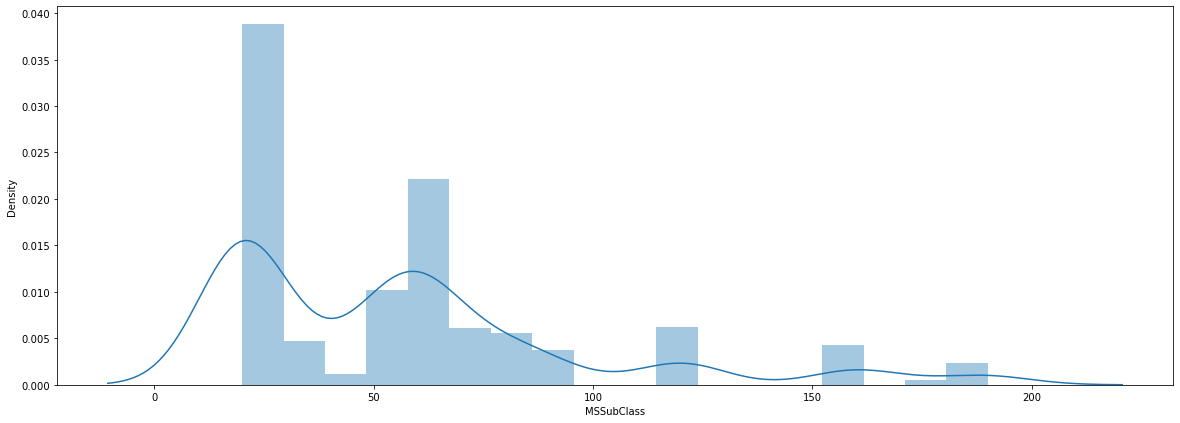

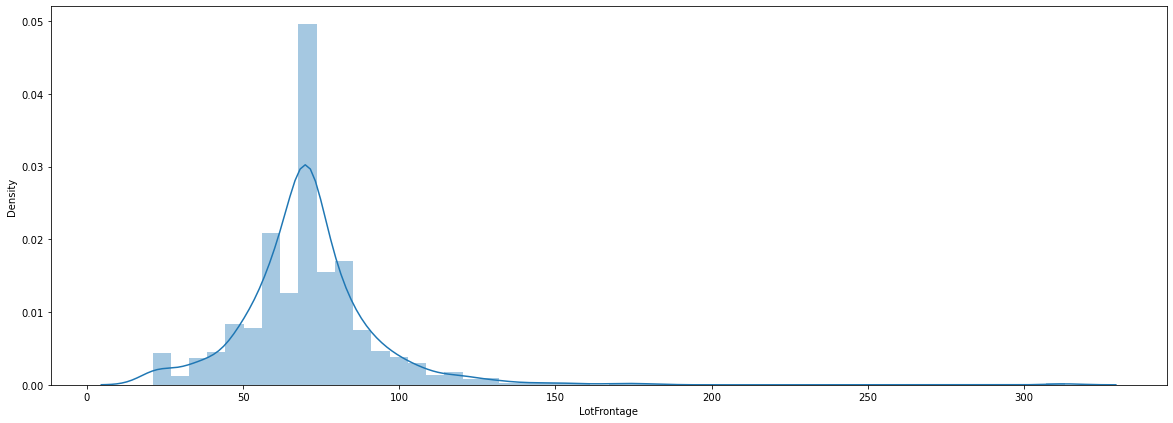

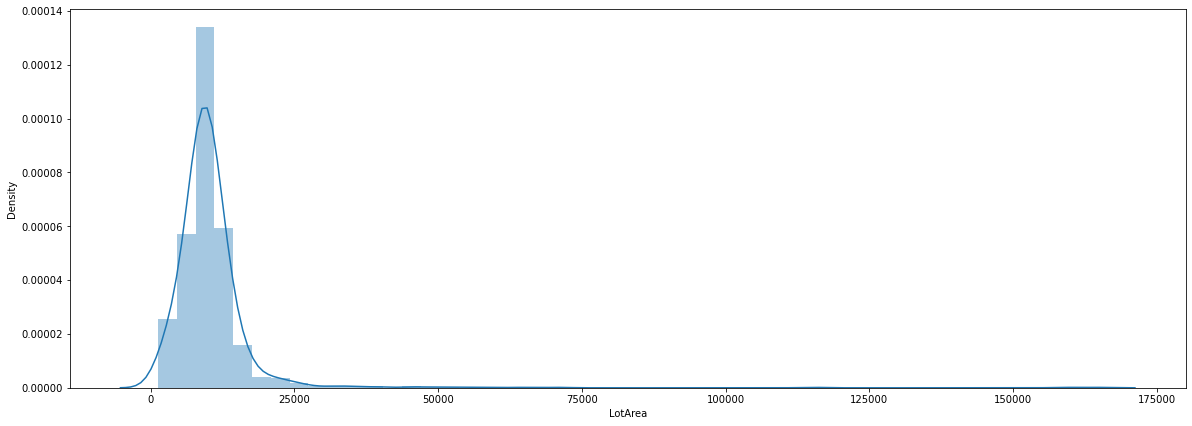

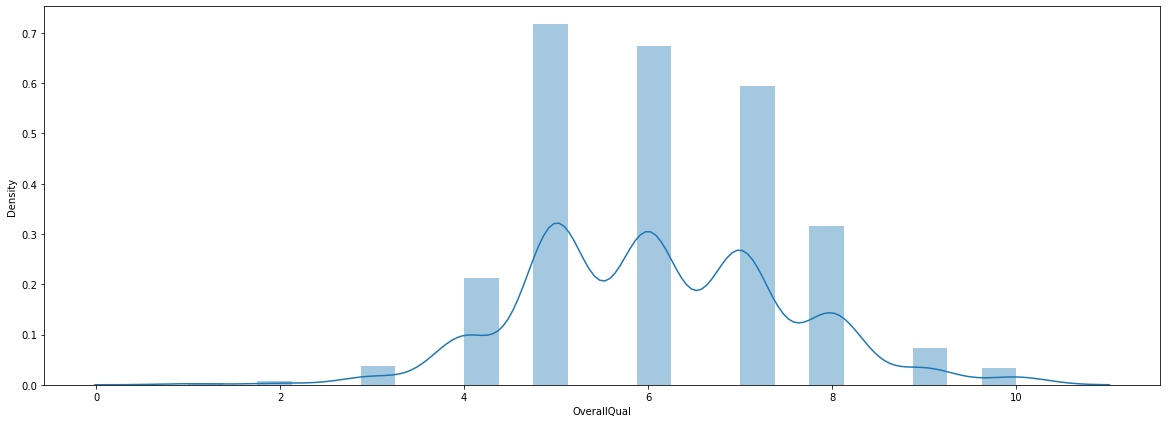

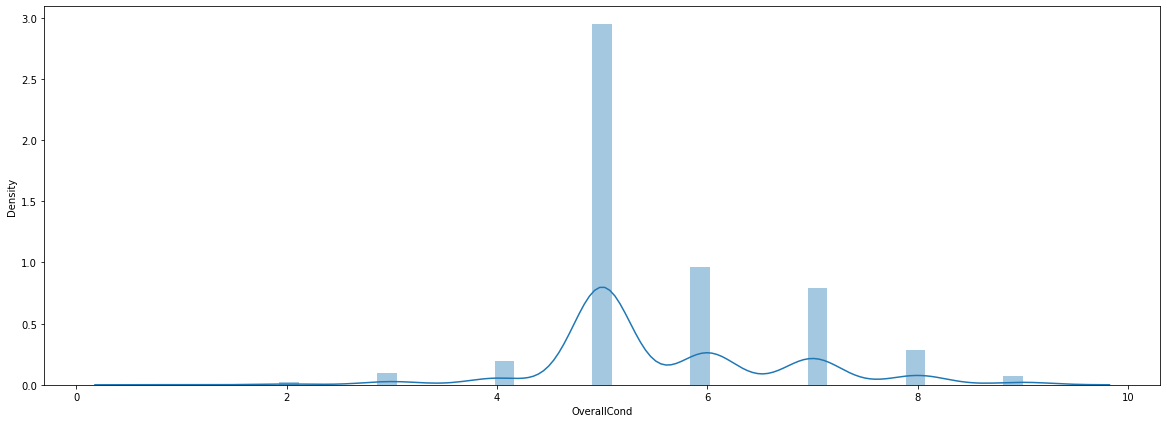

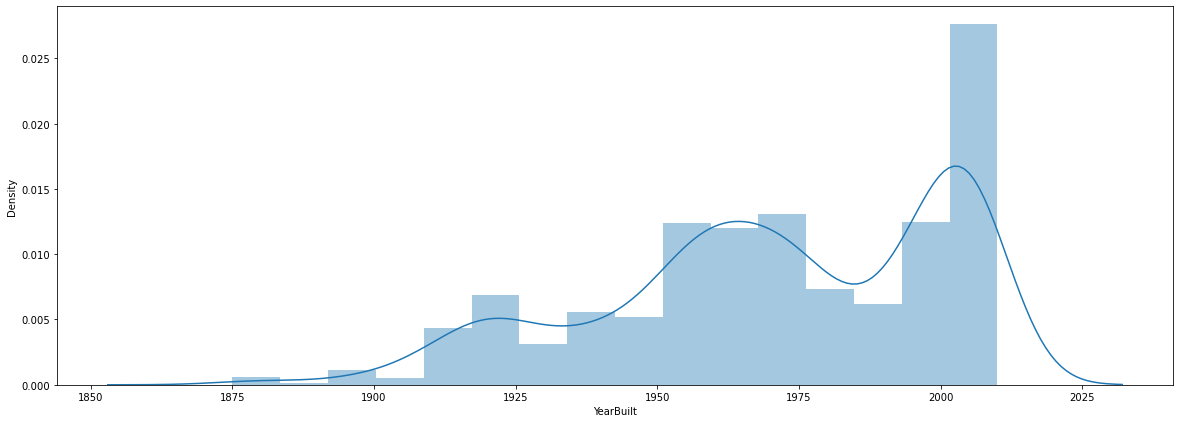

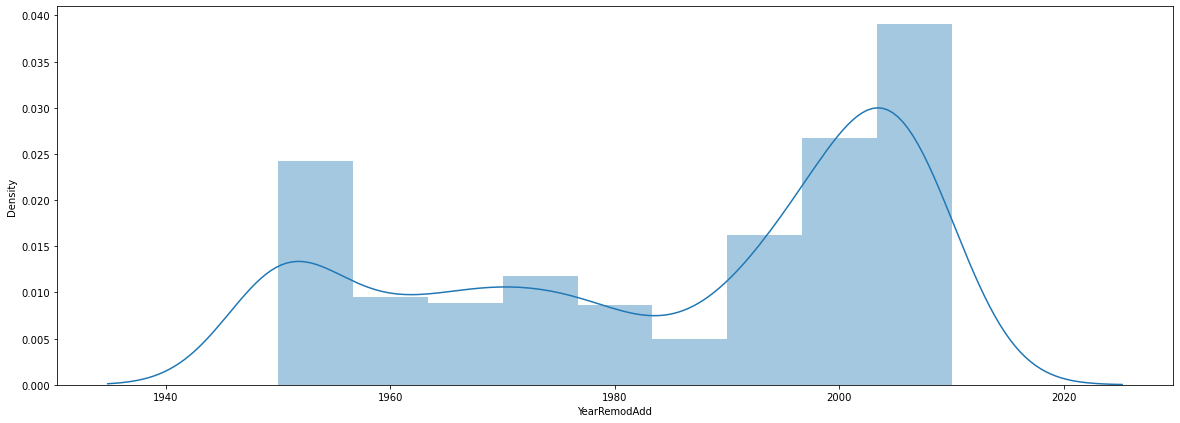

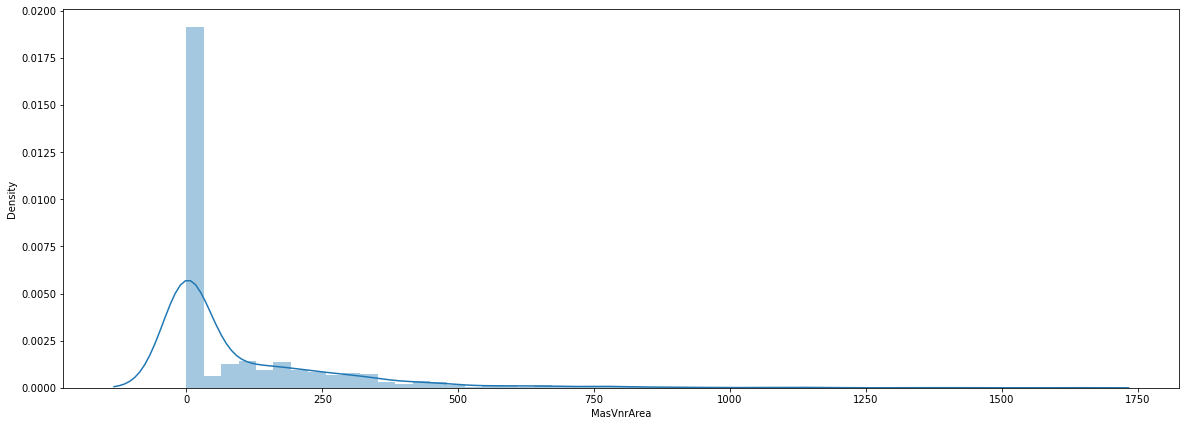

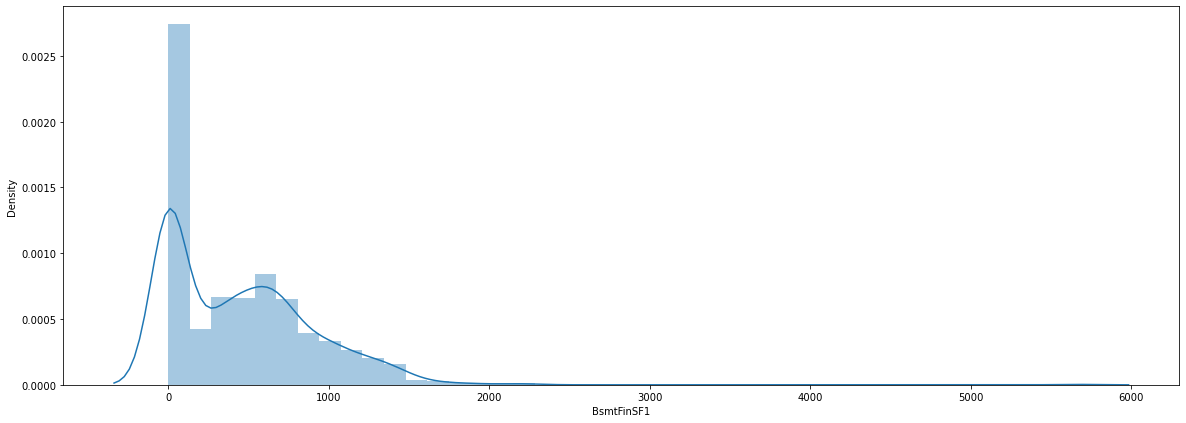

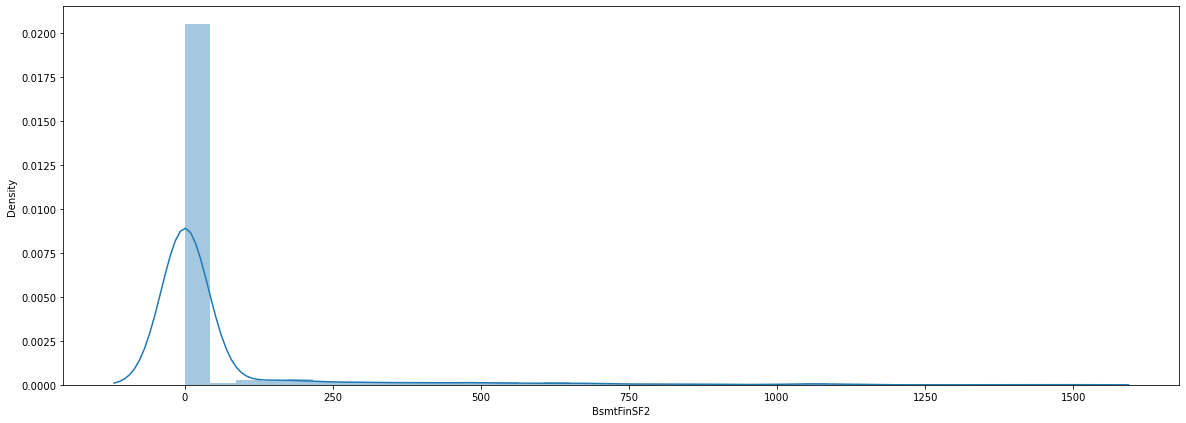

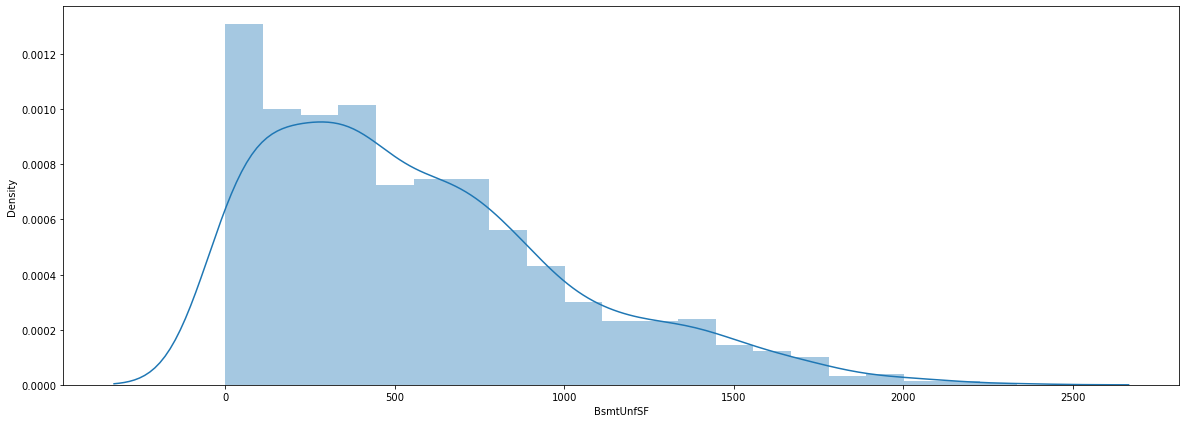

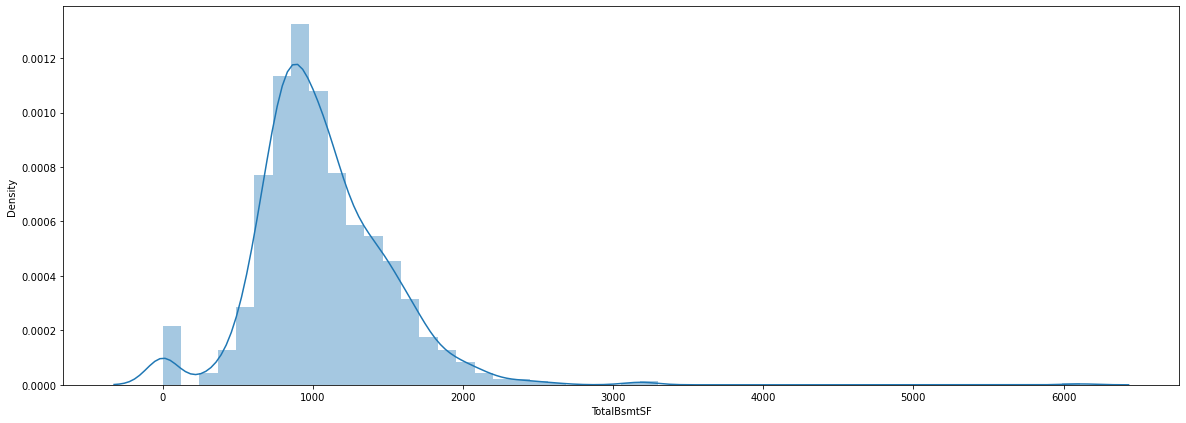

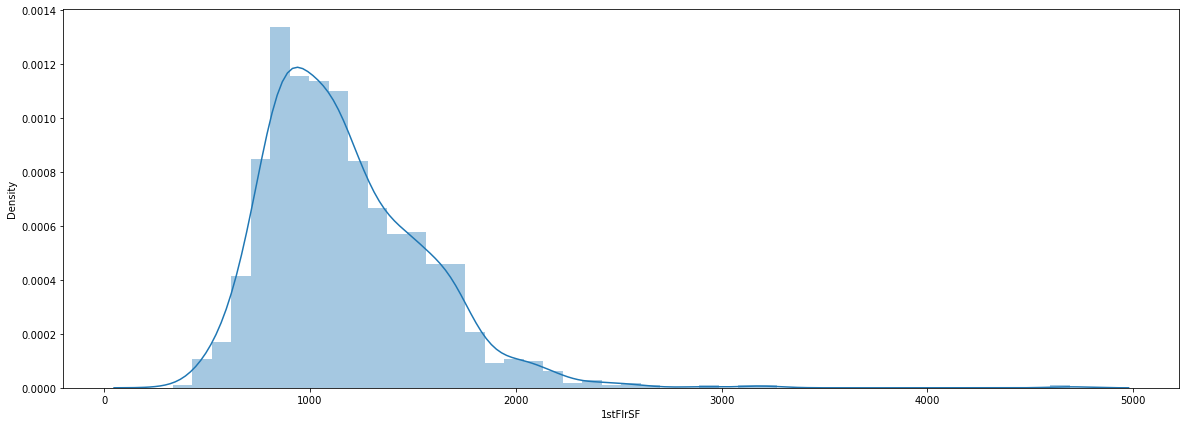

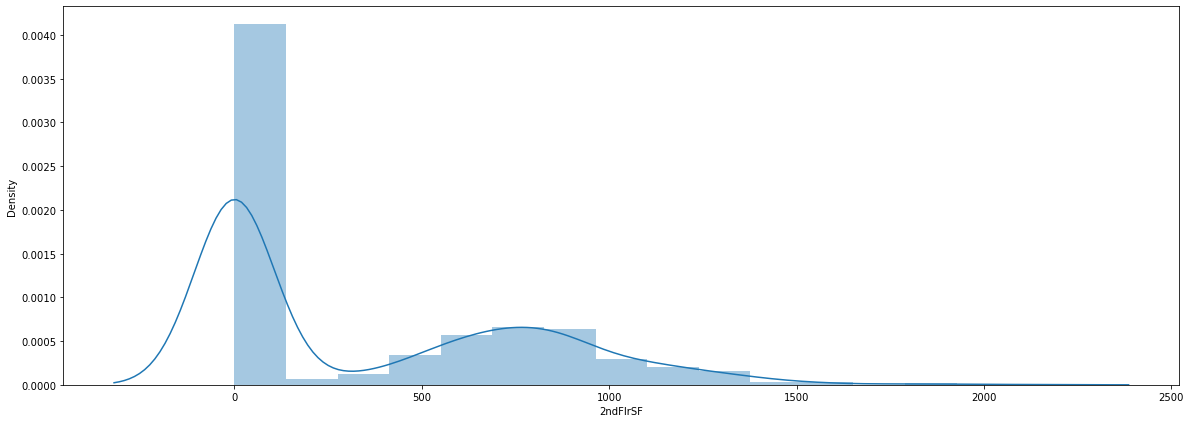

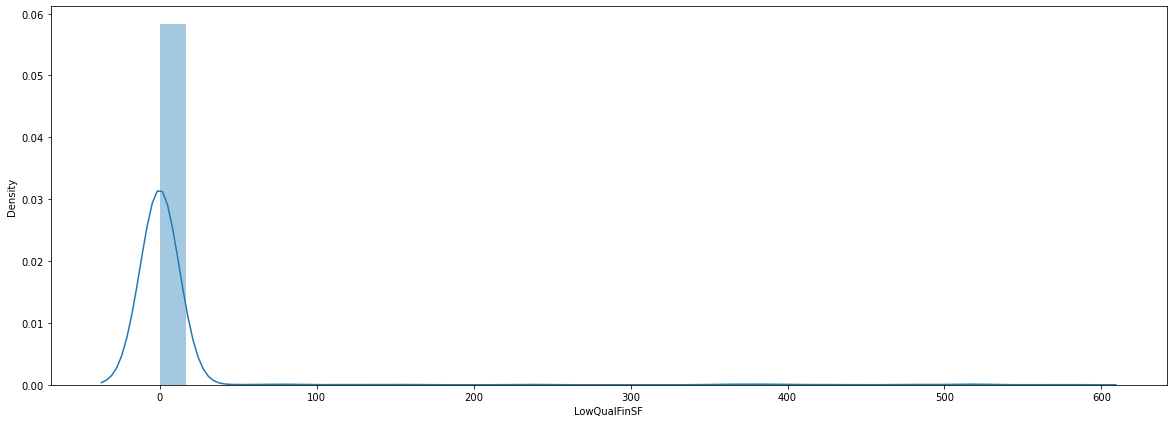

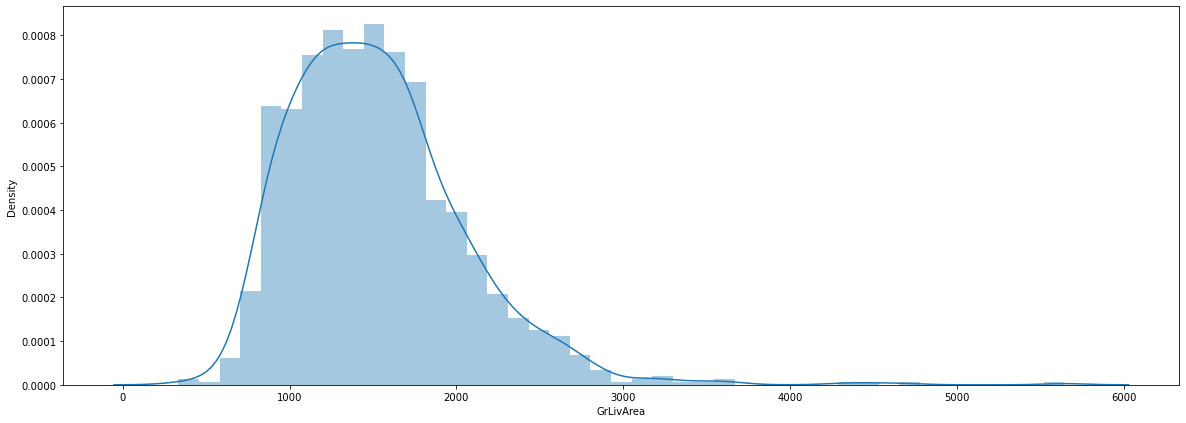

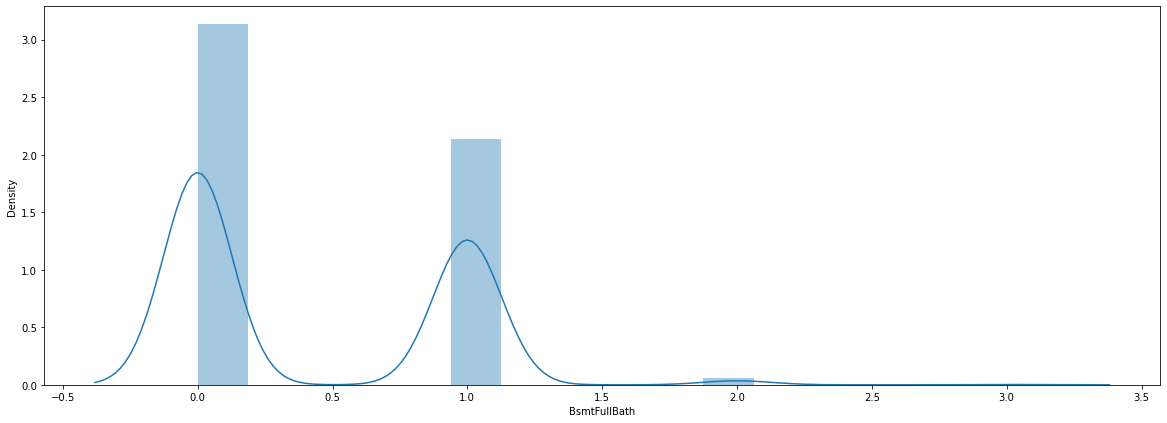

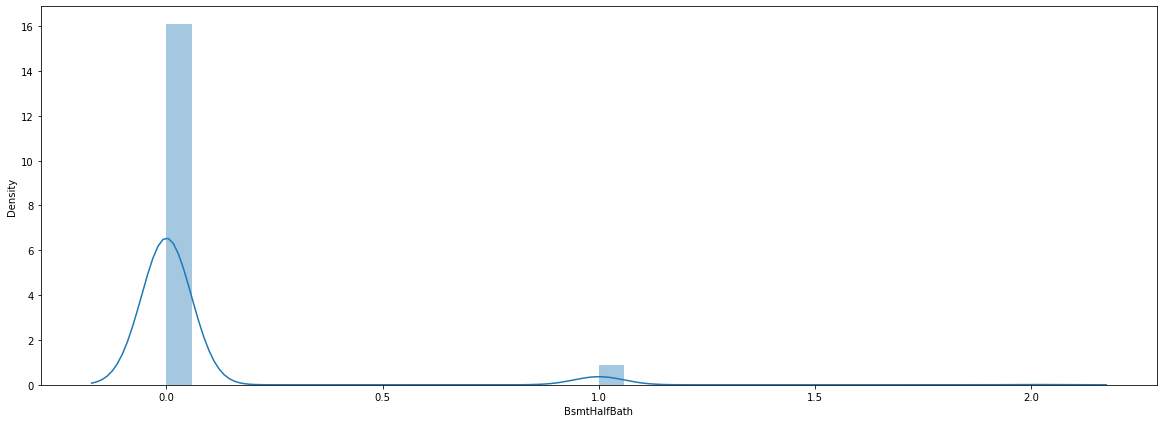

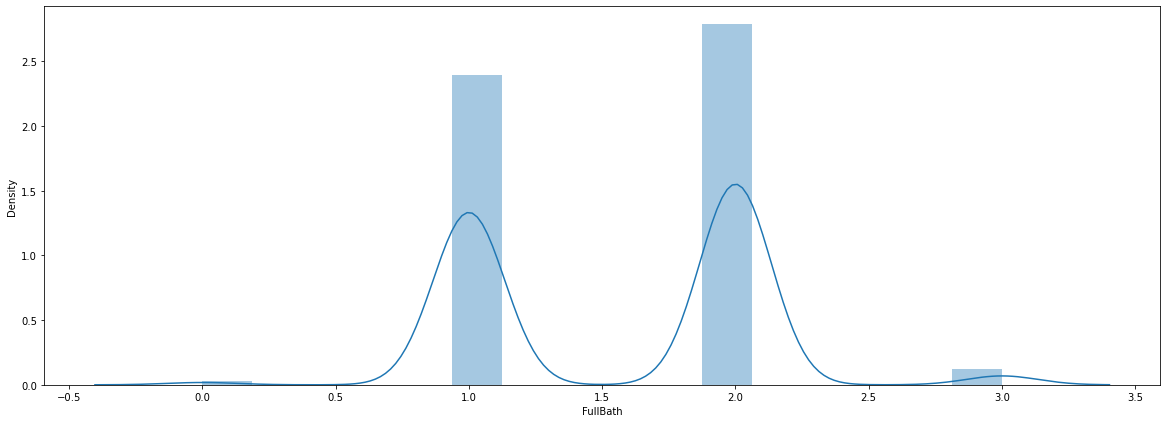

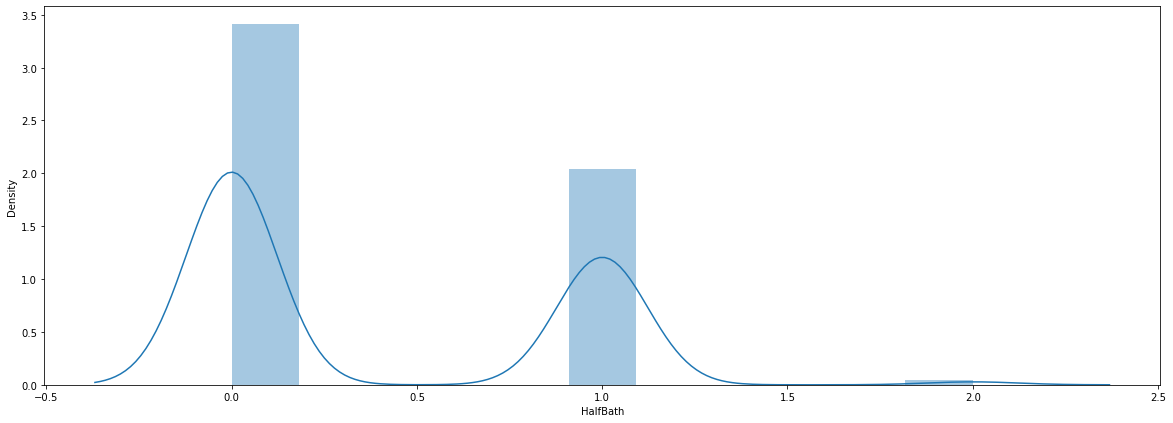

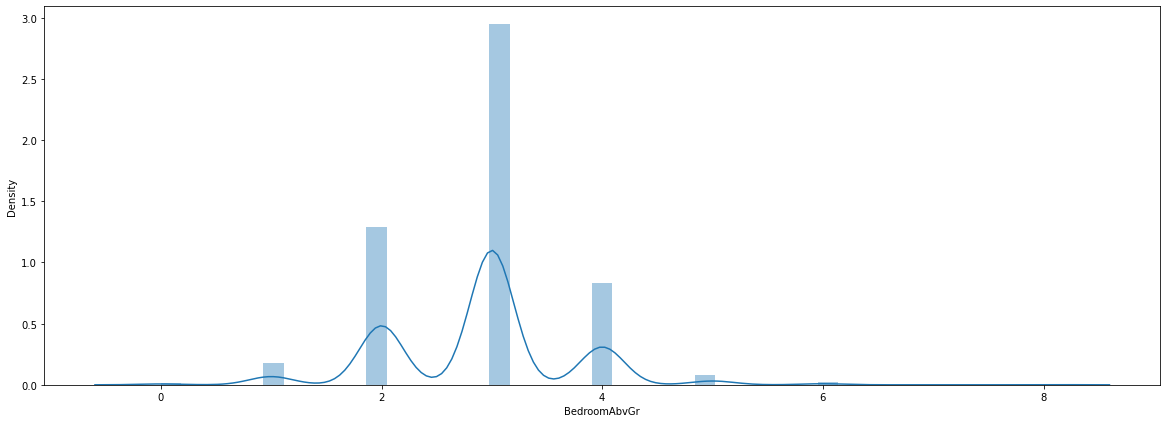

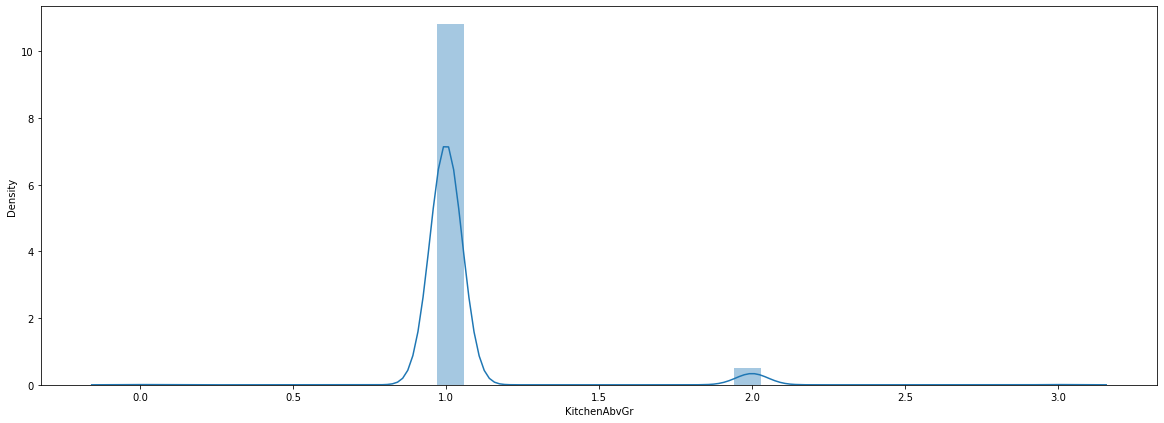

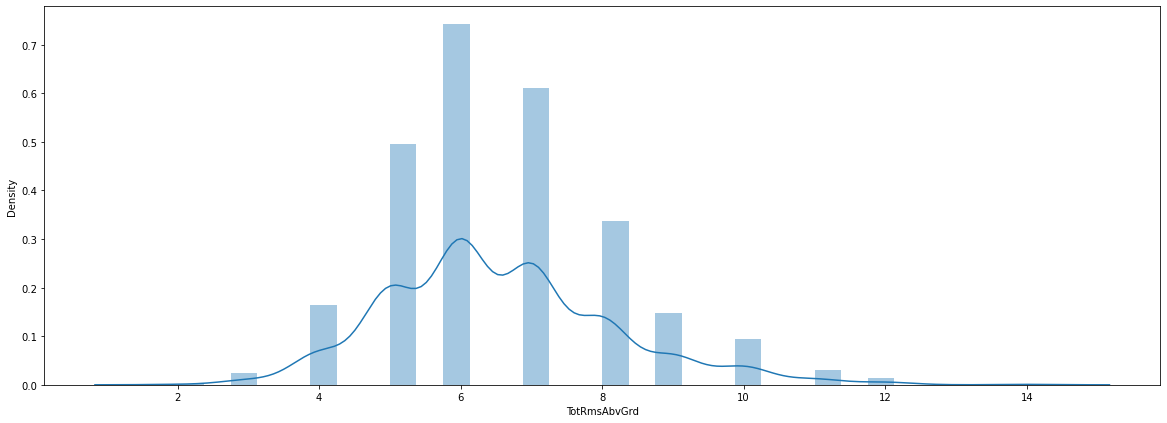

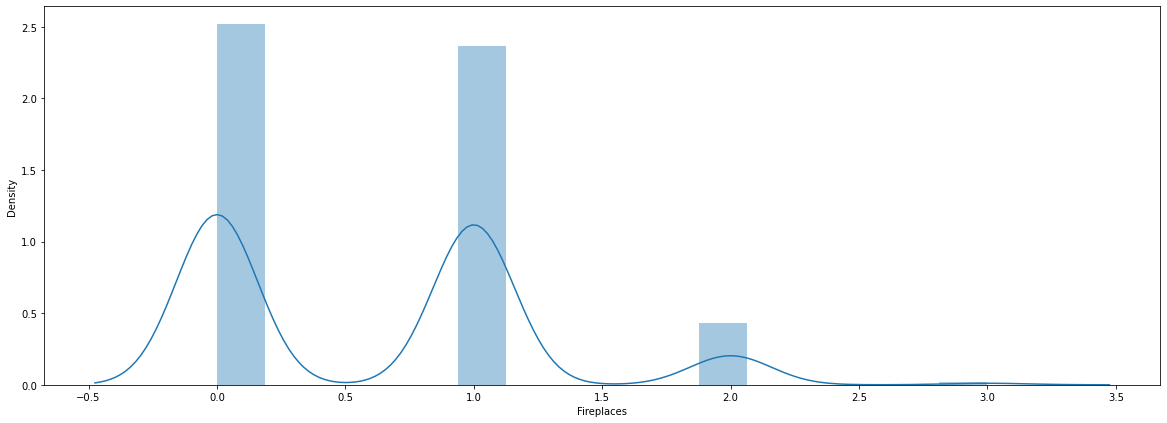

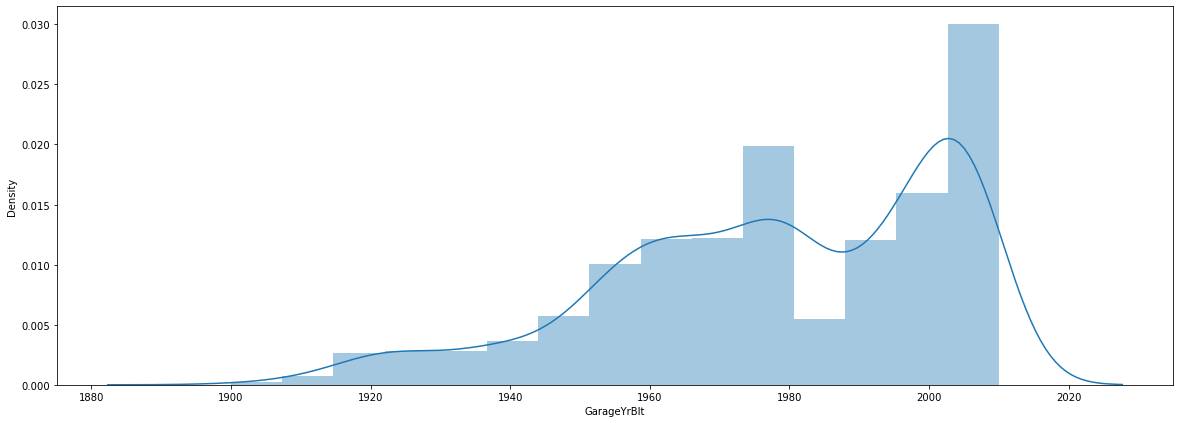

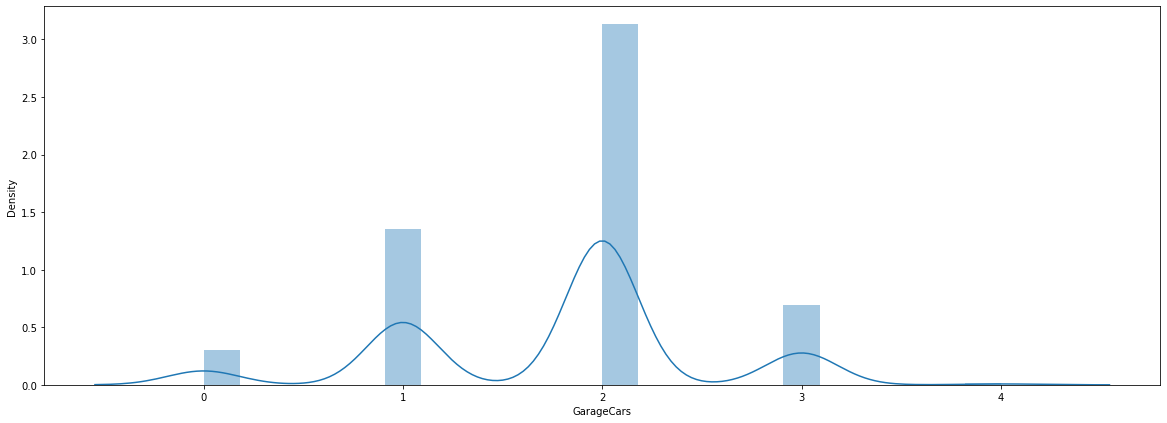

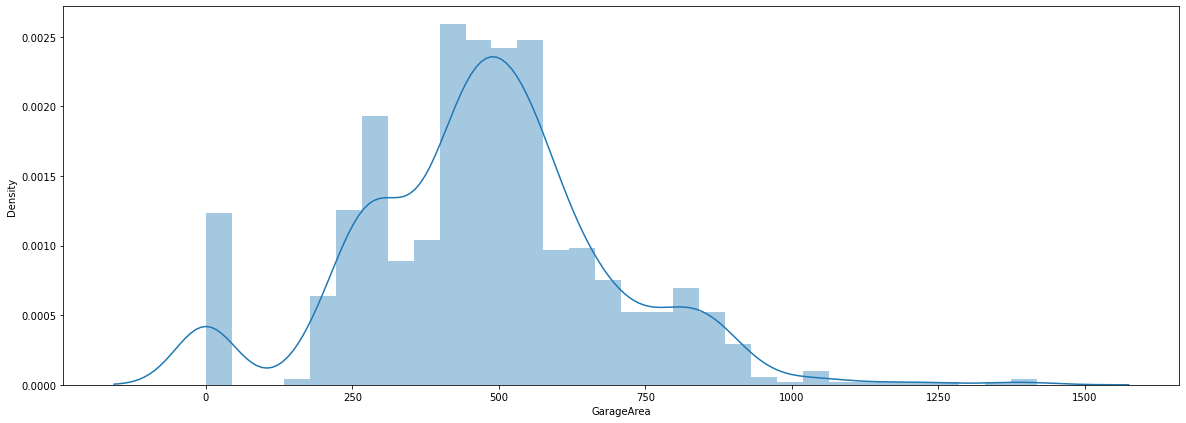

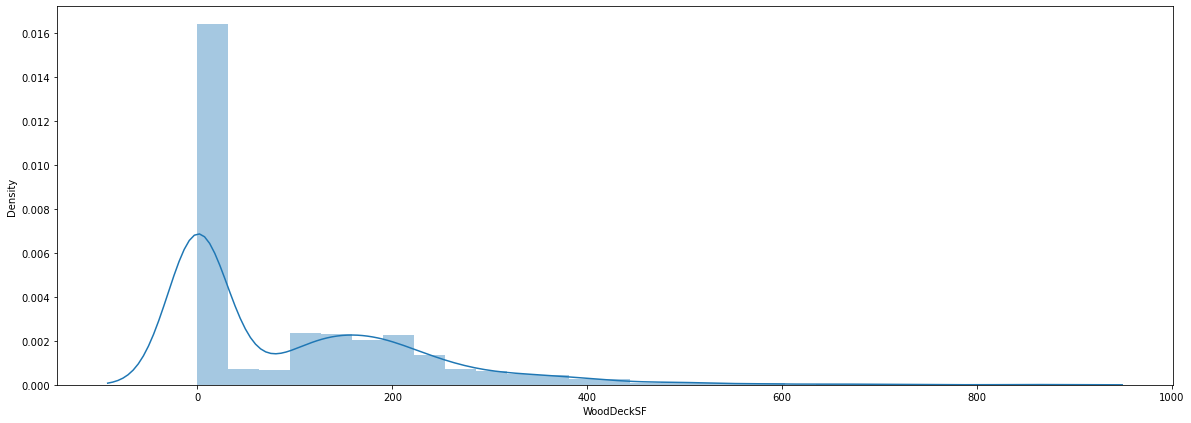

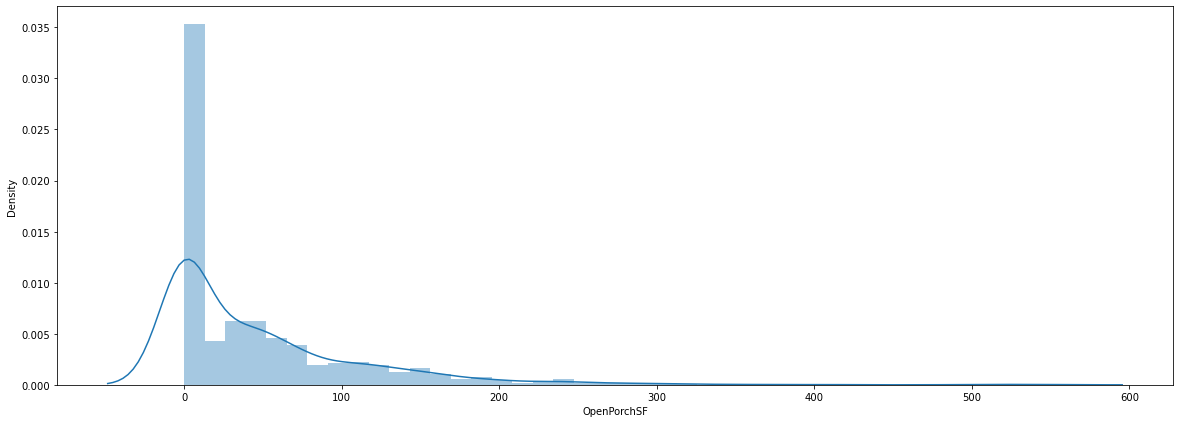

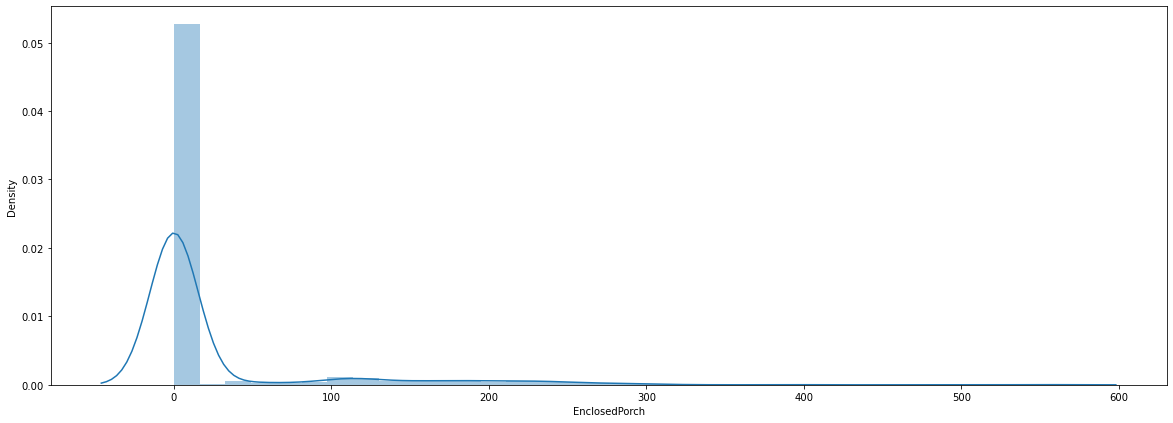

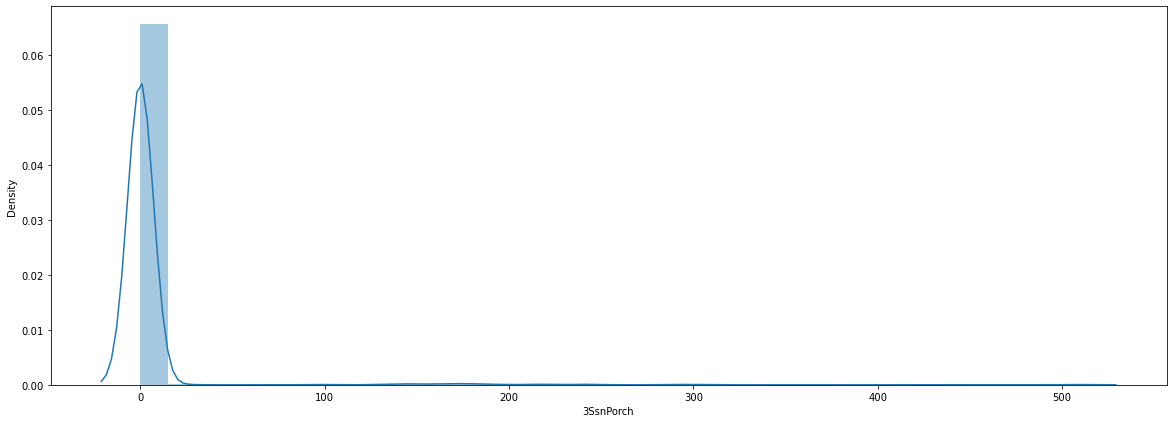

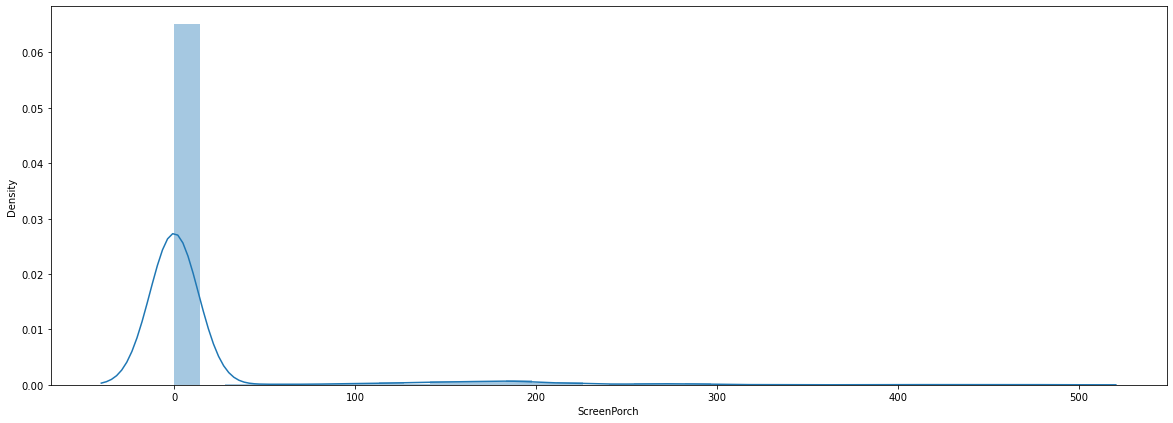

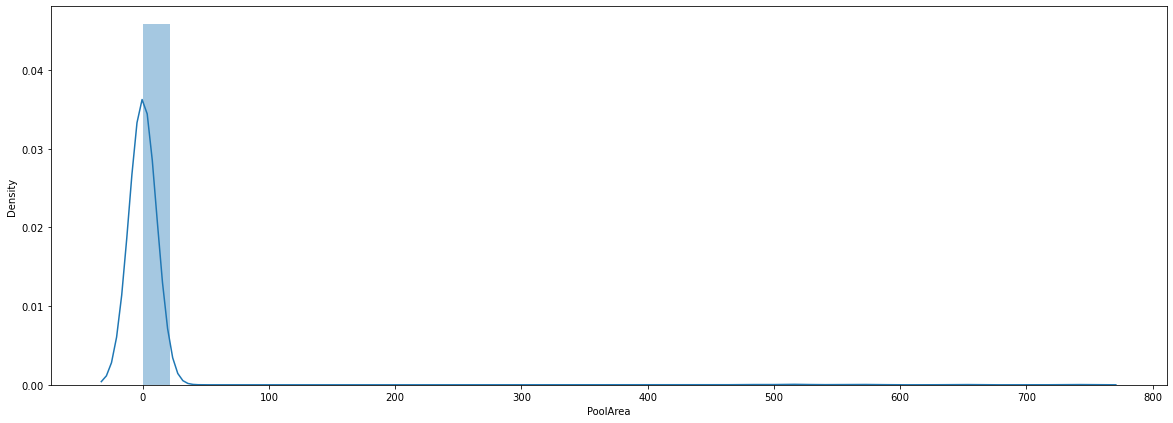

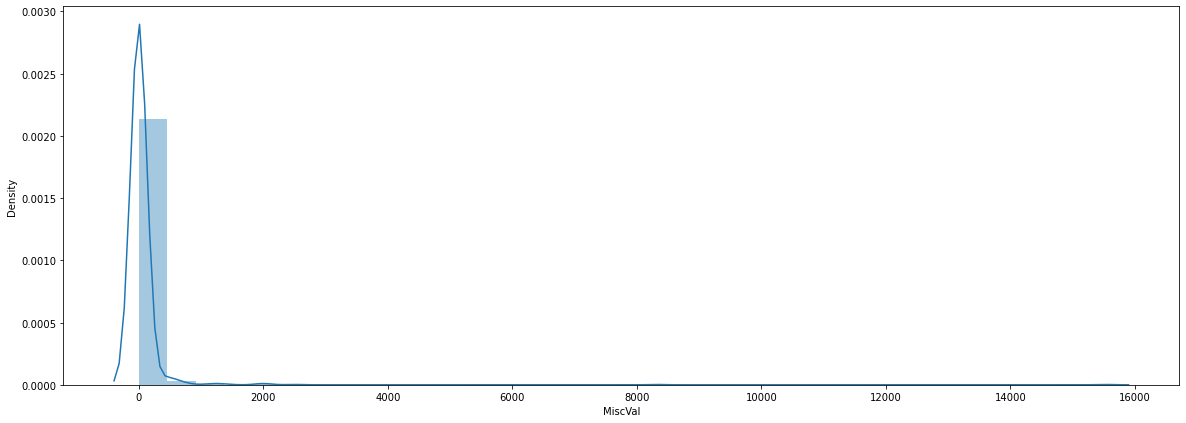

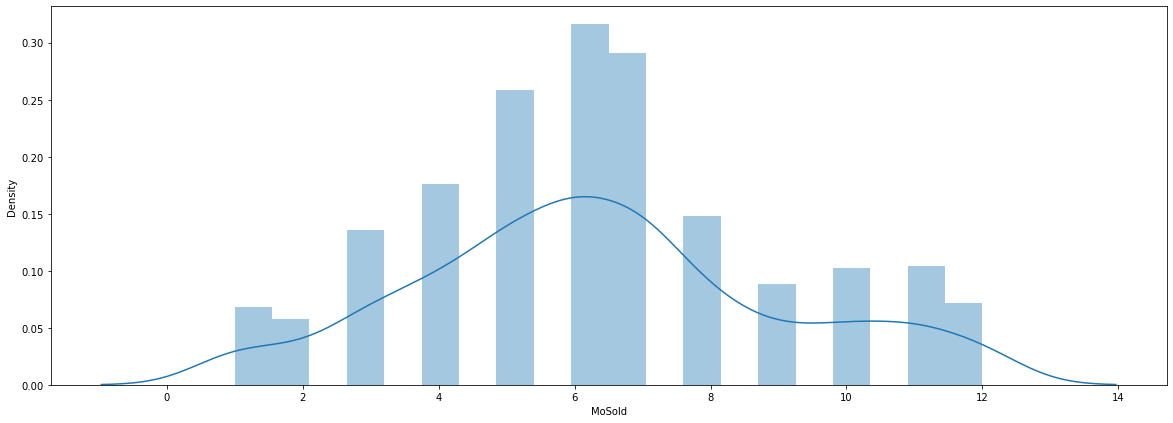

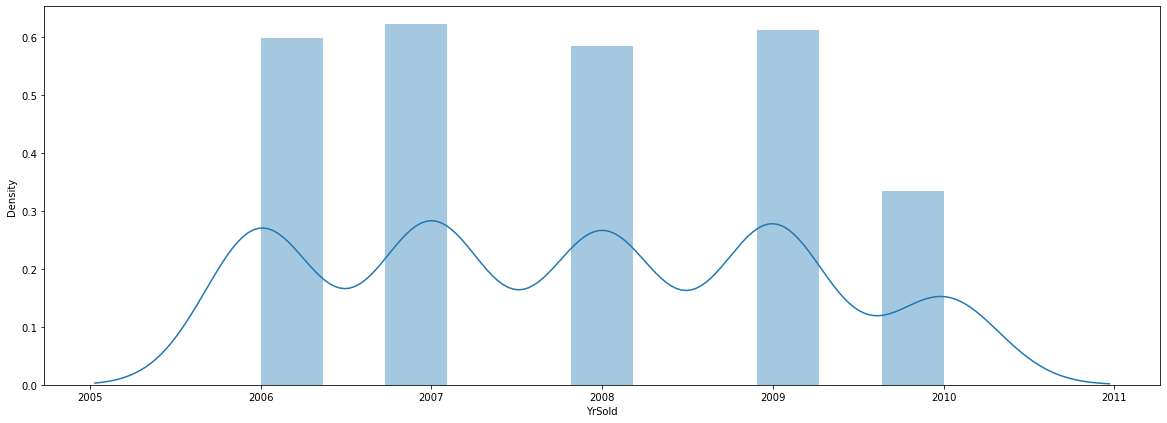

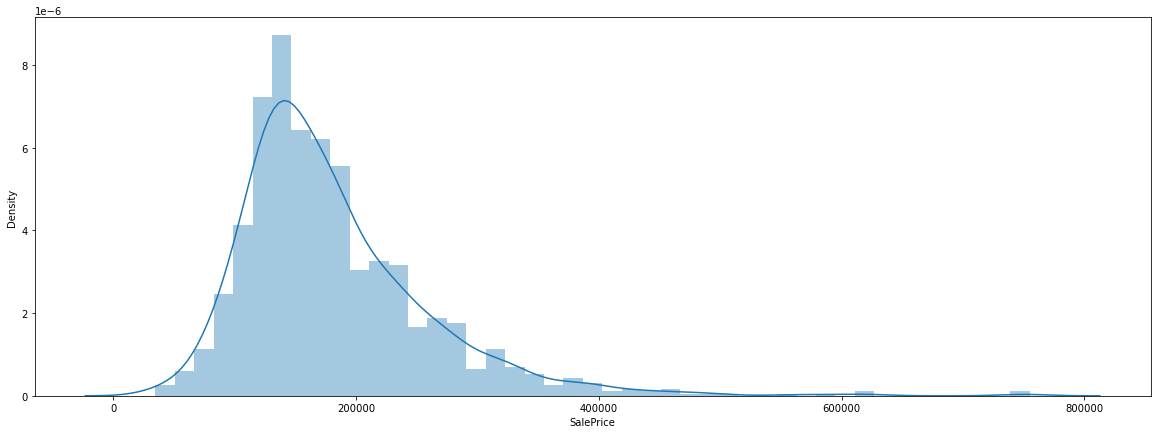

In [20]:
counter=1;
for i in range(0,len(continous_columns)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.distplot(df[continous_columns[i]])
        plt.show()

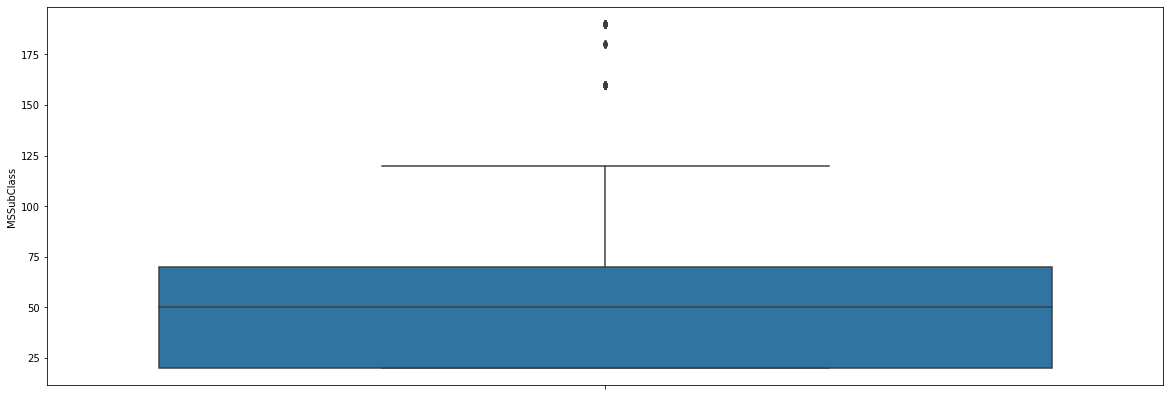

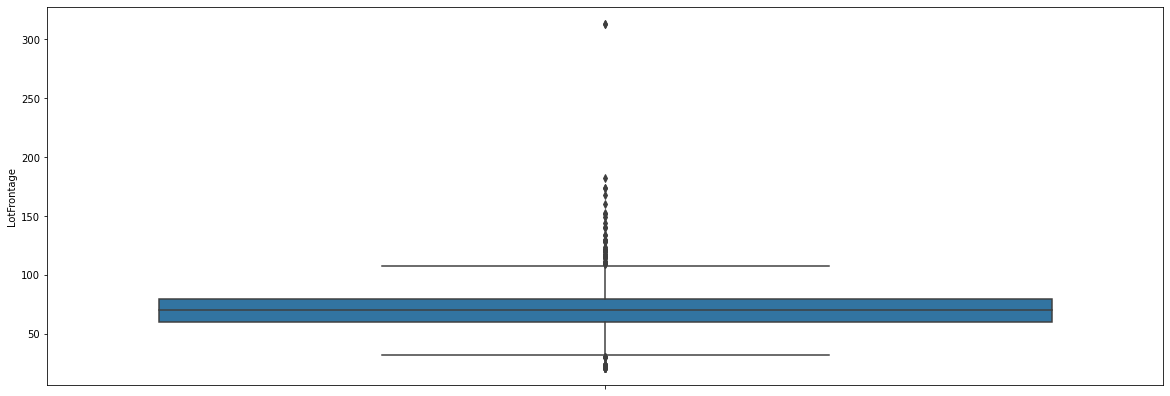

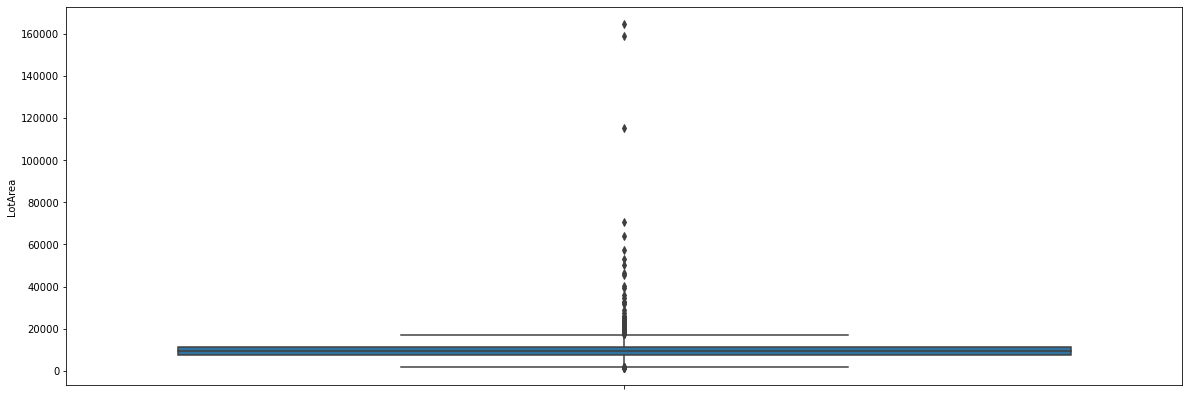

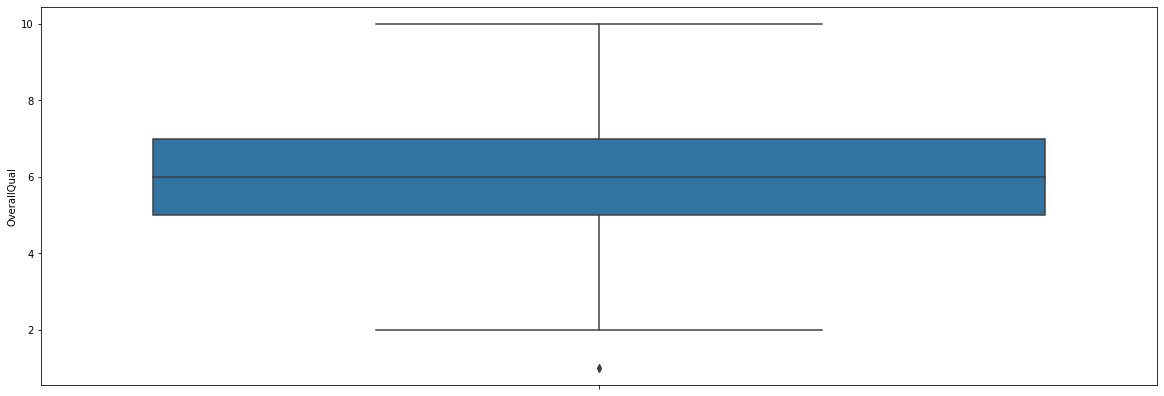

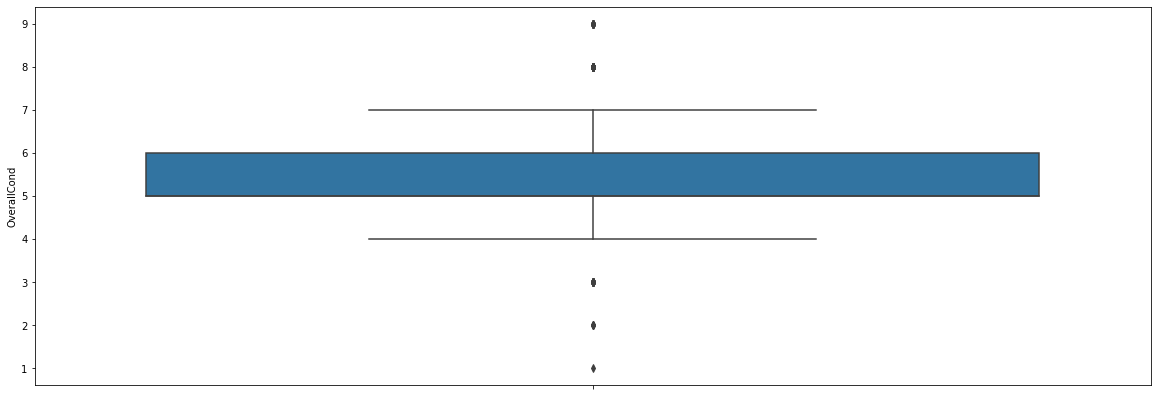

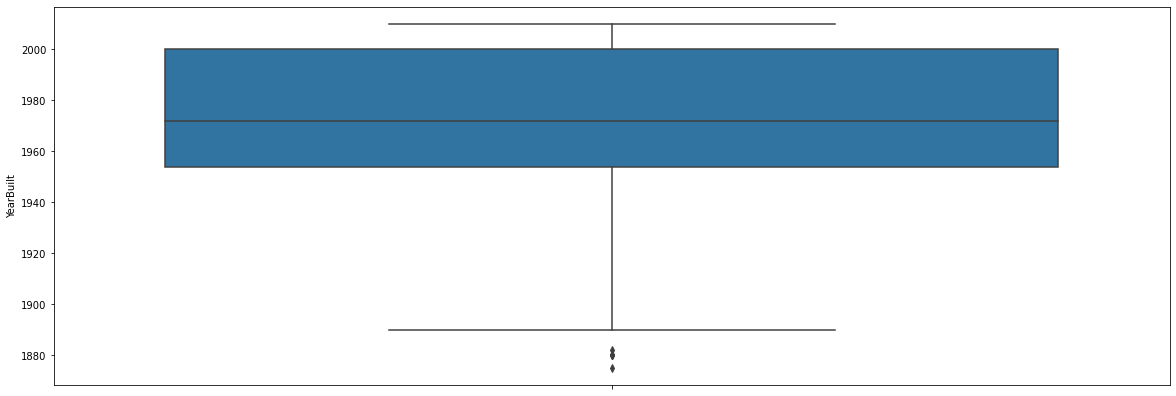

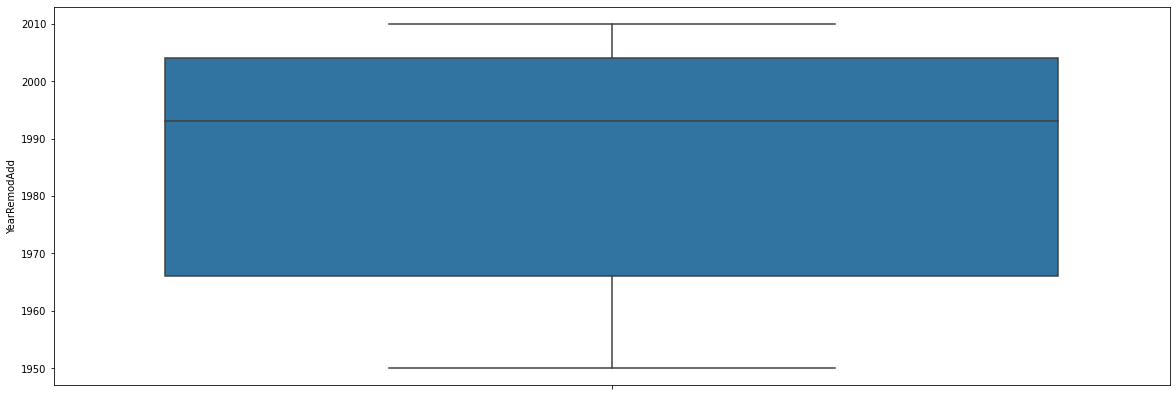

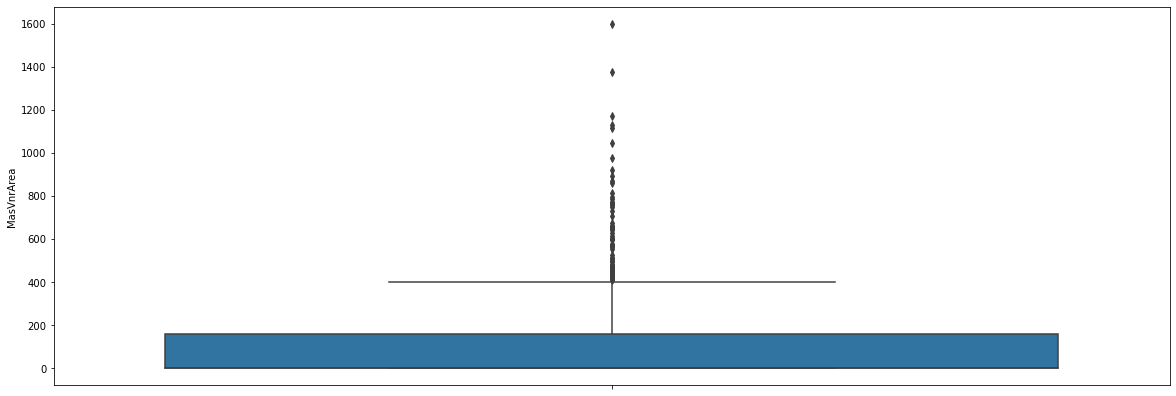

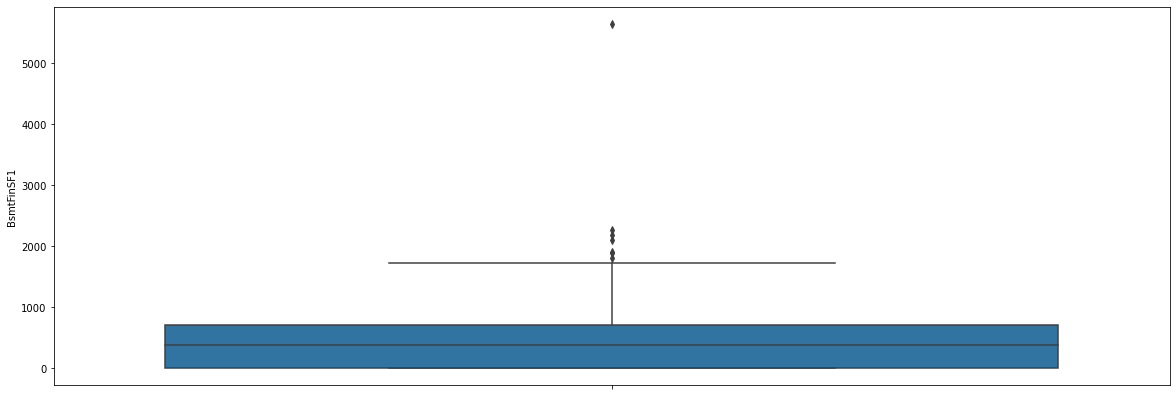

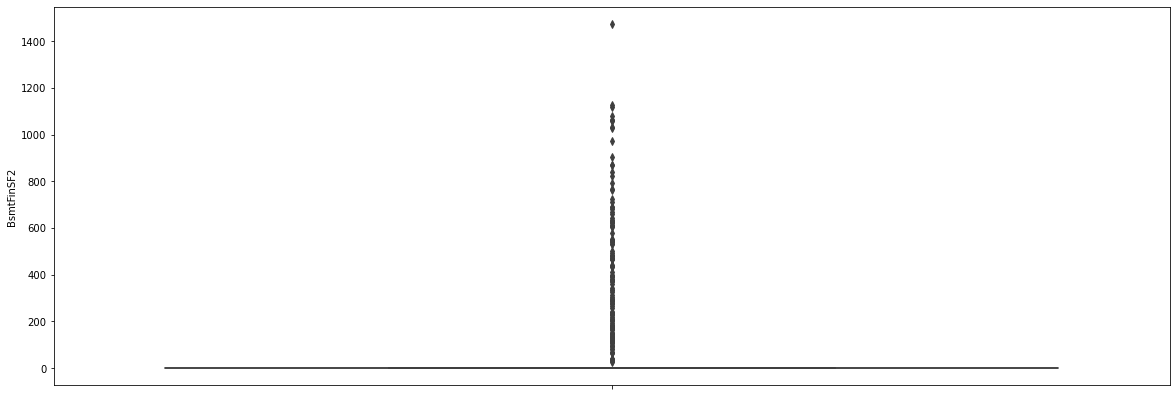

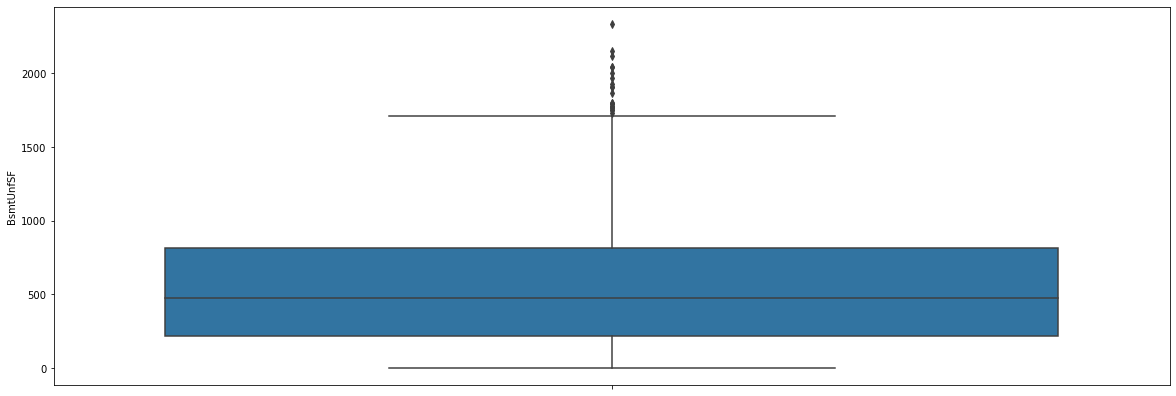

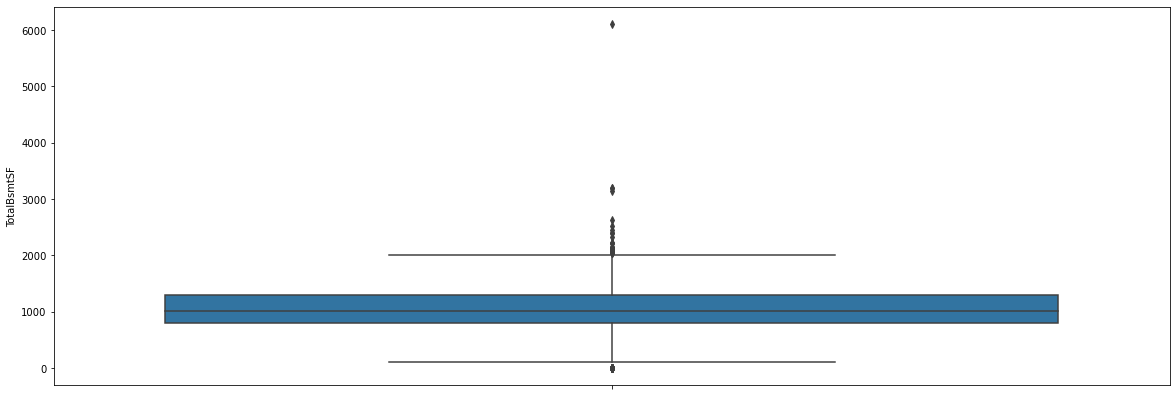

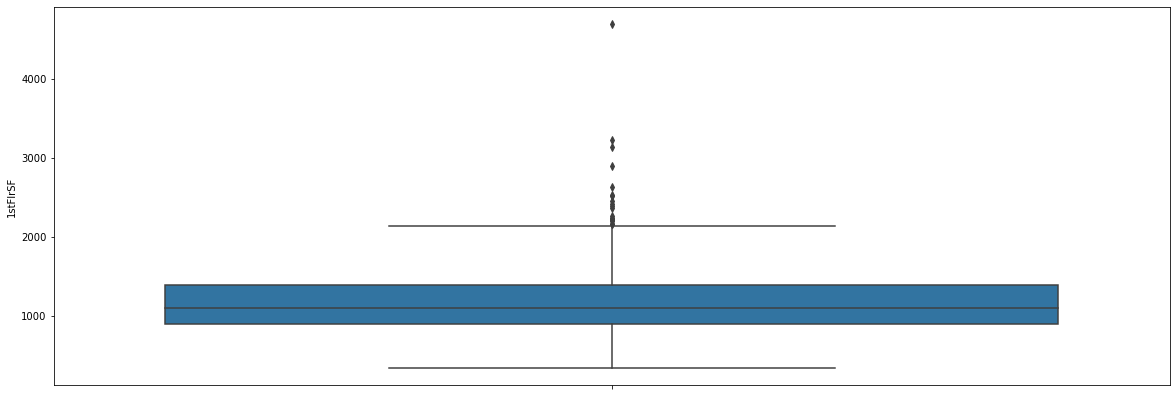

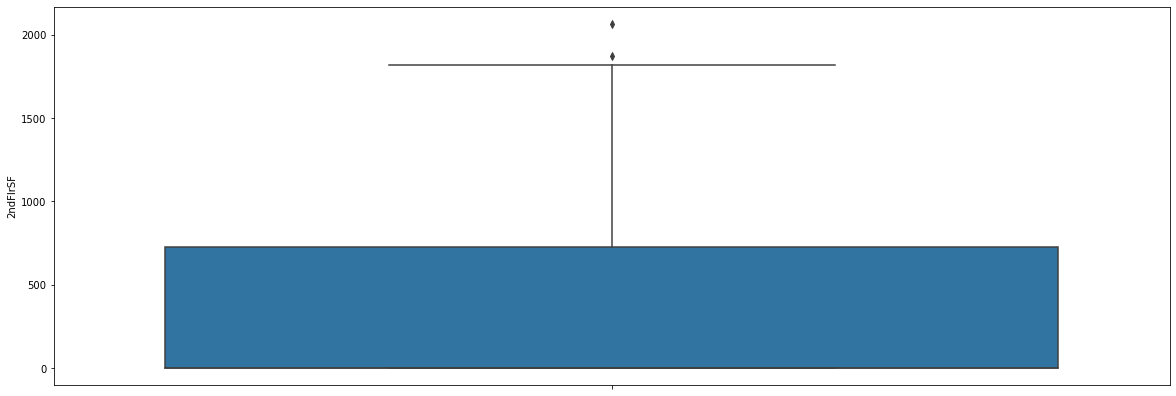

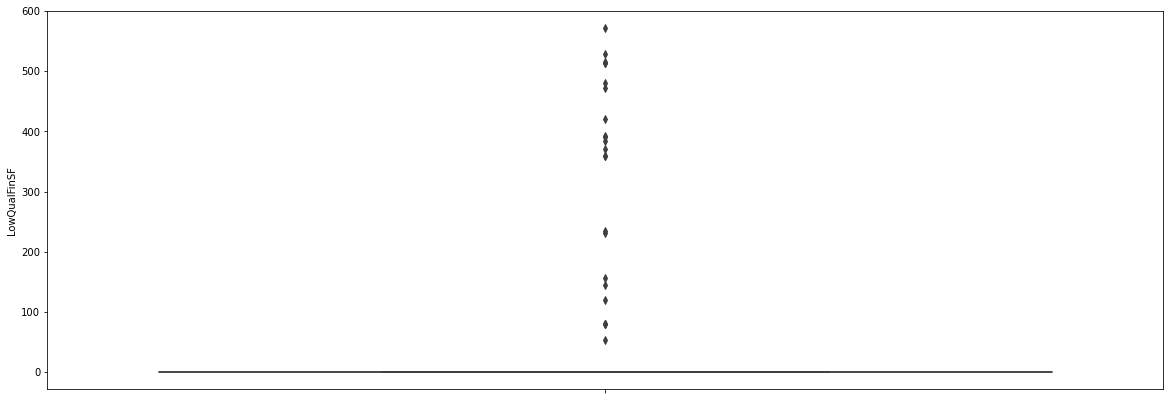

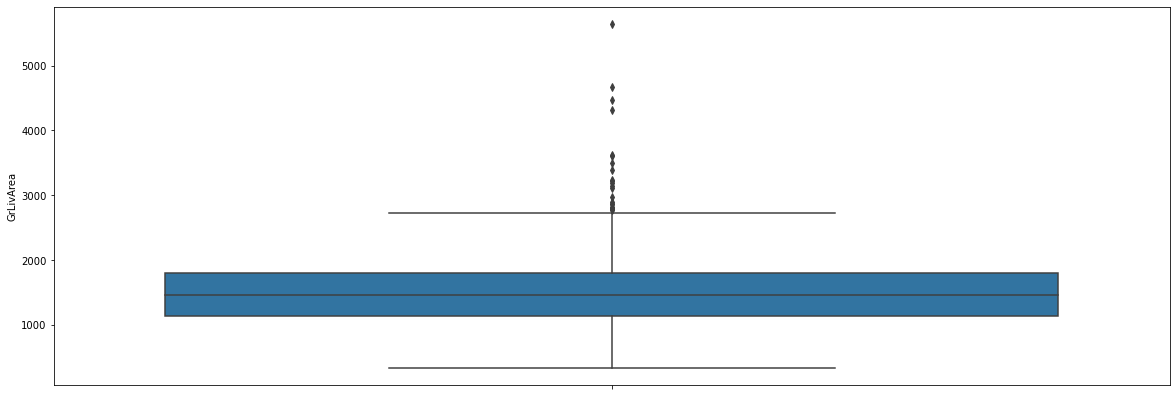

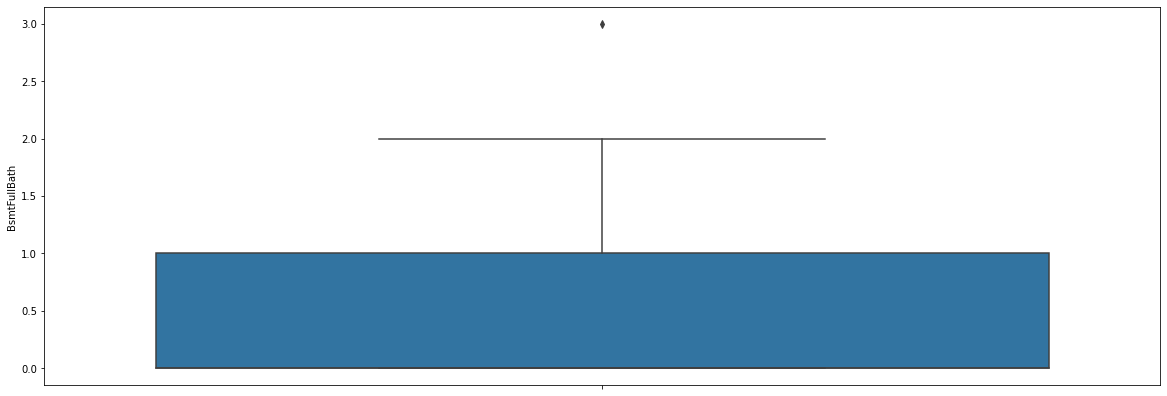

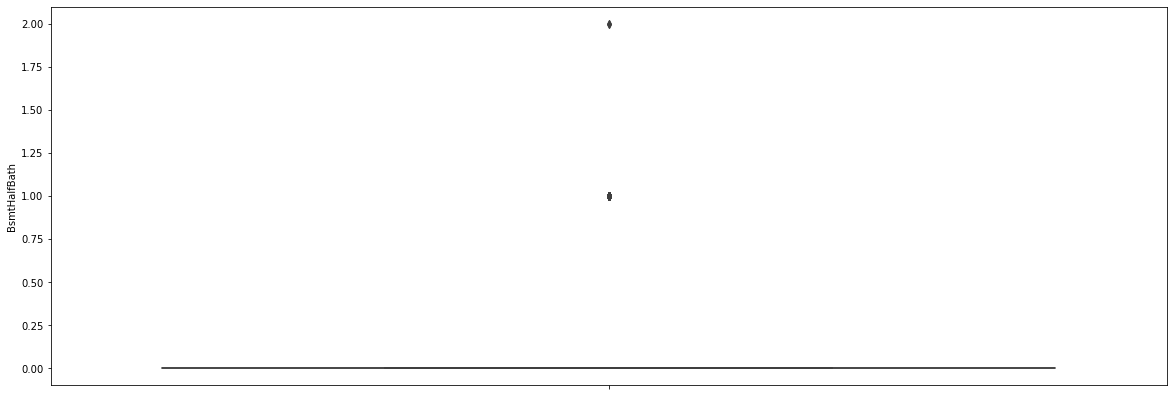

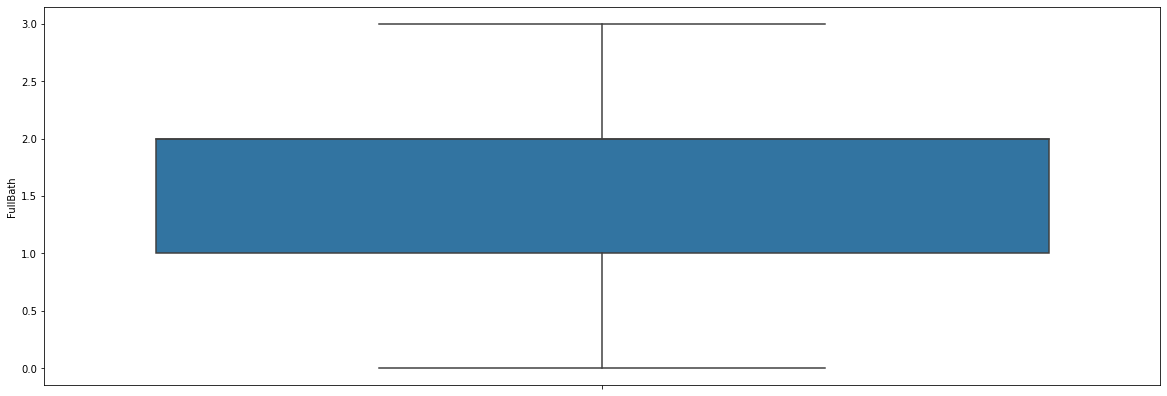

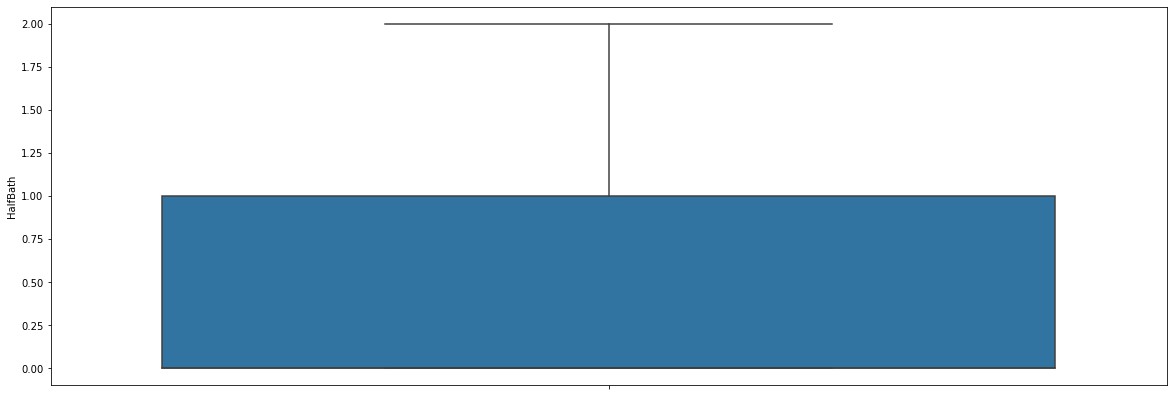

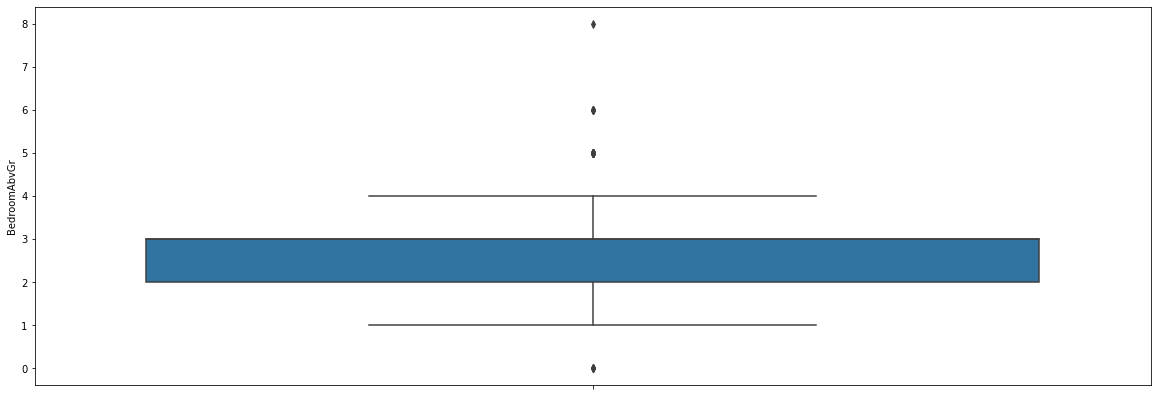

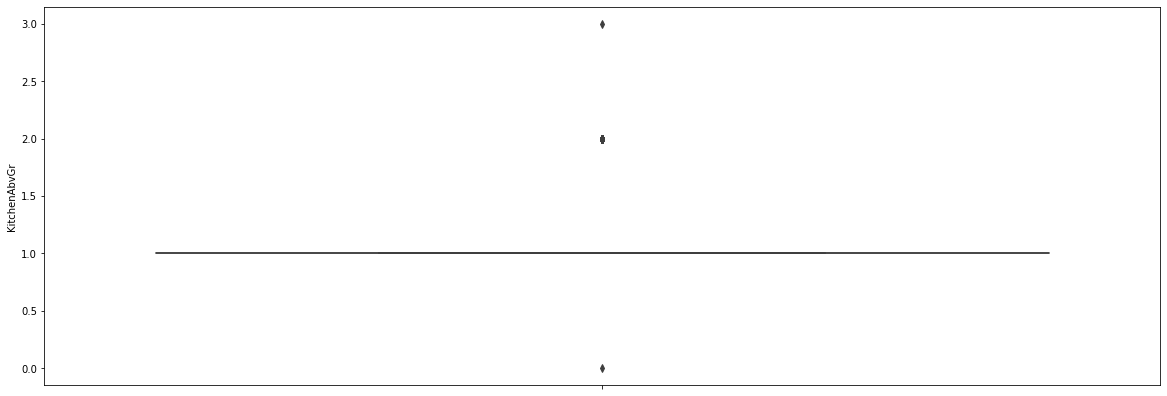

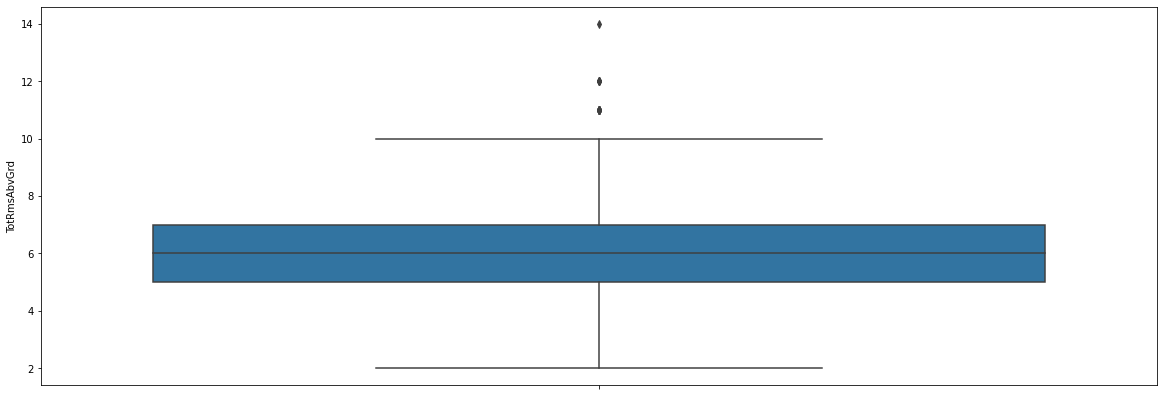

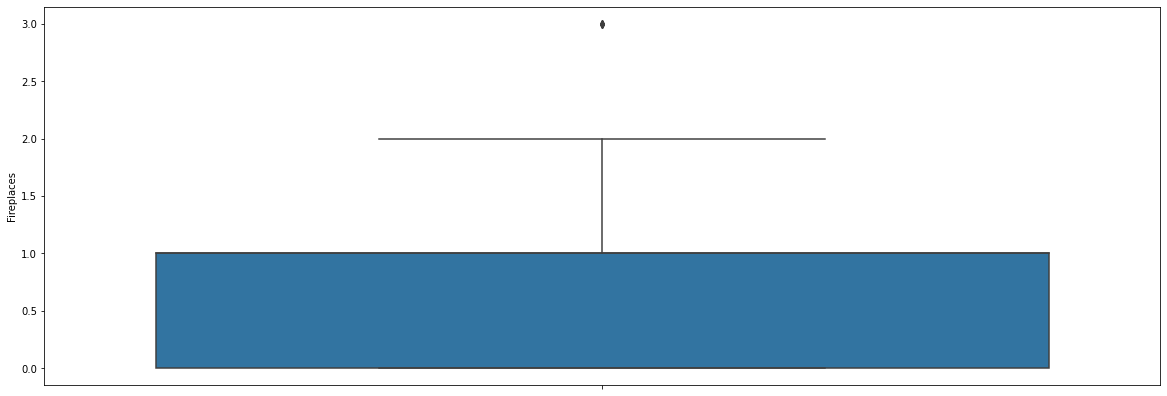

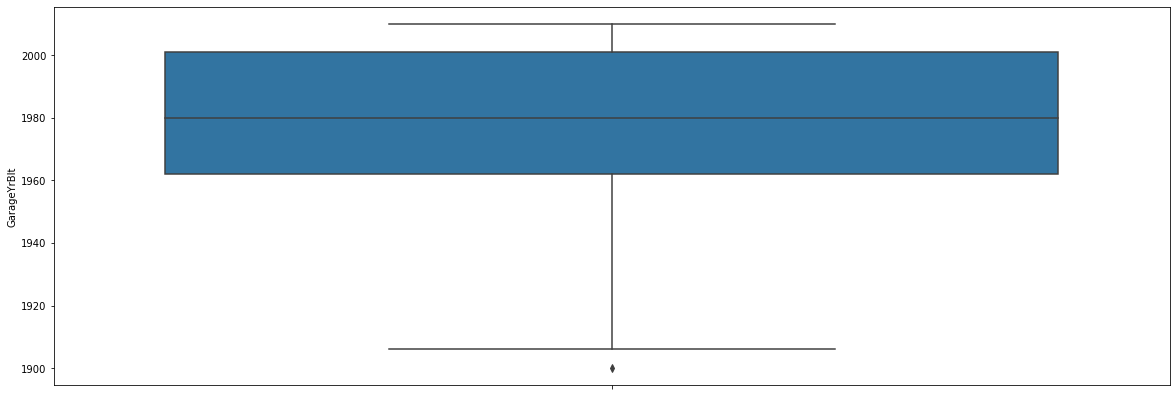

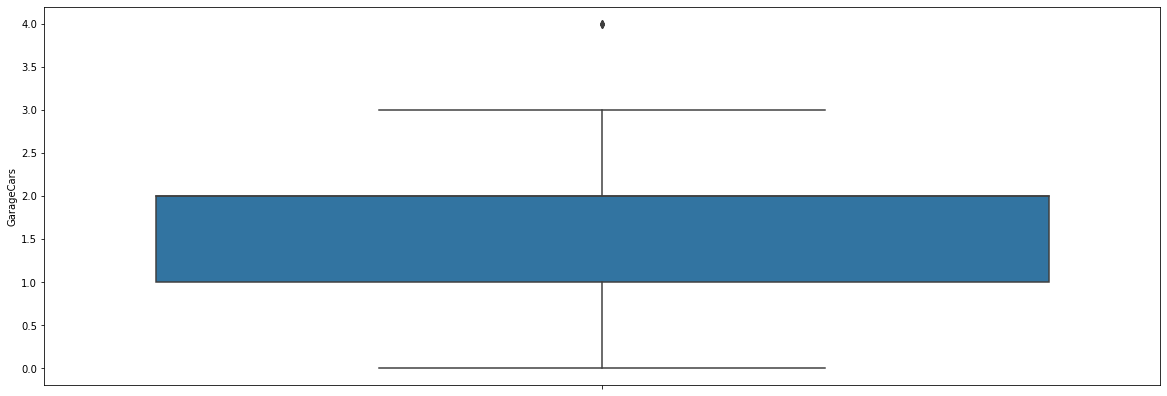

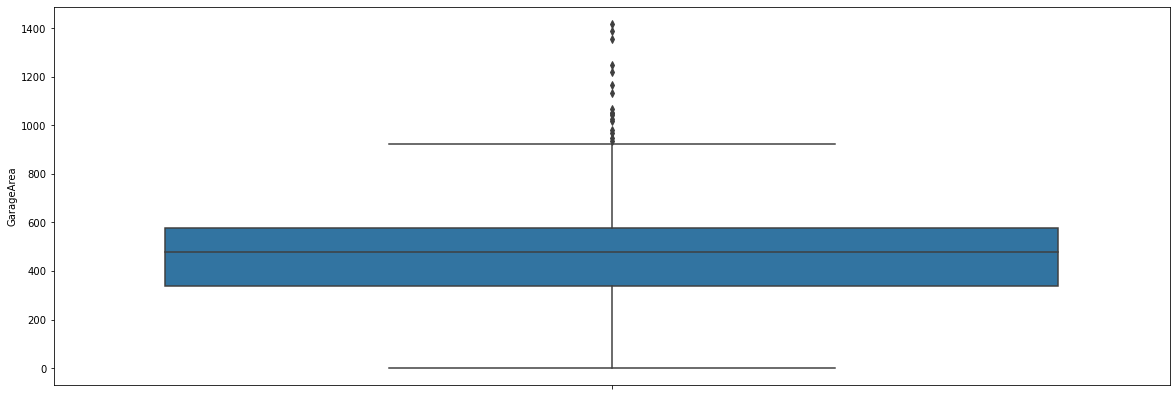

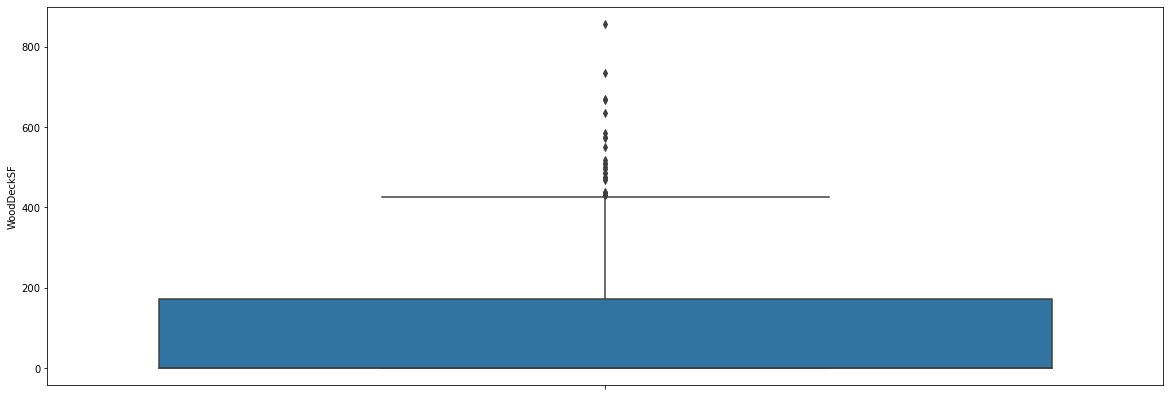

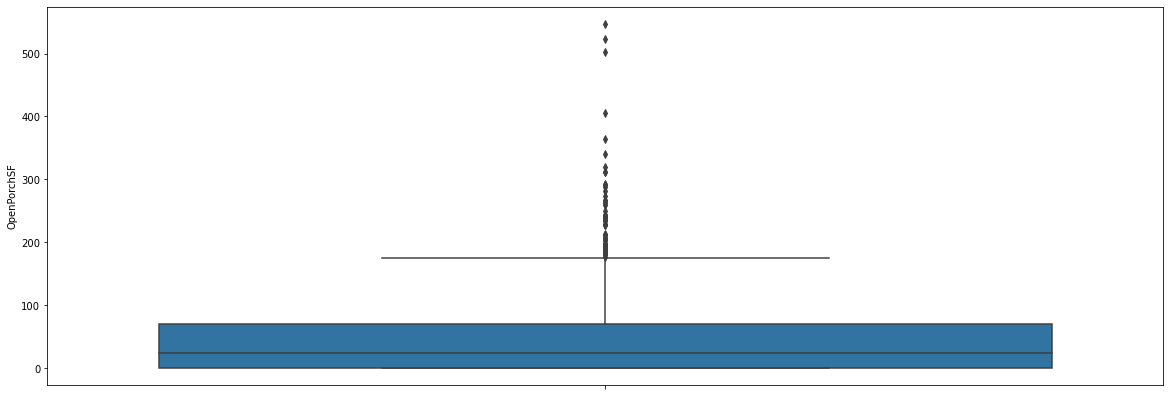

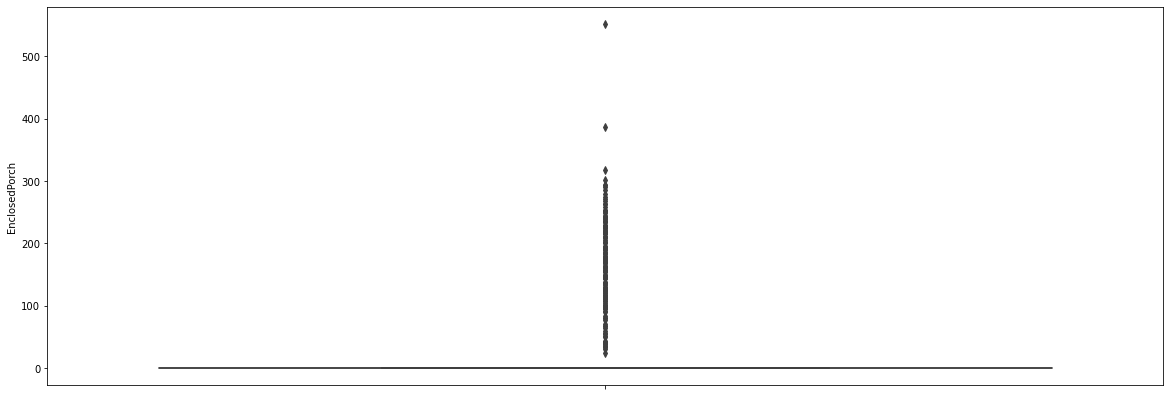

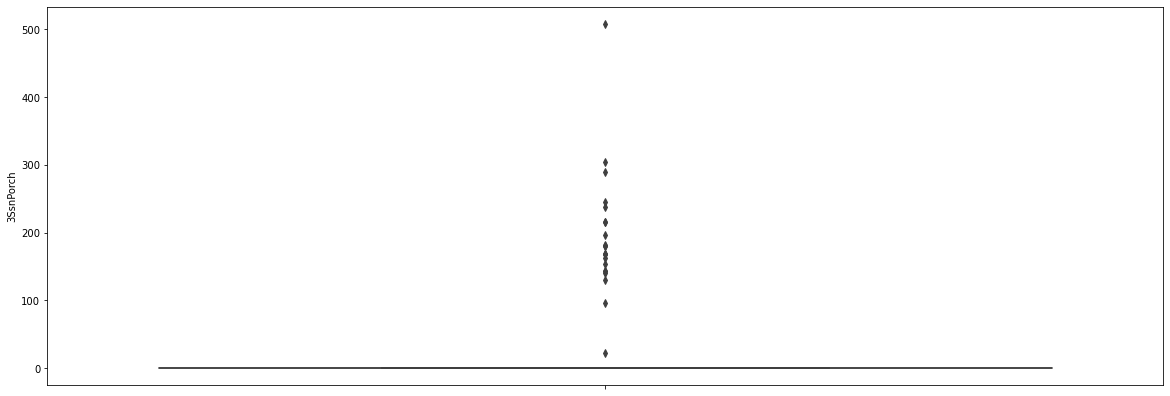

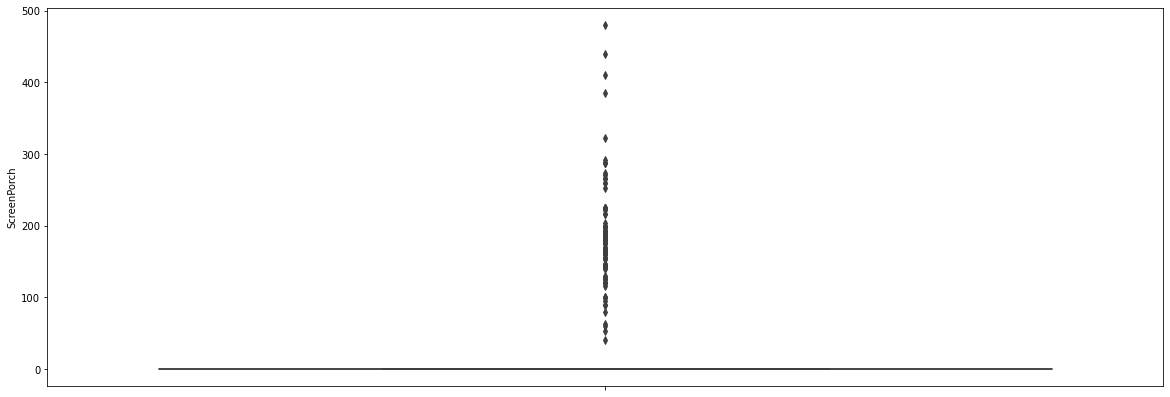

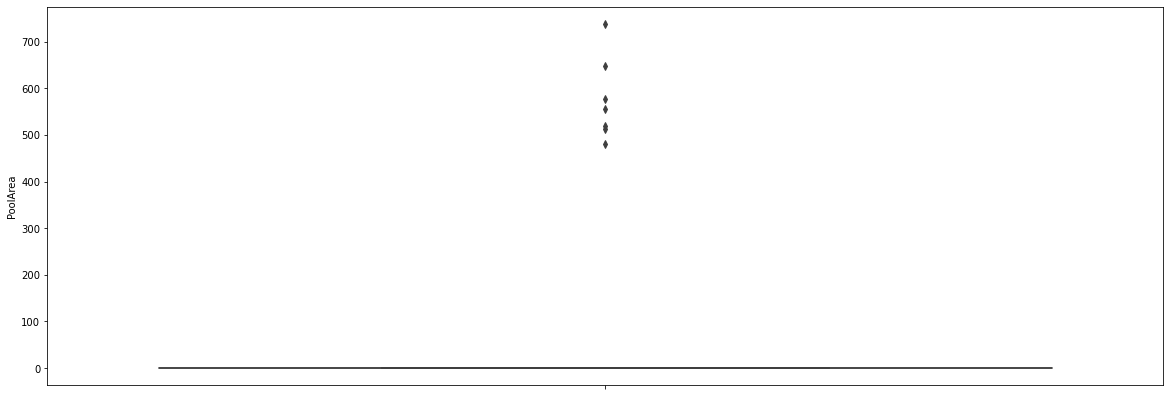

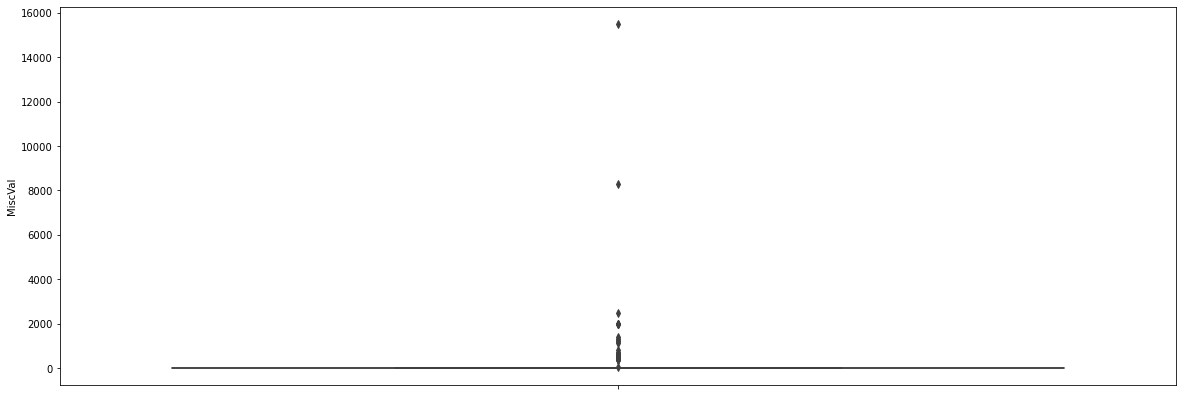

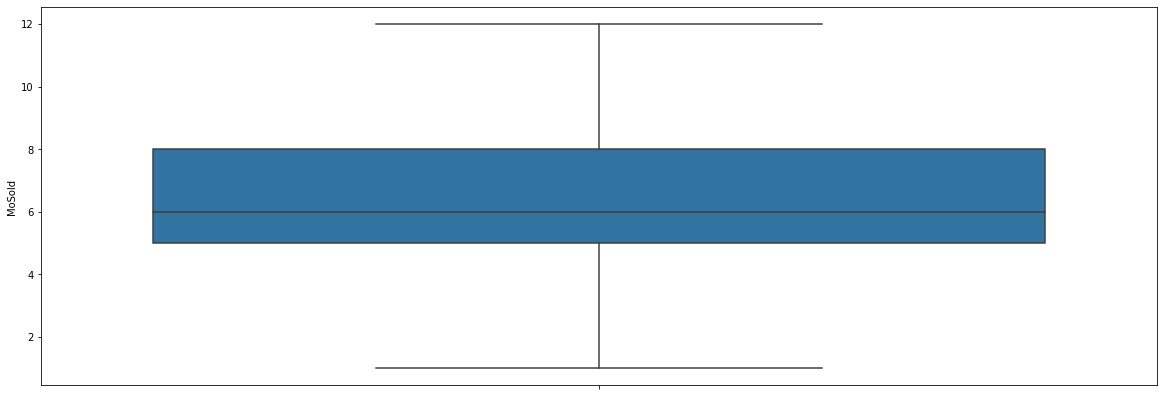

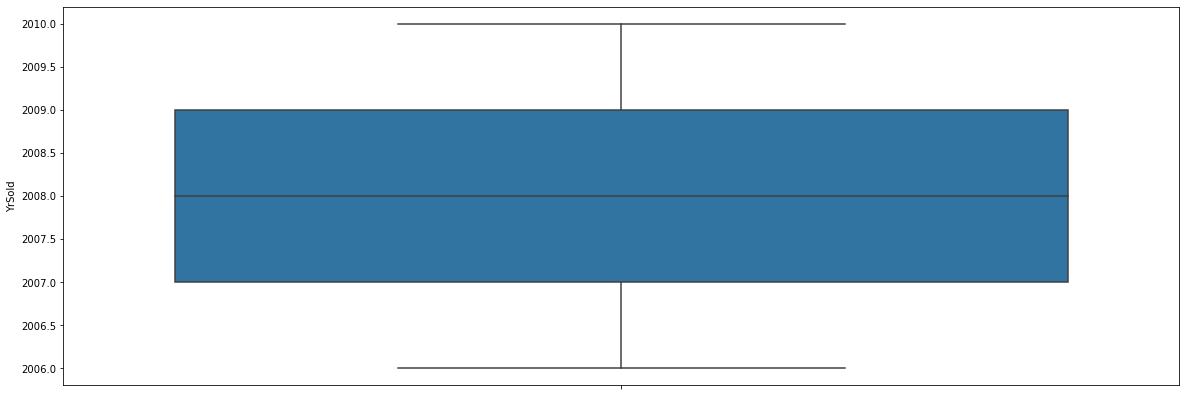

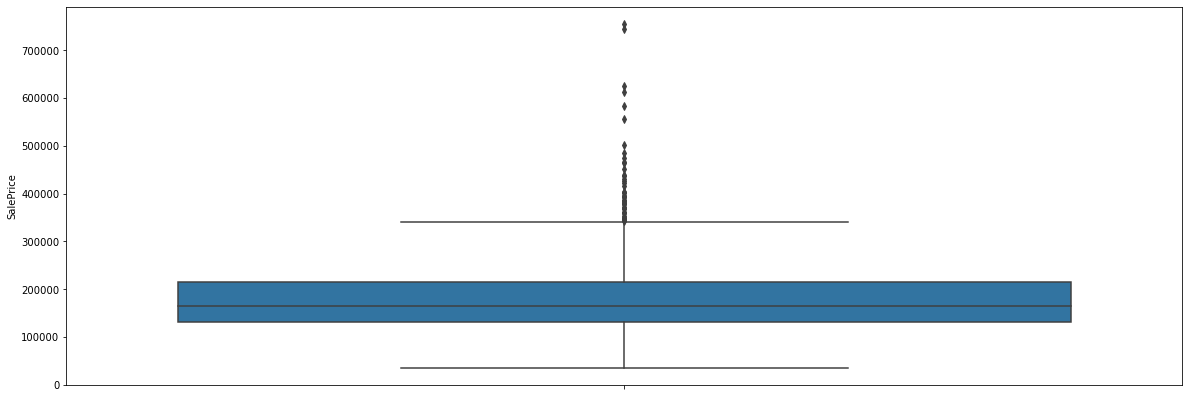

In [21]:
counter=1;
for i in range(0,len(continous_columns)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.boxplot(y=continous_columns[i],hue = continous_columns[i],data=df)
        #sns.boxplot(df[columns[i]])
        plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

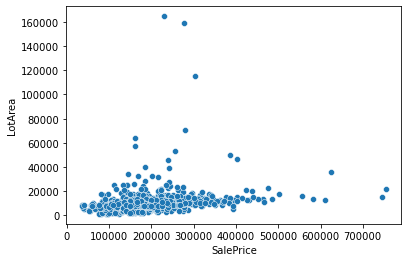

In [22]:
sns.scatterplot(x='SalePrice',y='LotArea',data=df)


In [23]:
print(categorical_columns)


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


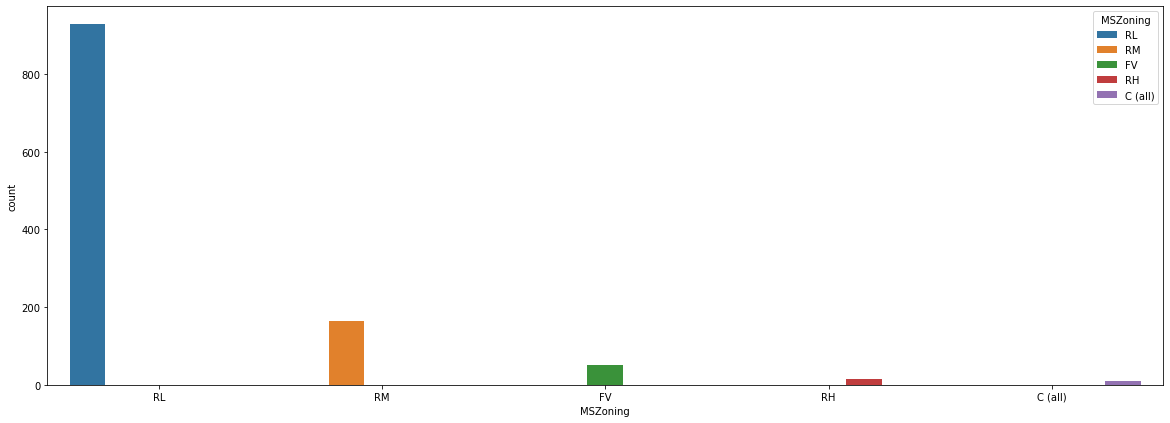

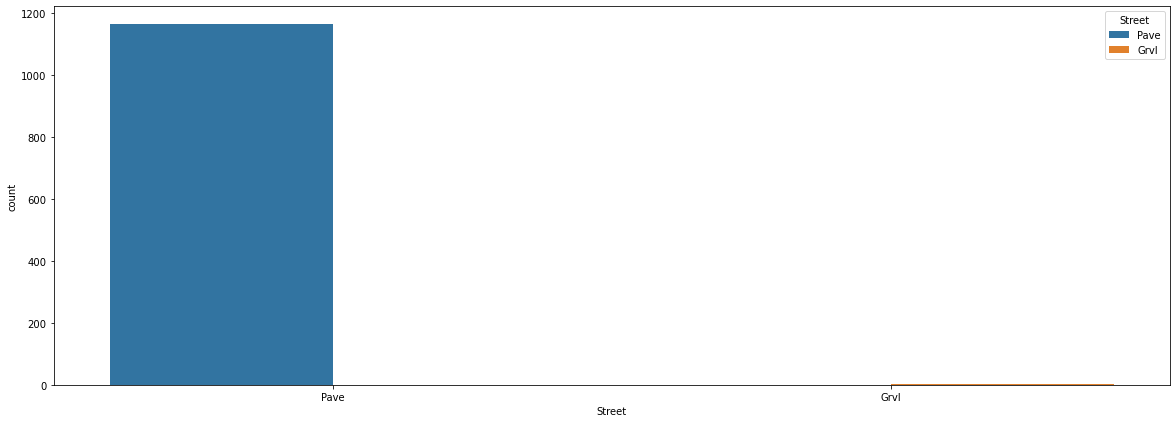

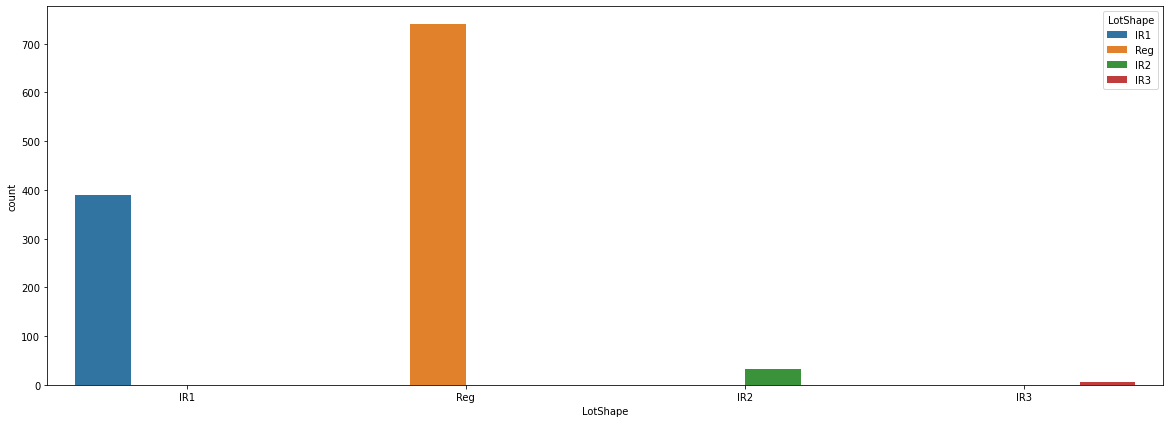

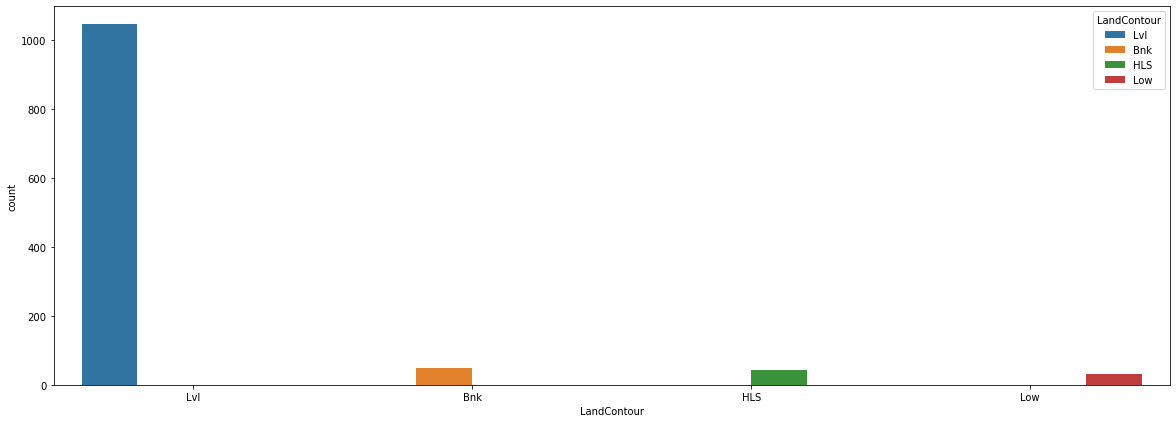

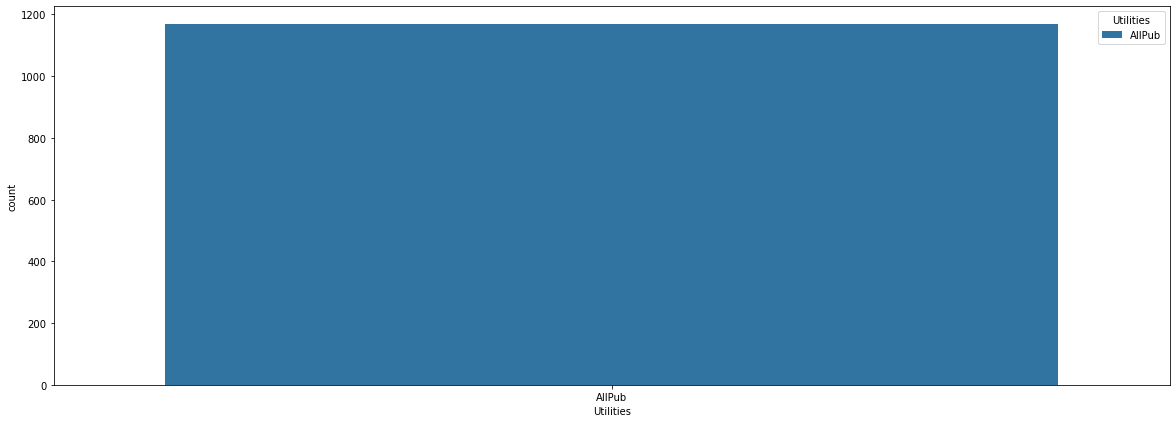

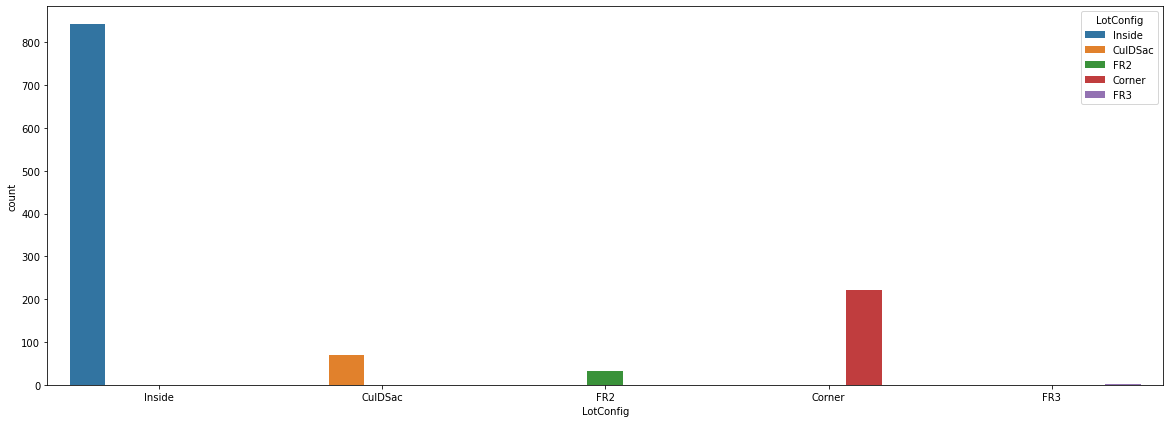

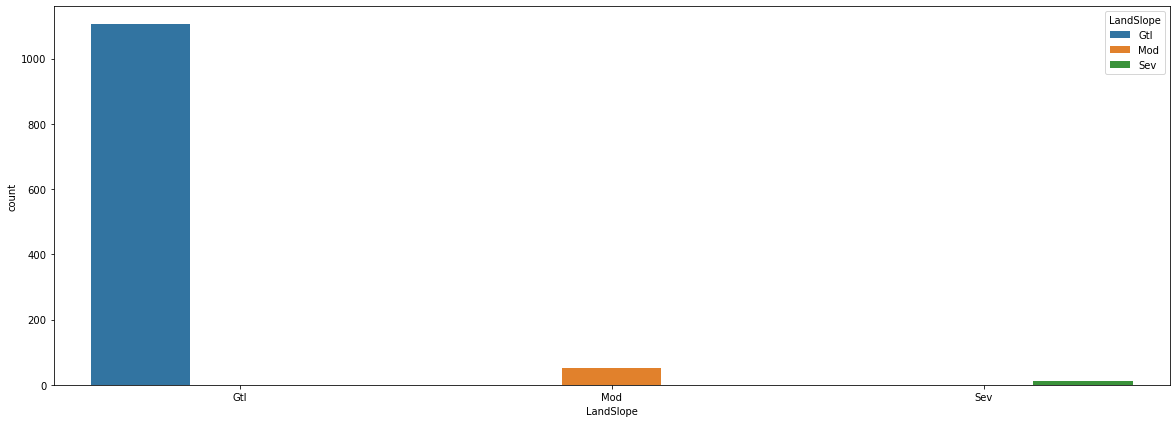

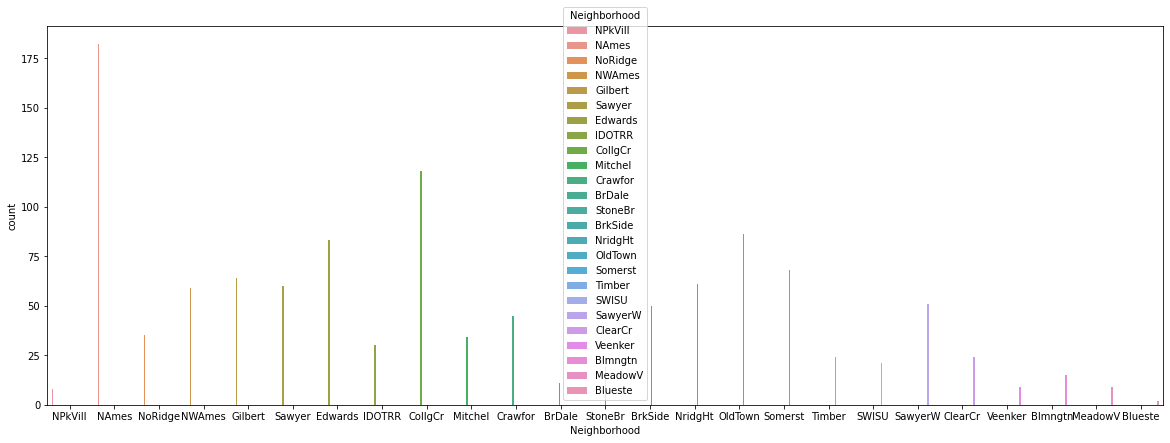

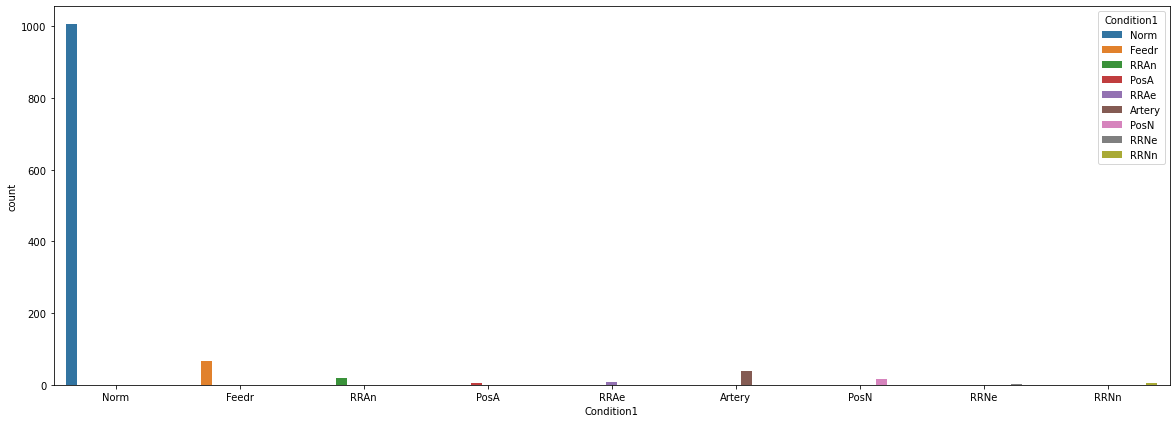

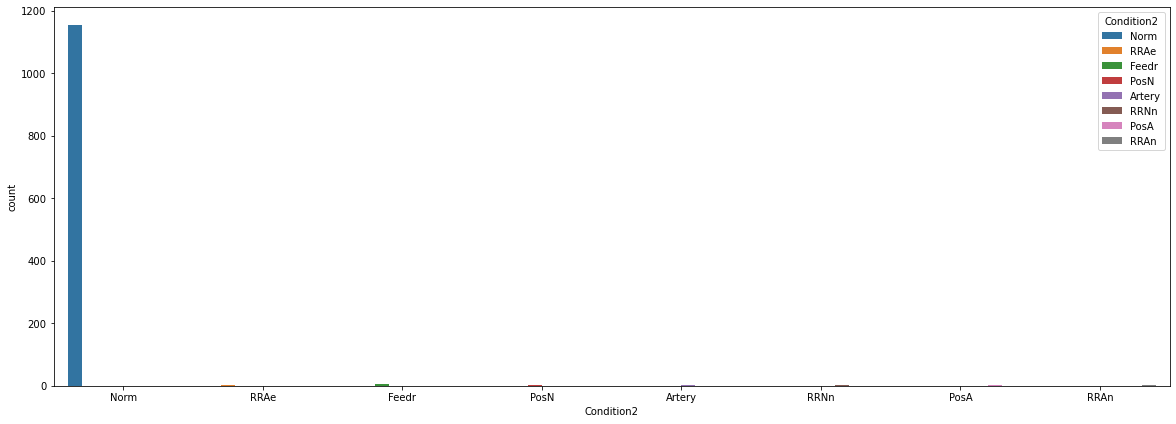

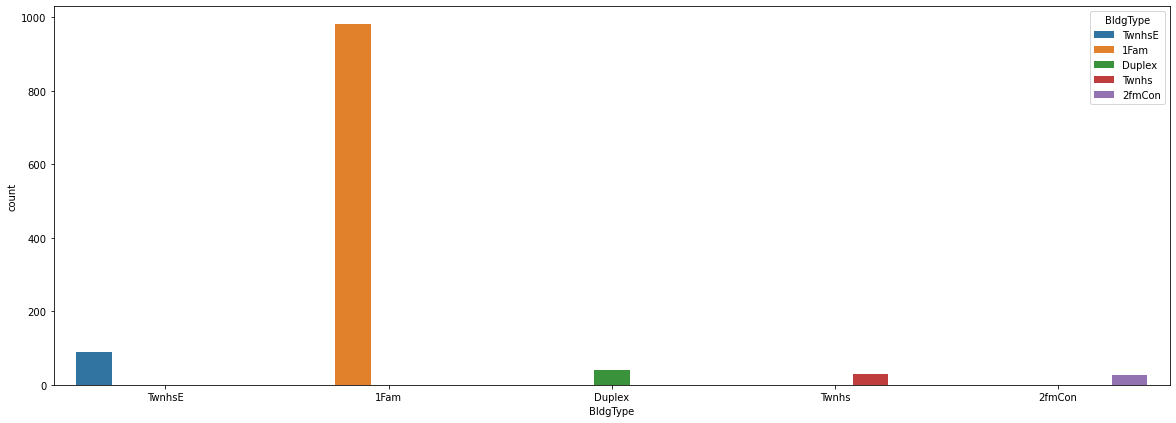

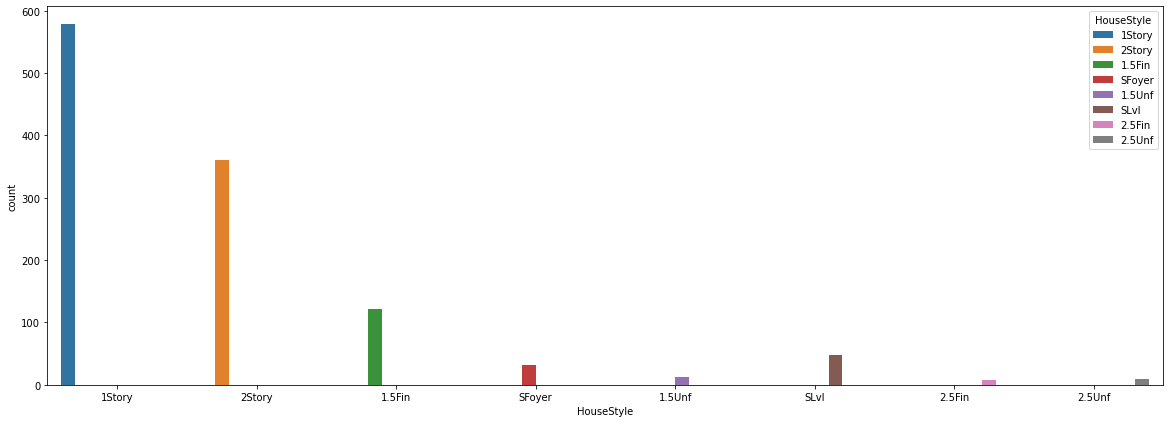

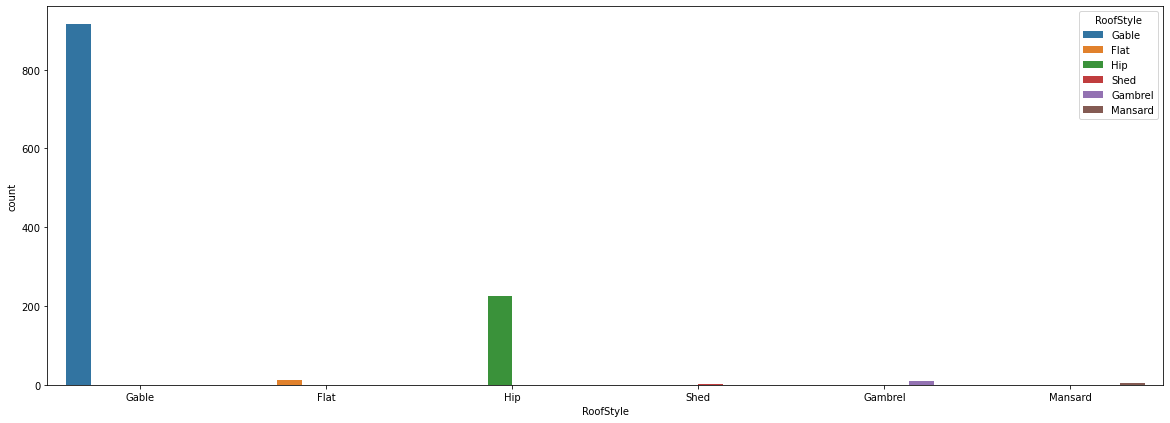

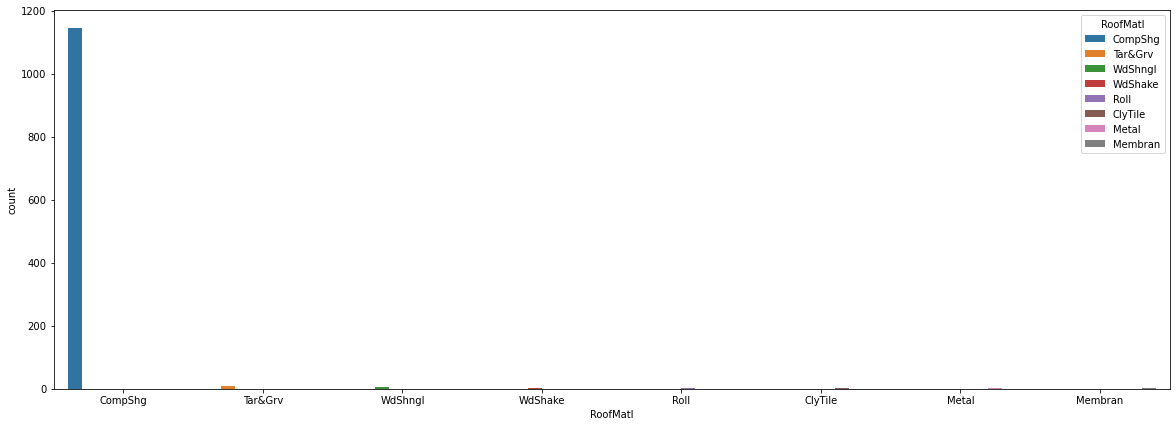

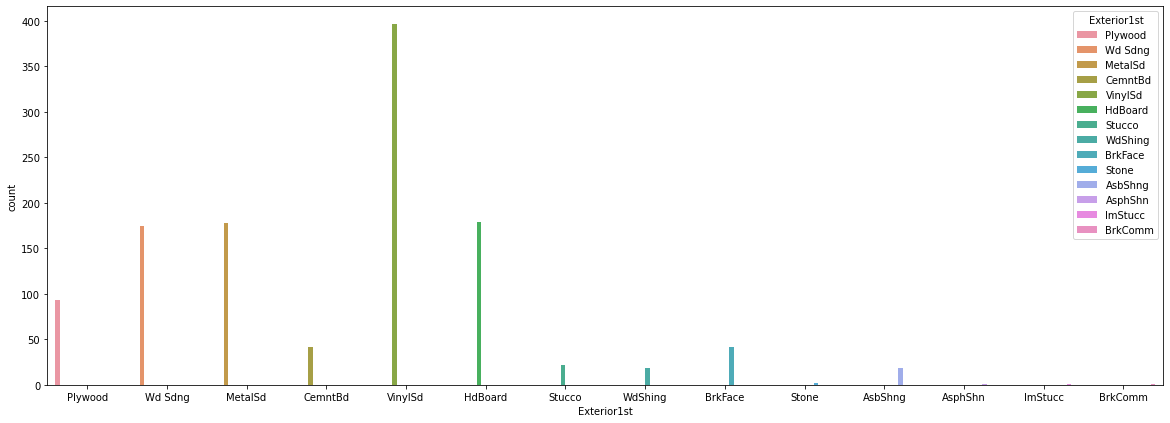

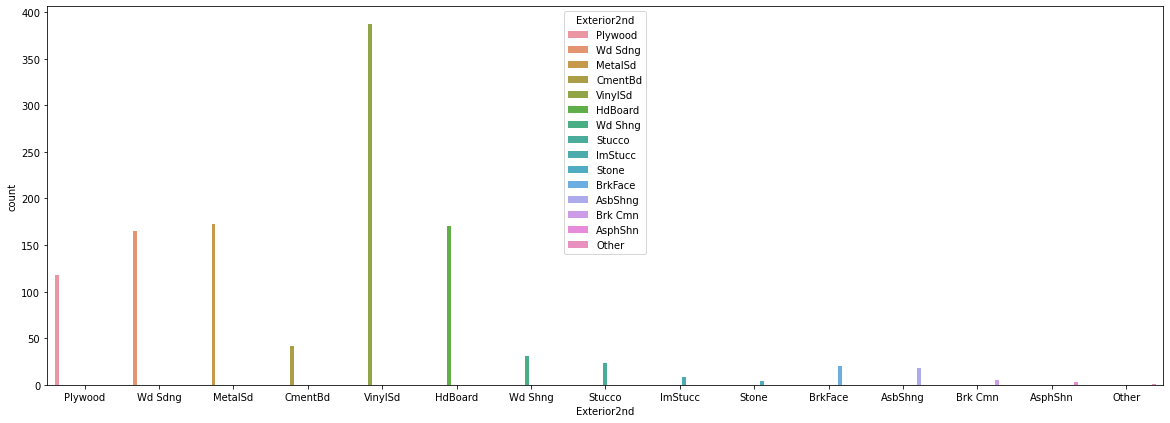

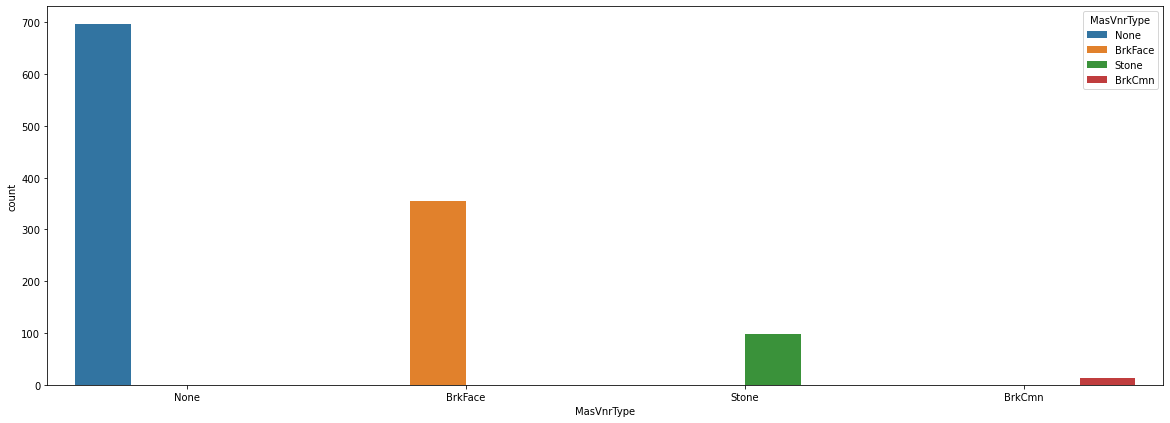

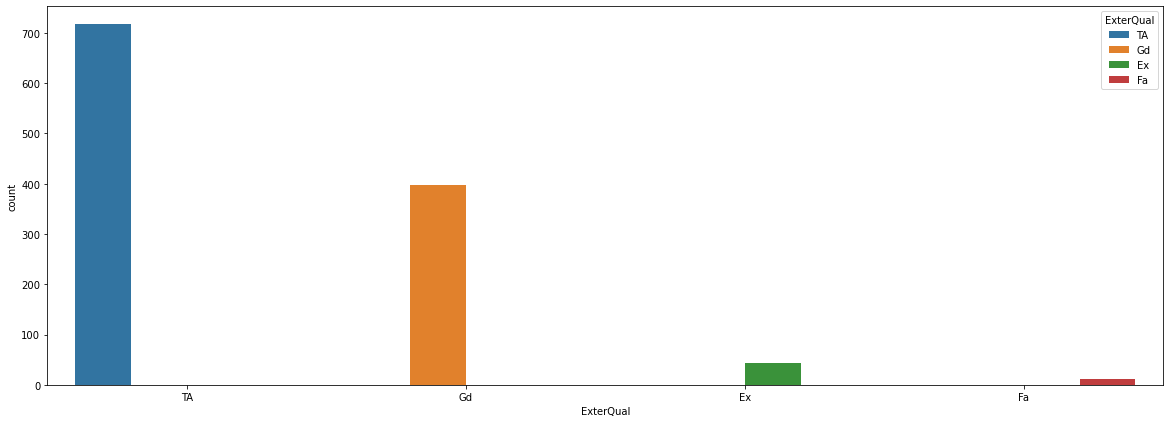

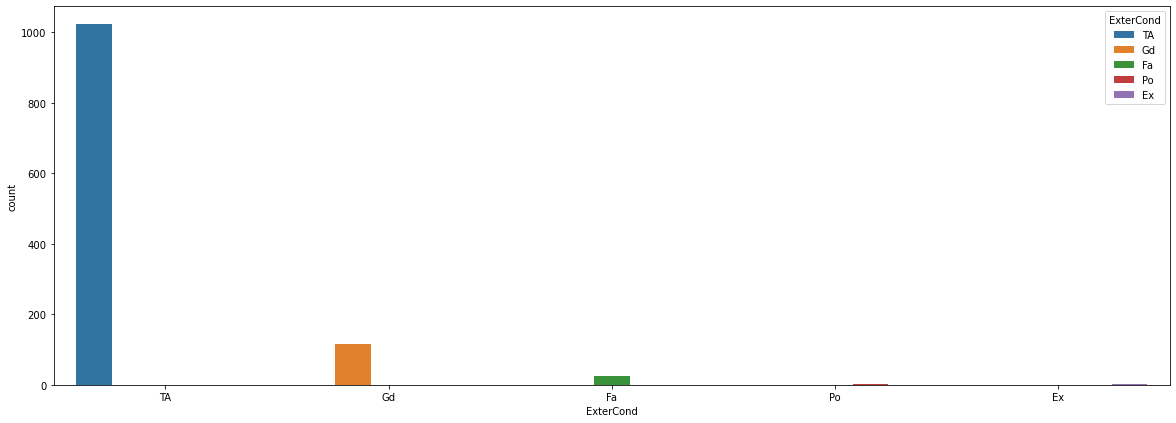

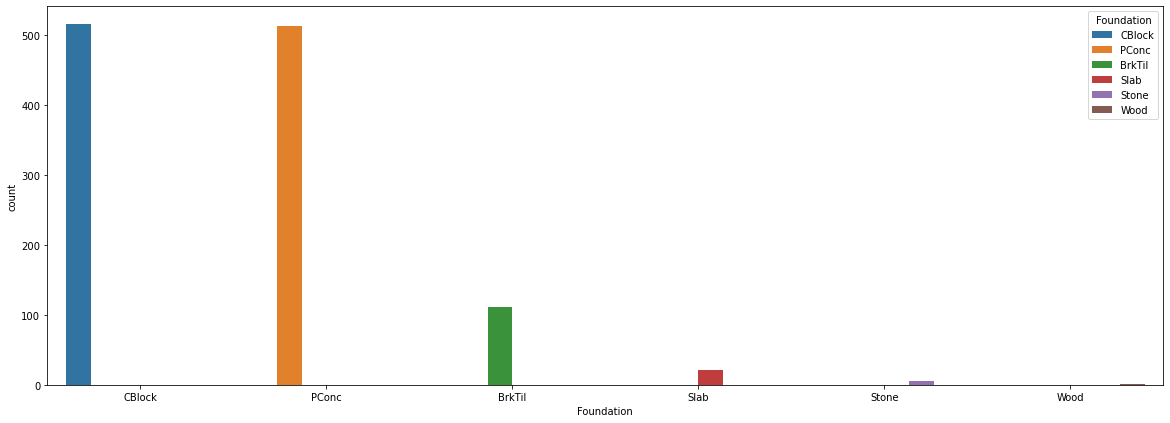

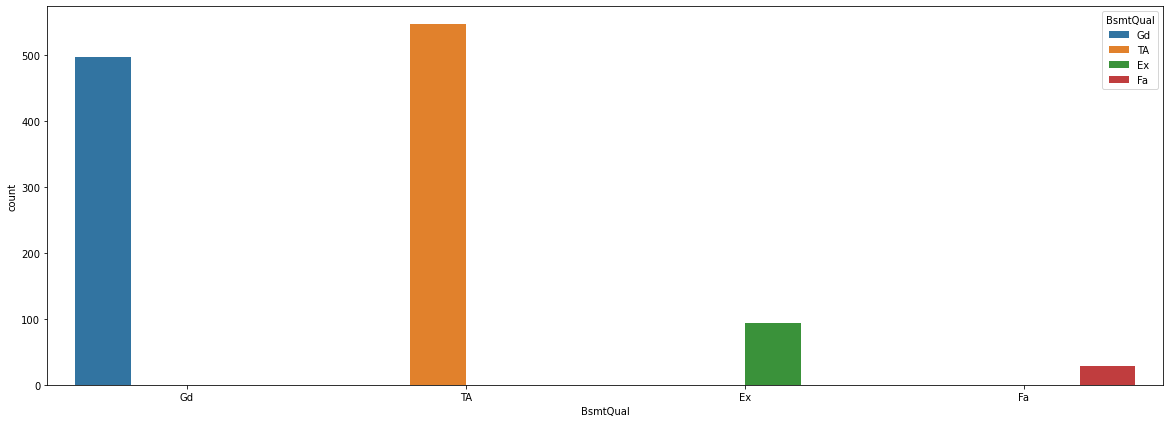

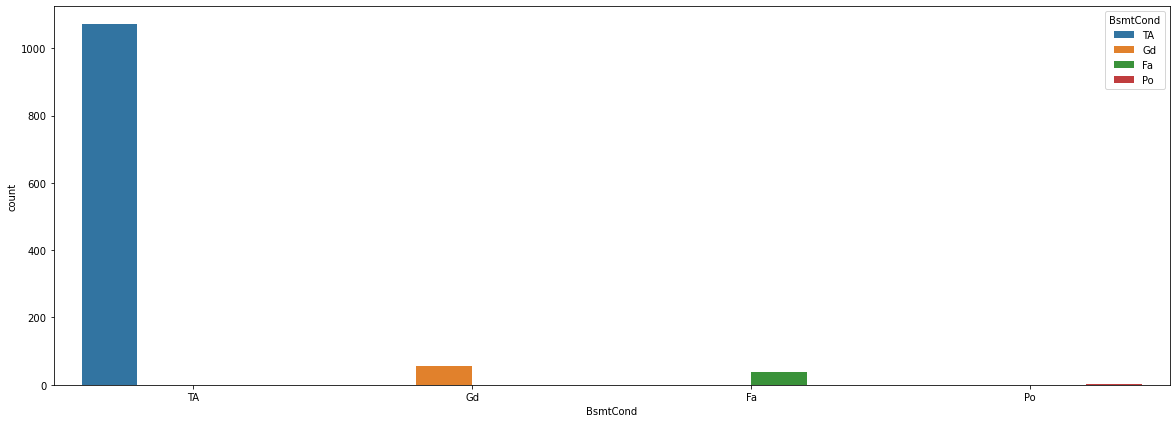

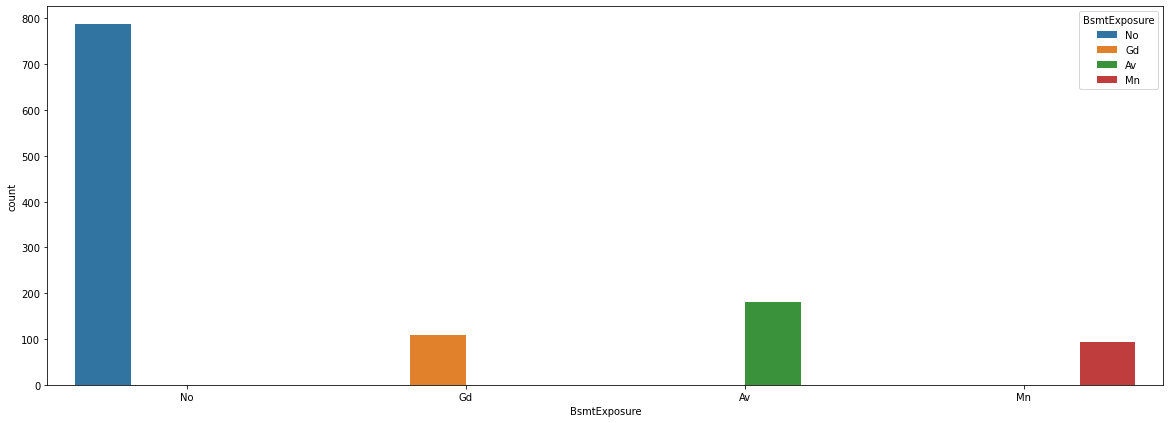

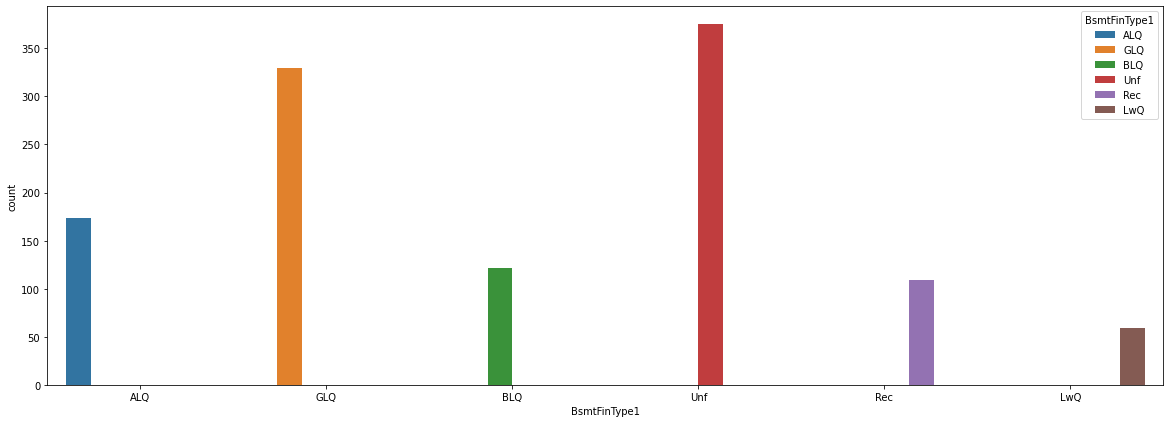

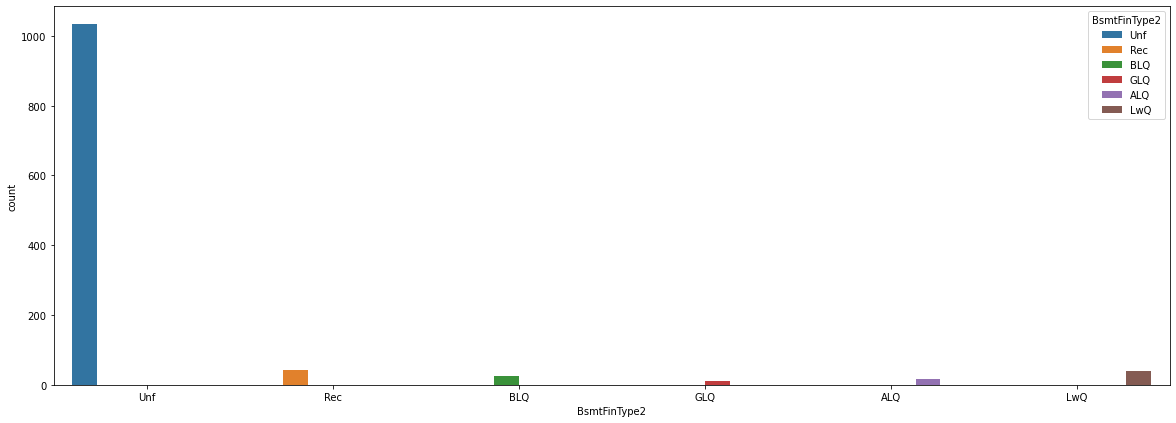

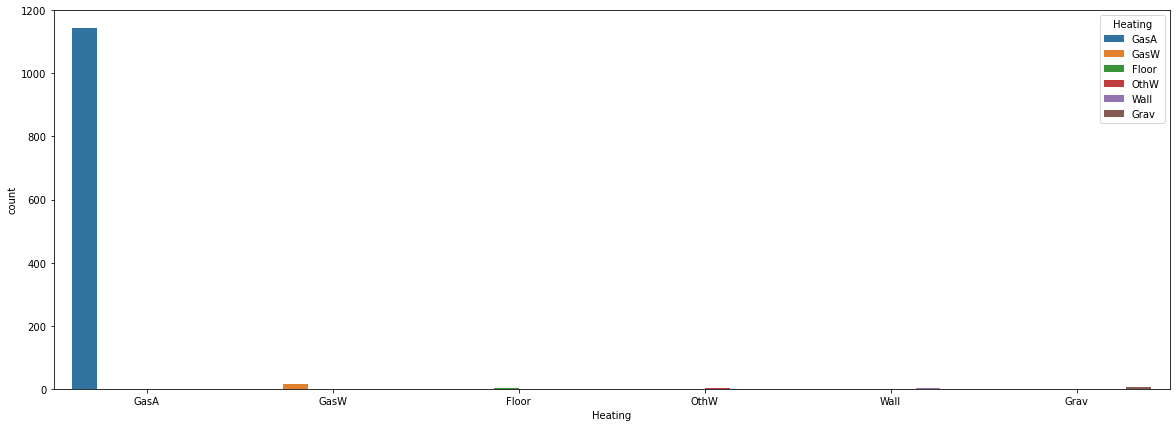

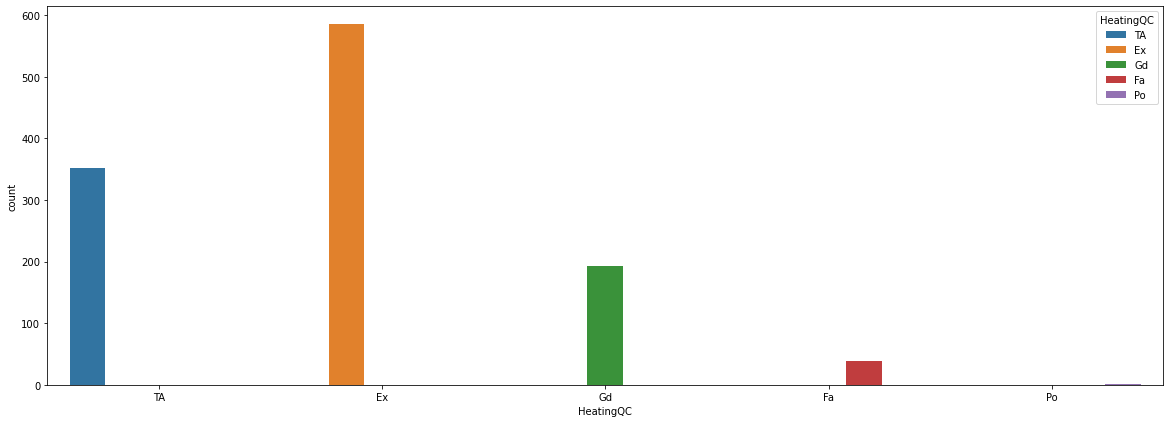

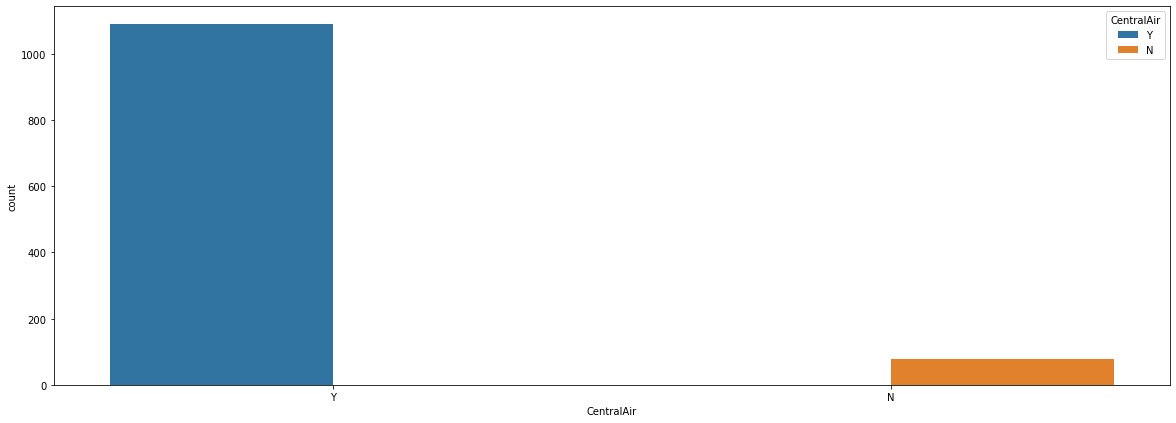

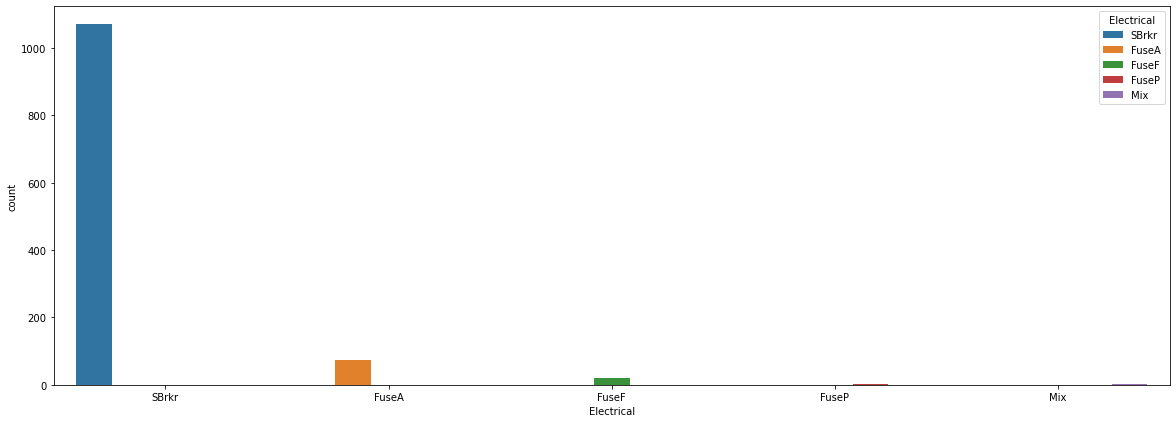

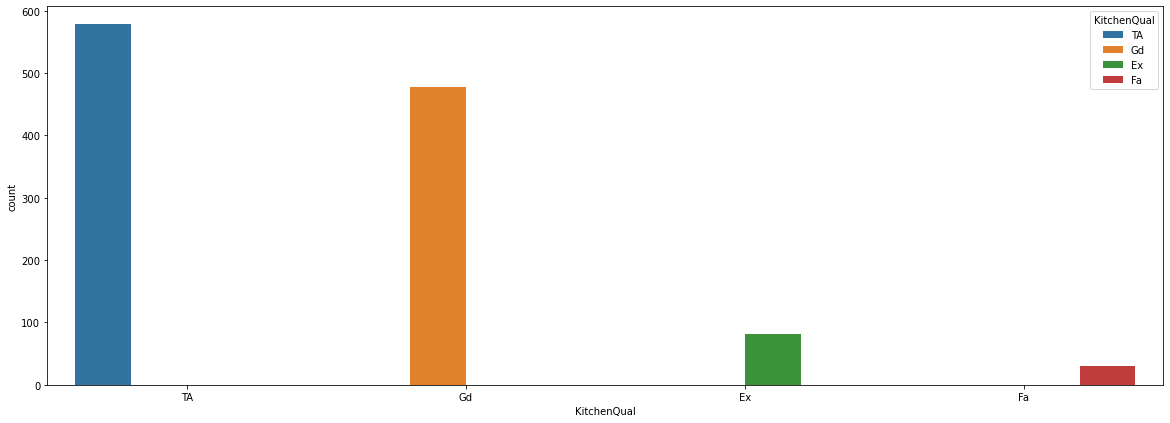

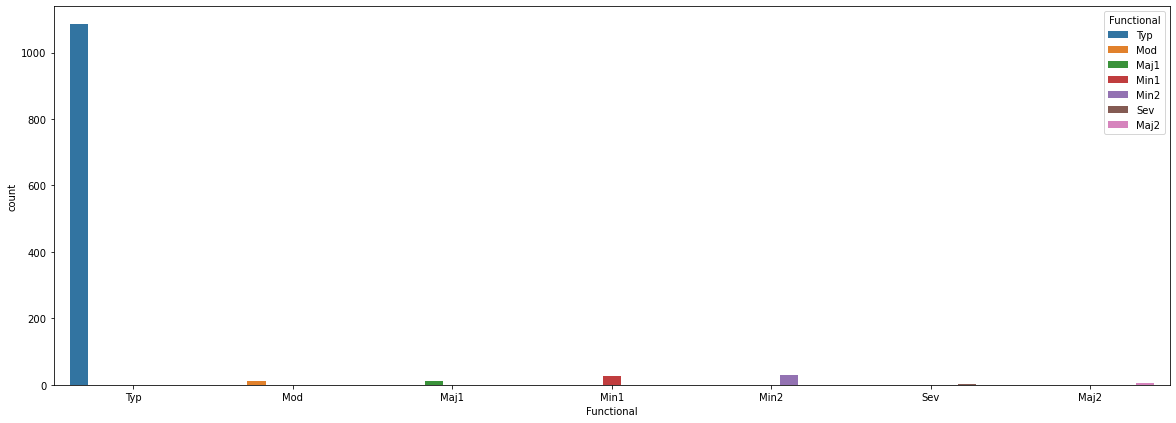

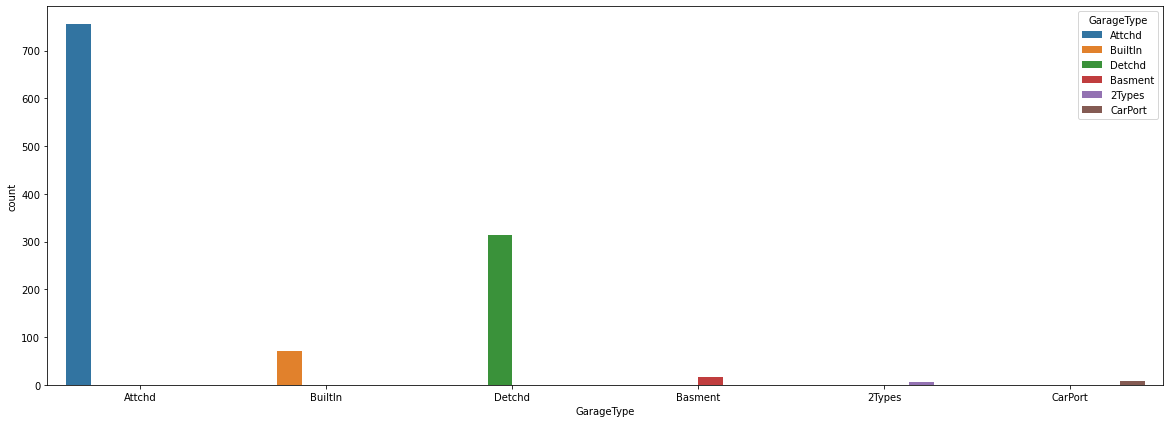

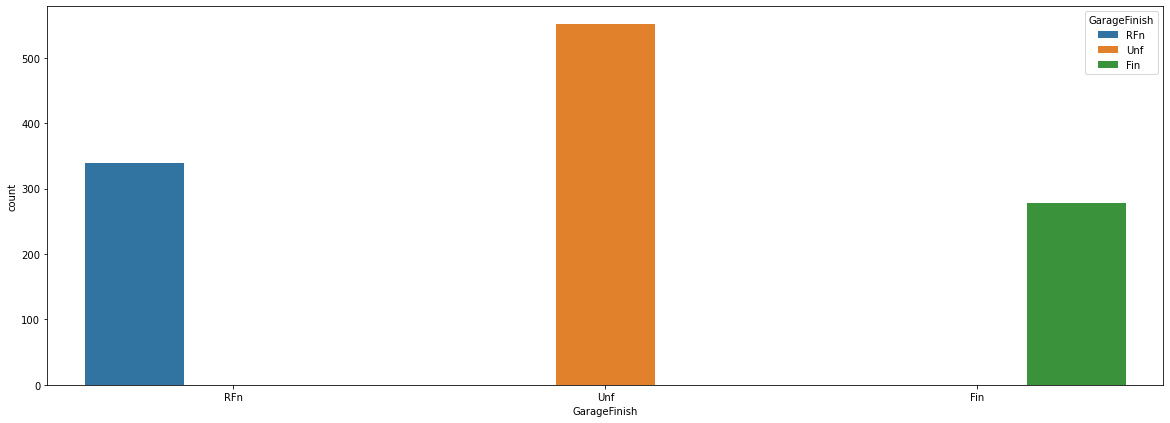

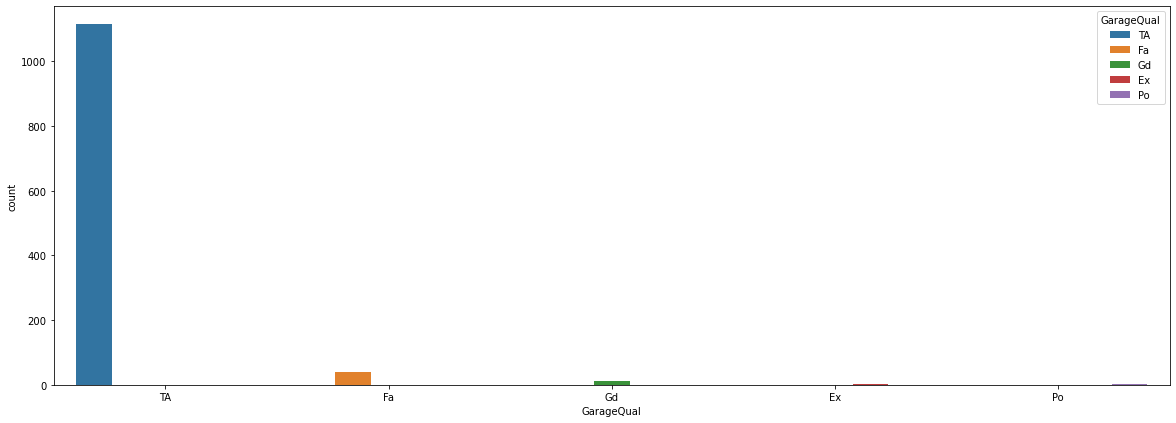

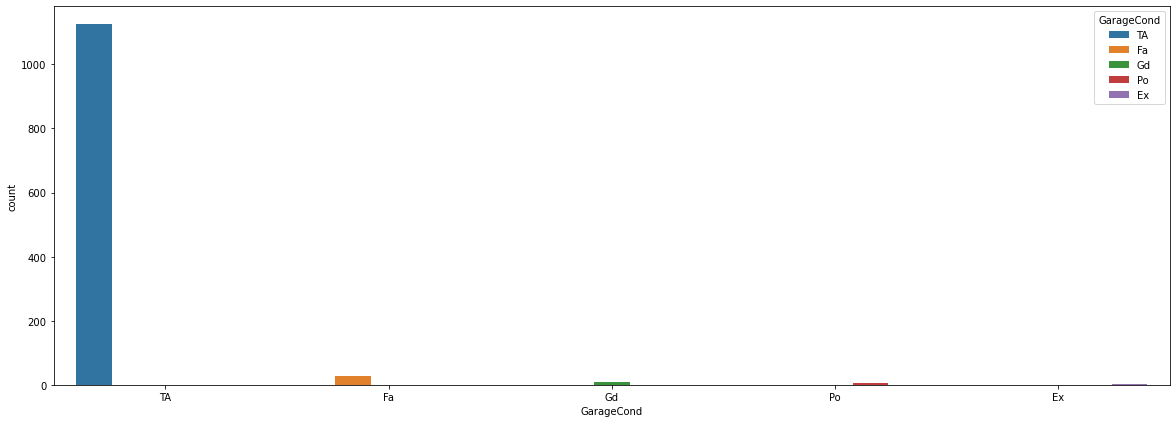

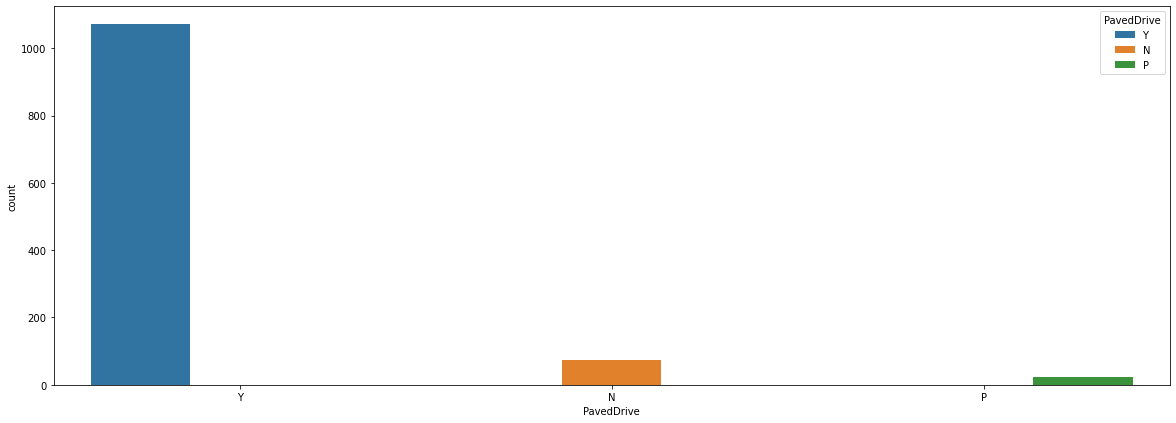

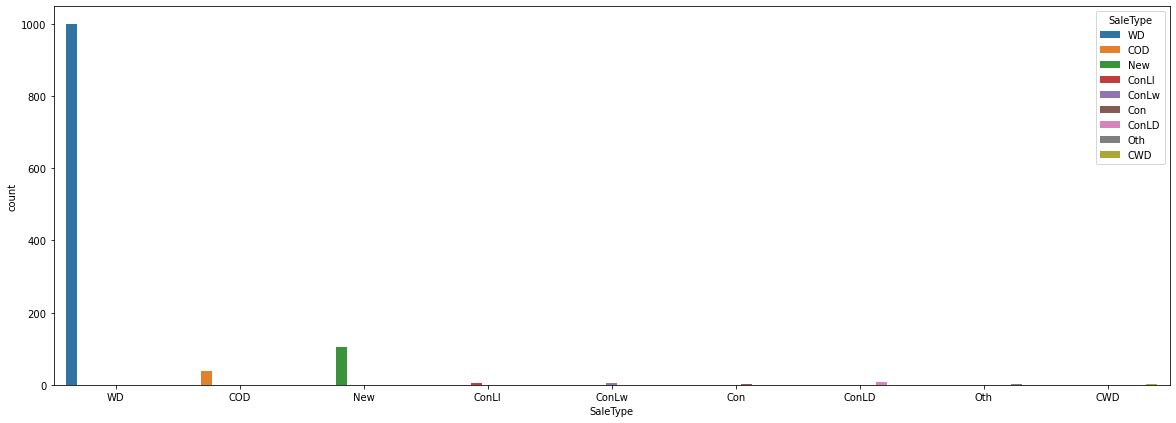

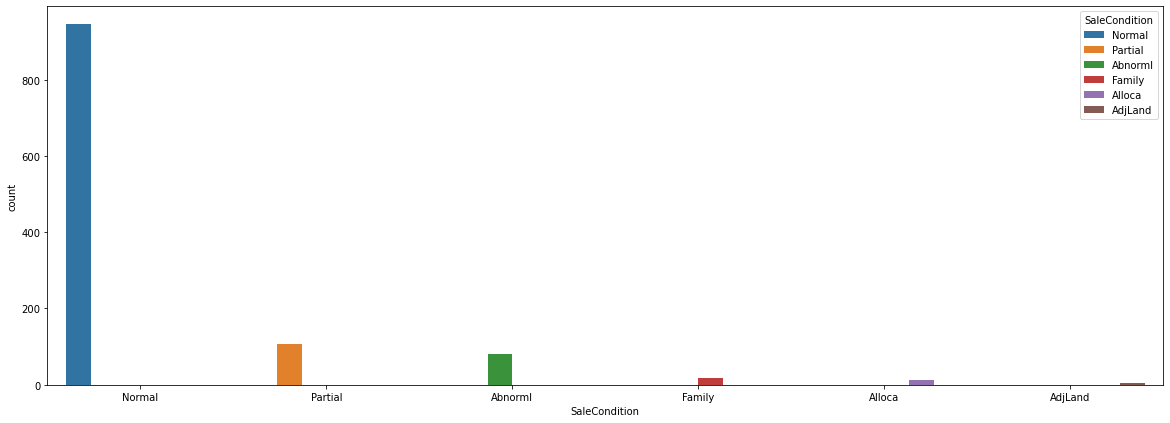

In [24]:
counter=1;


for column in categorical_columns:
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.countplot(x=column,hue=column,data=df)
        plt.show()

In [25]:
df['Street'].value_counts()


Pave    1164
Grvl       4
Name: Street, dtype: int64

In [26]:
df['Utilities'].value_counts()


AllPub    1168
Name: Utilities, dtype: int64

In [27]:
df['Condition2'].value_counts()


Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [28]:
df['Heating'].value_counts()


GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64

In [29]:
df['RoofMatl'].value_counts()


CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

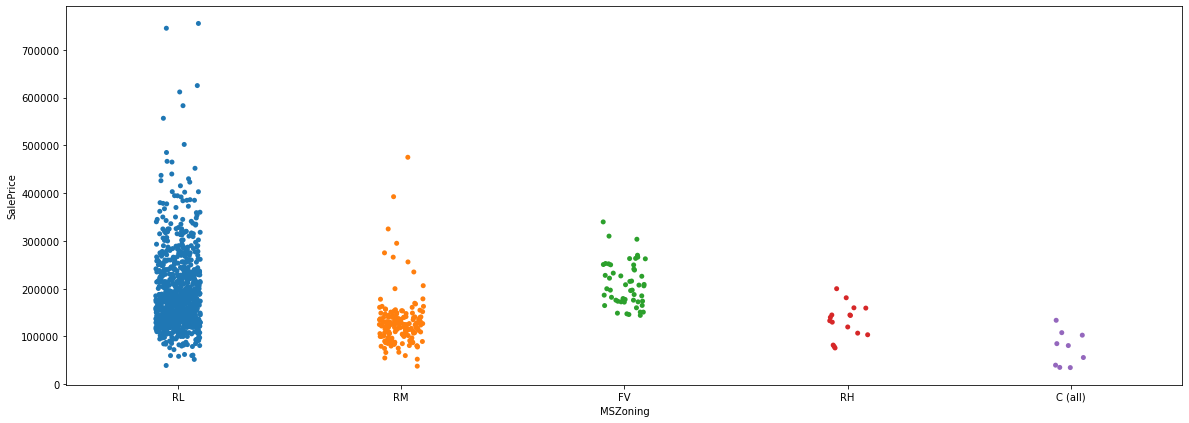

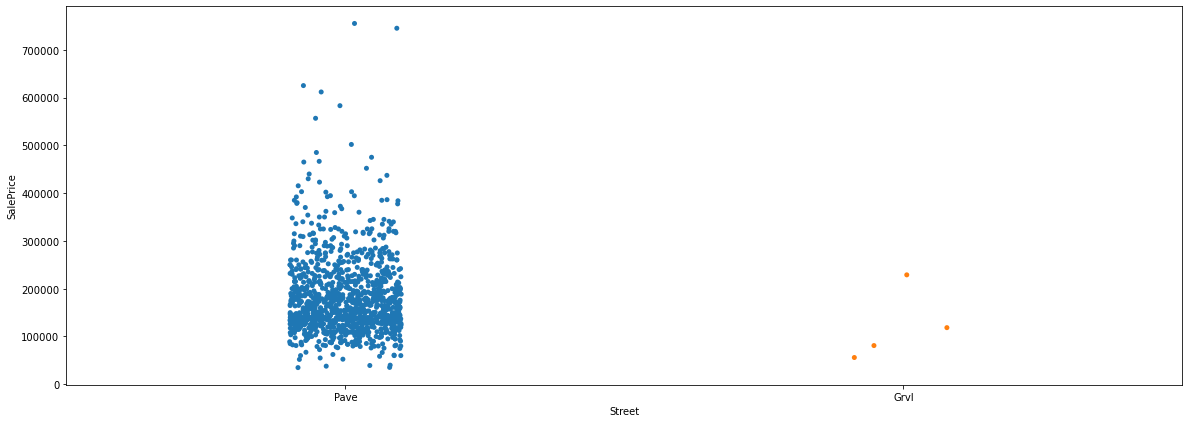

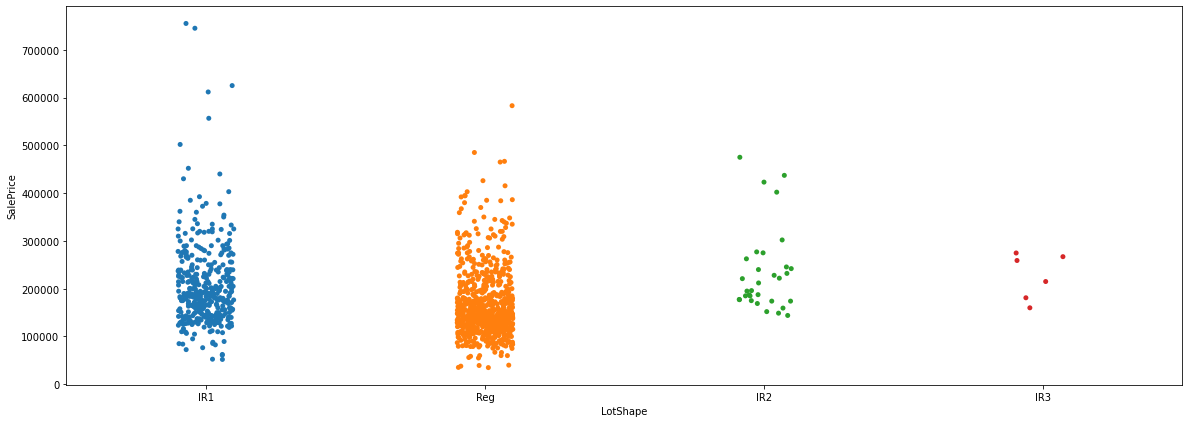

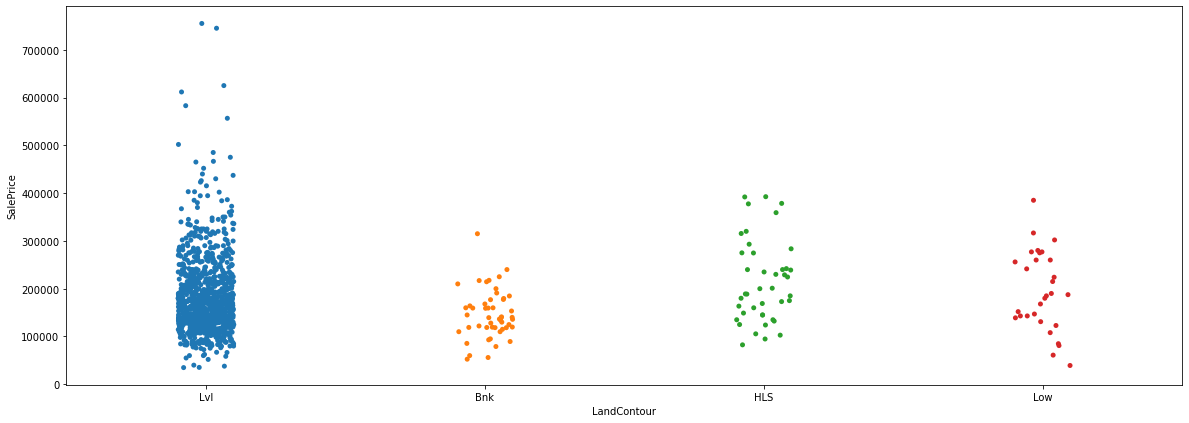

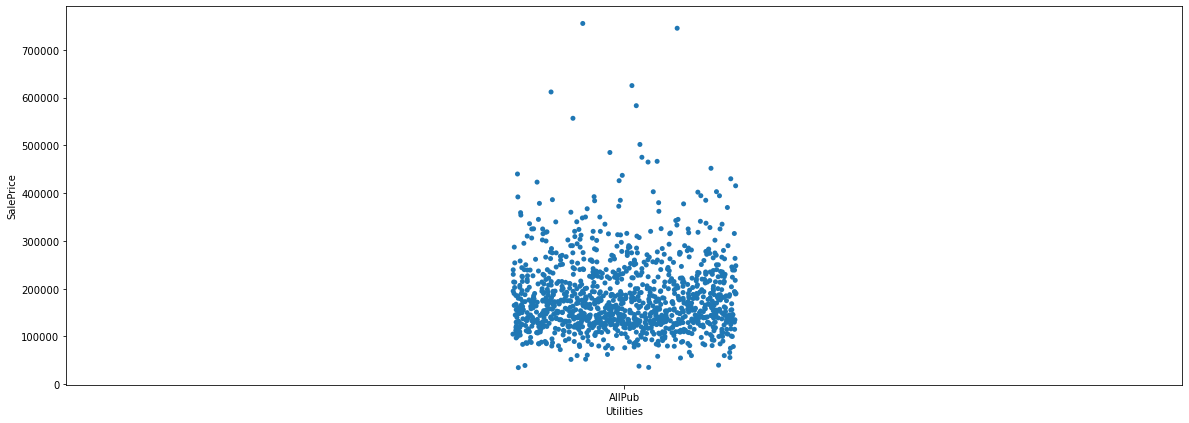

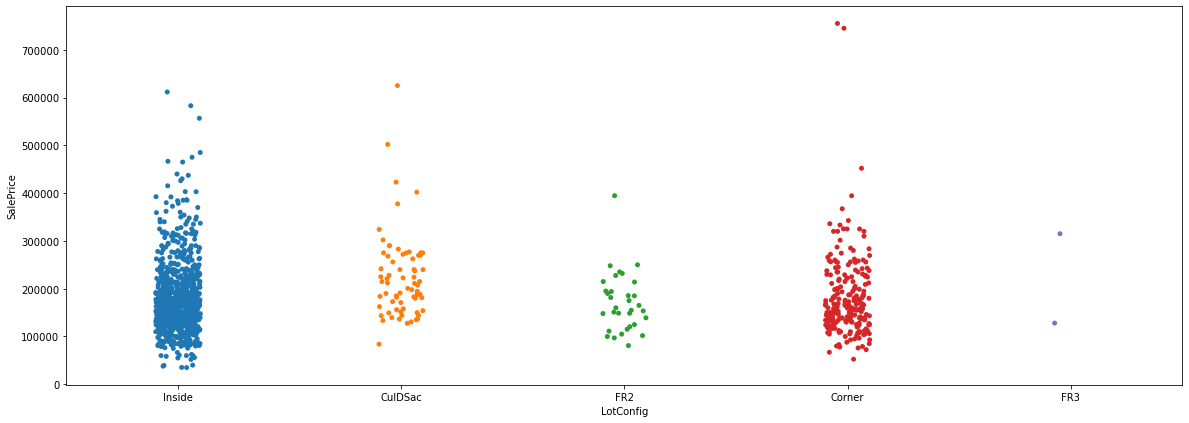

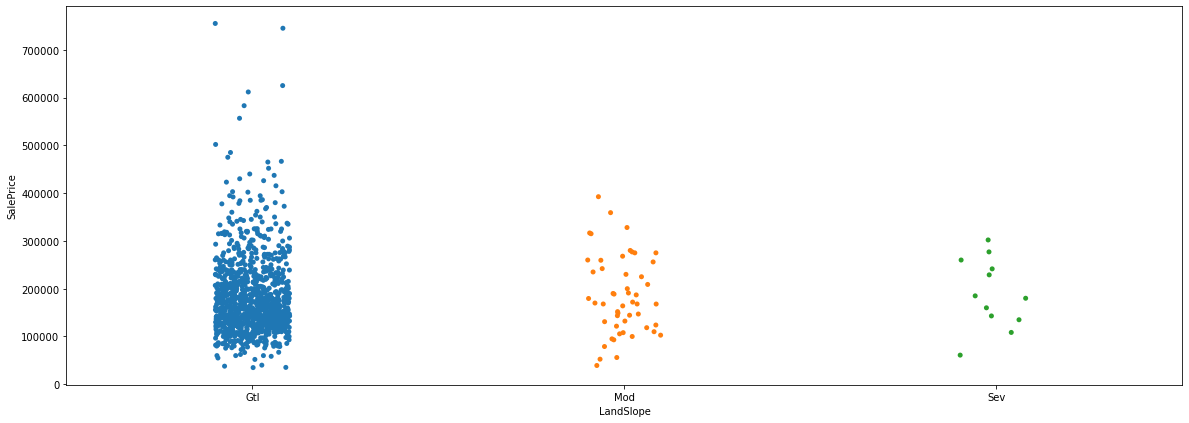

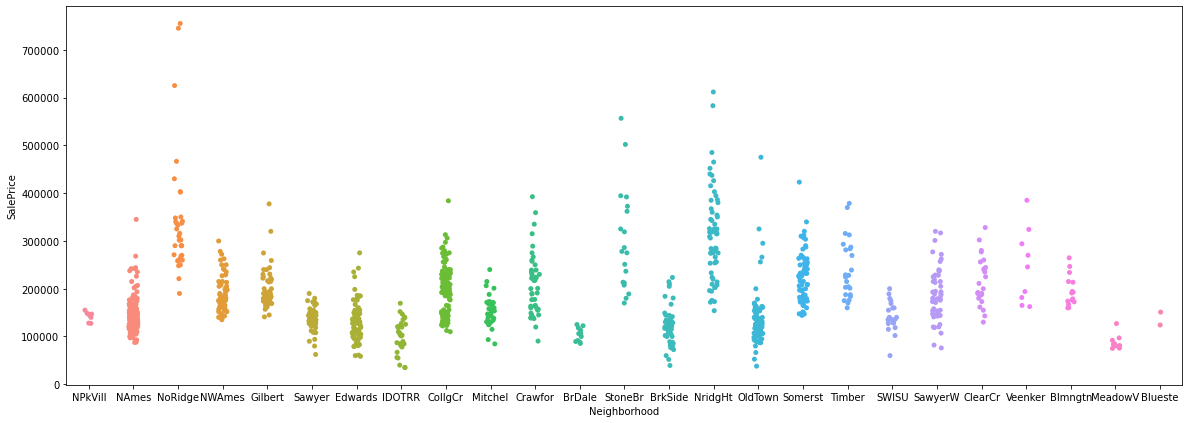

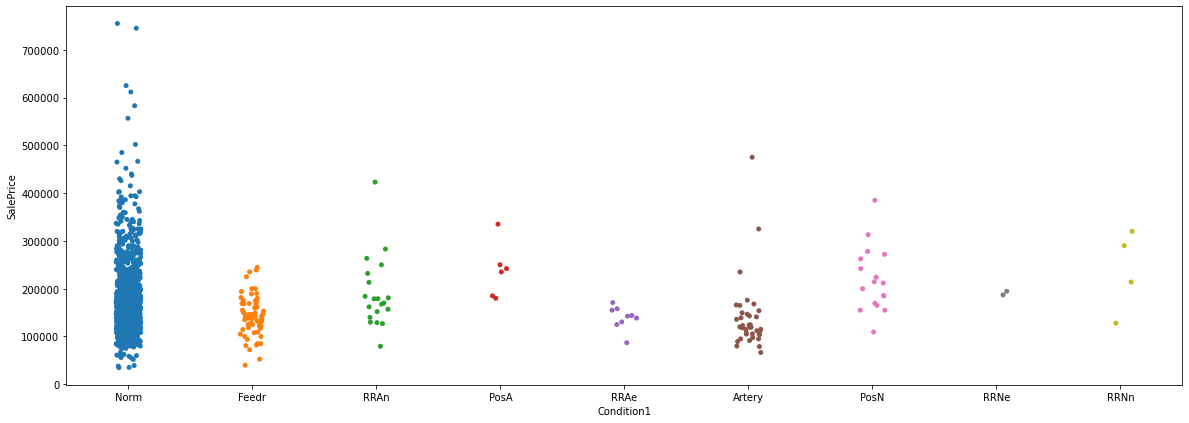

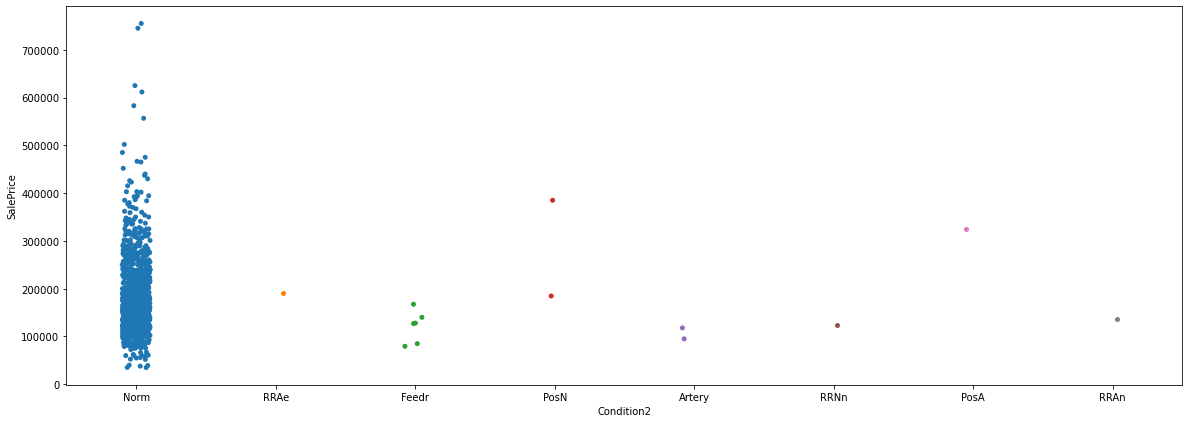

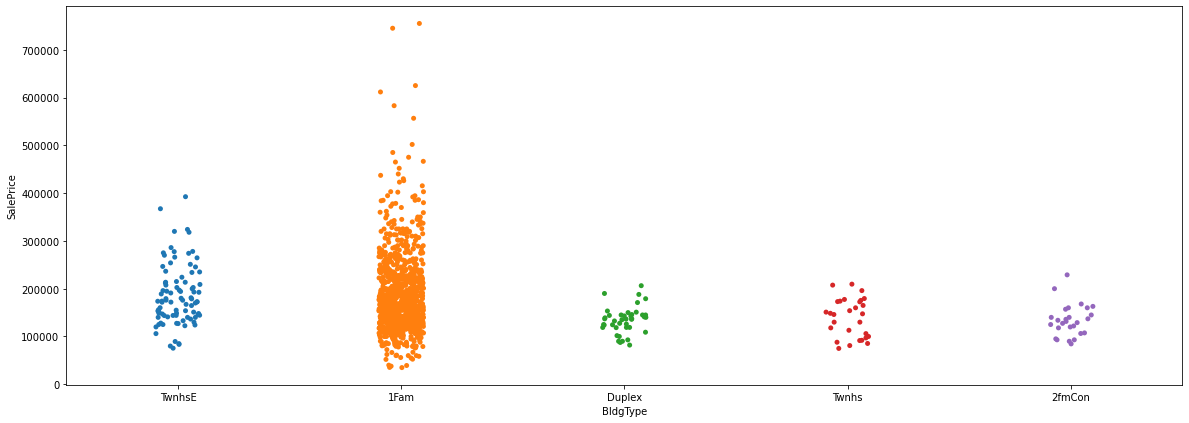

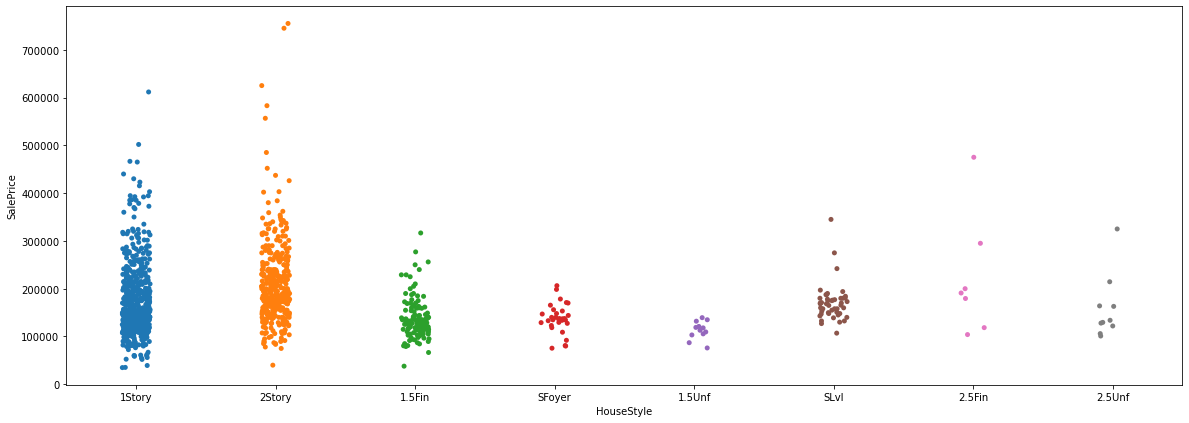

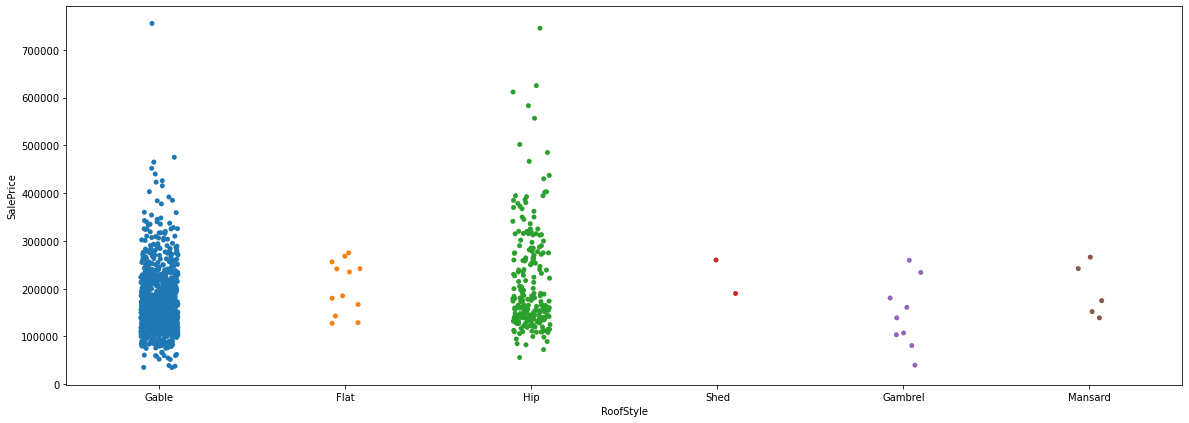

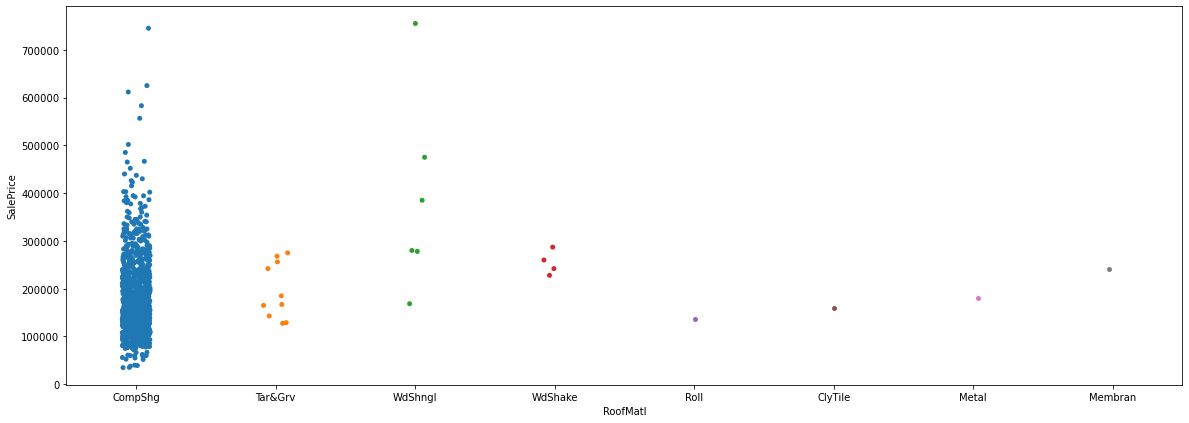

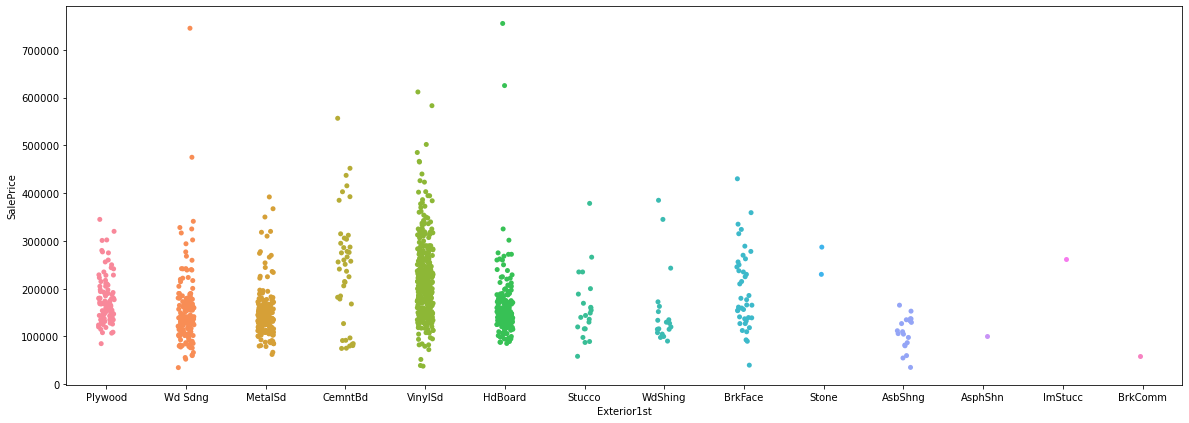

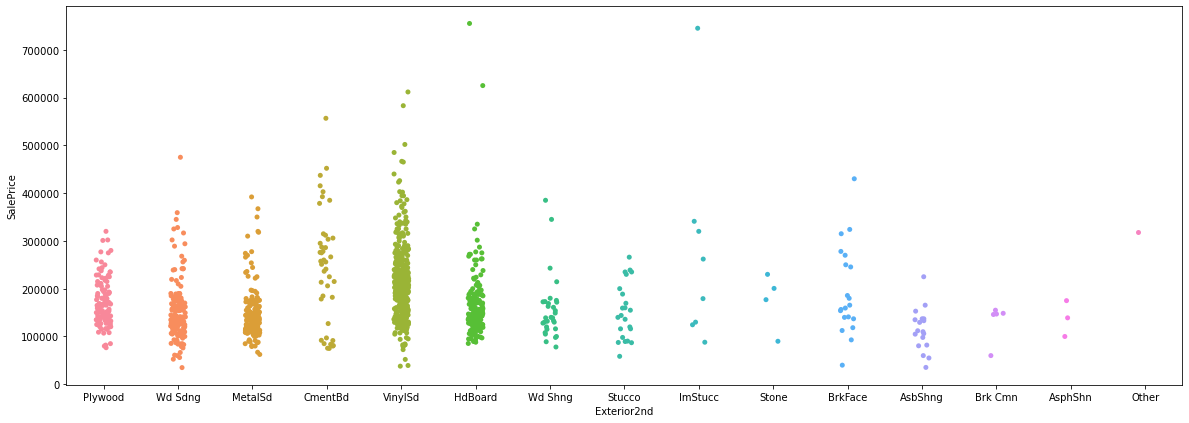

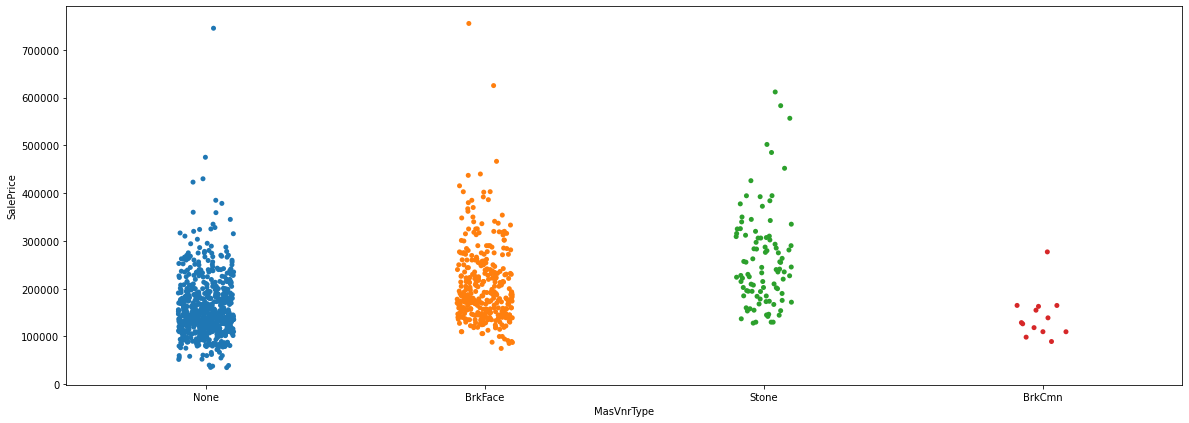

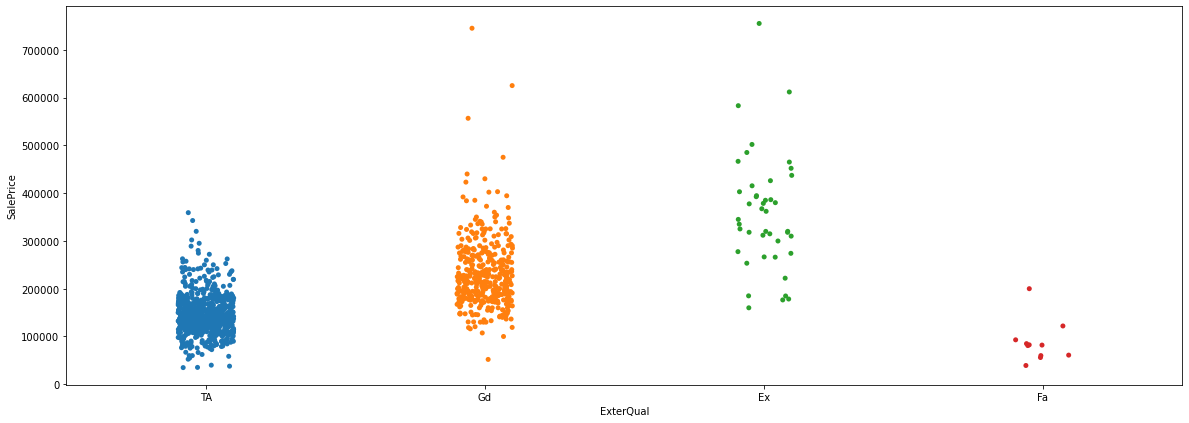

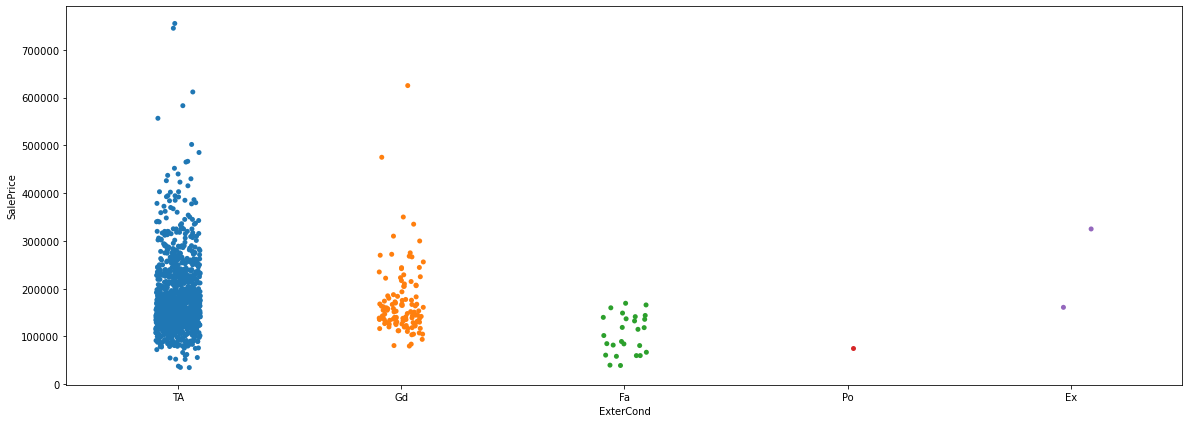

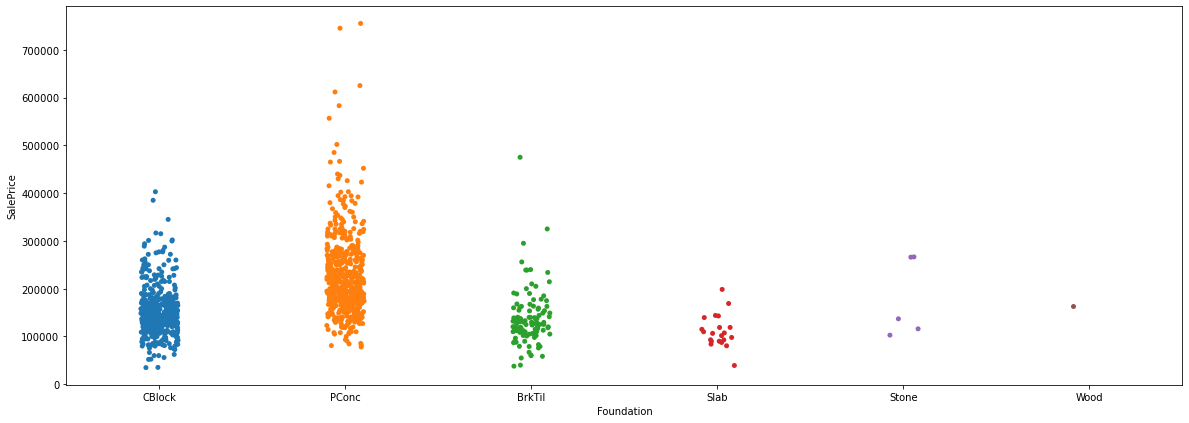

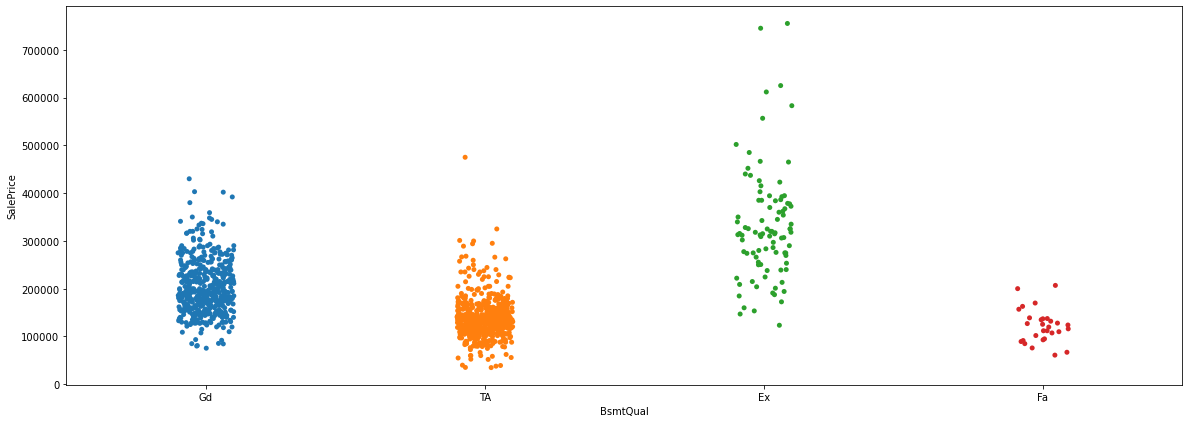

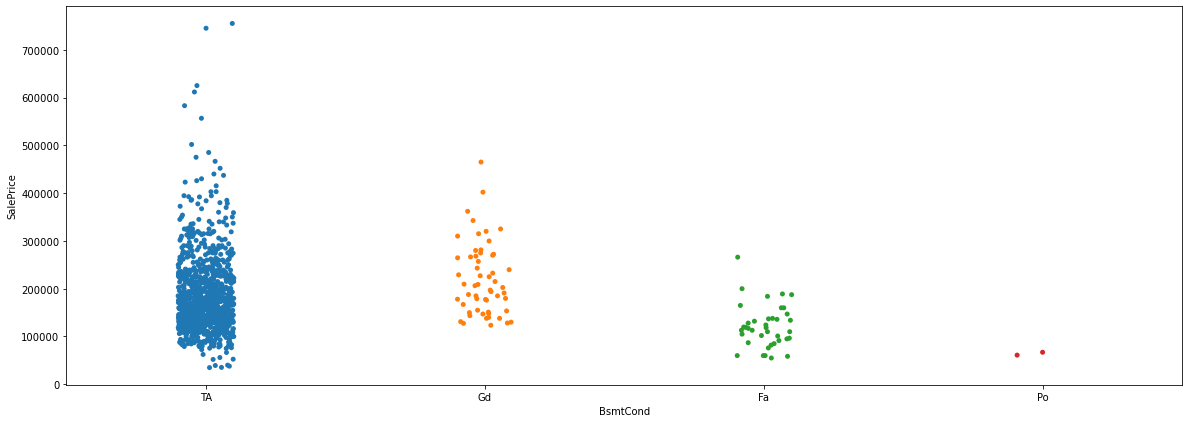

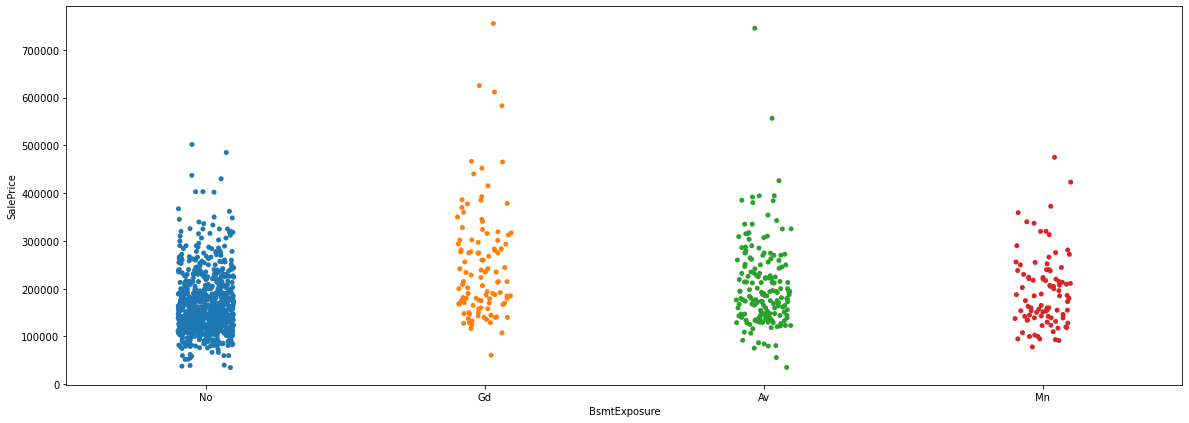

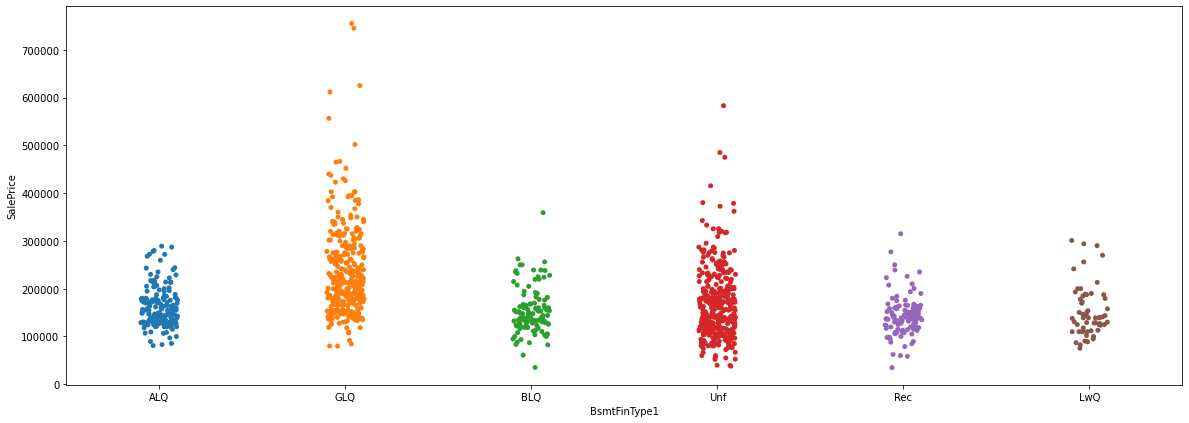

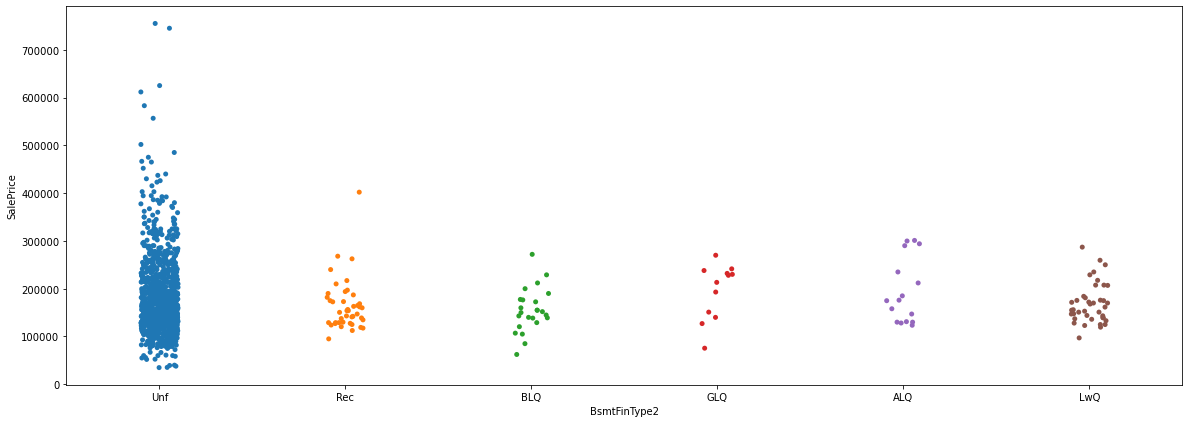

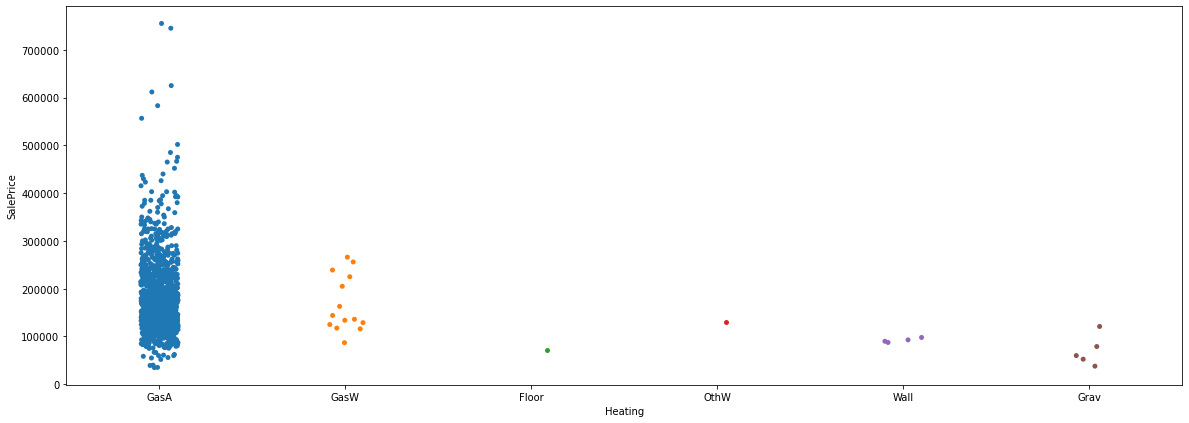

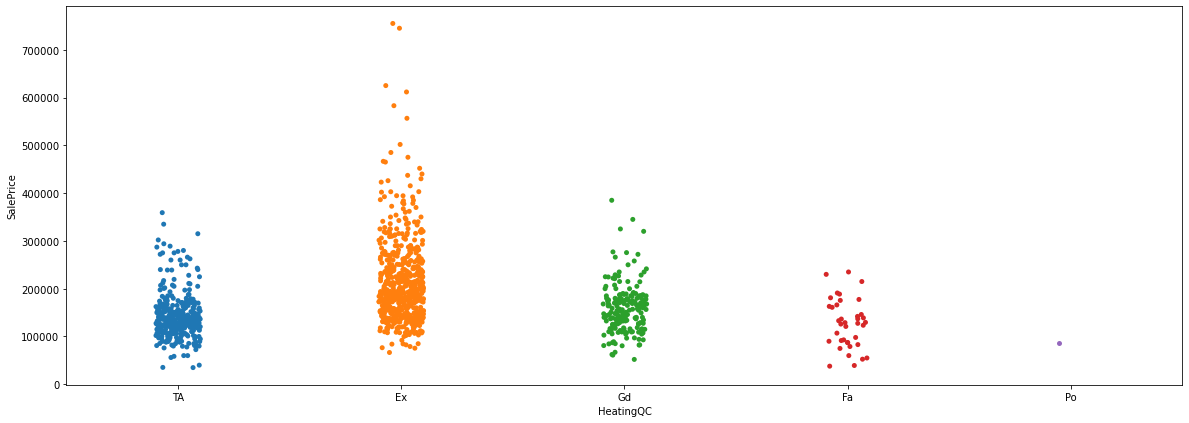

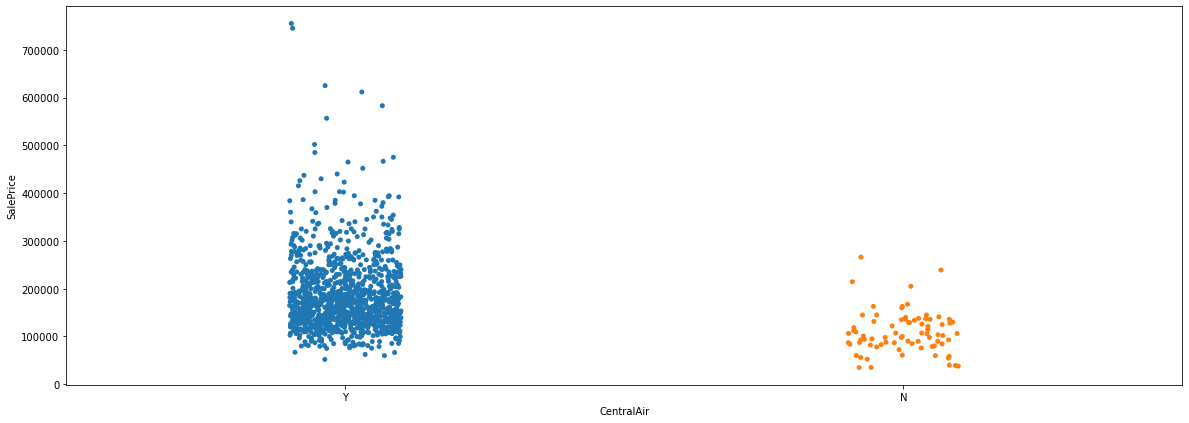

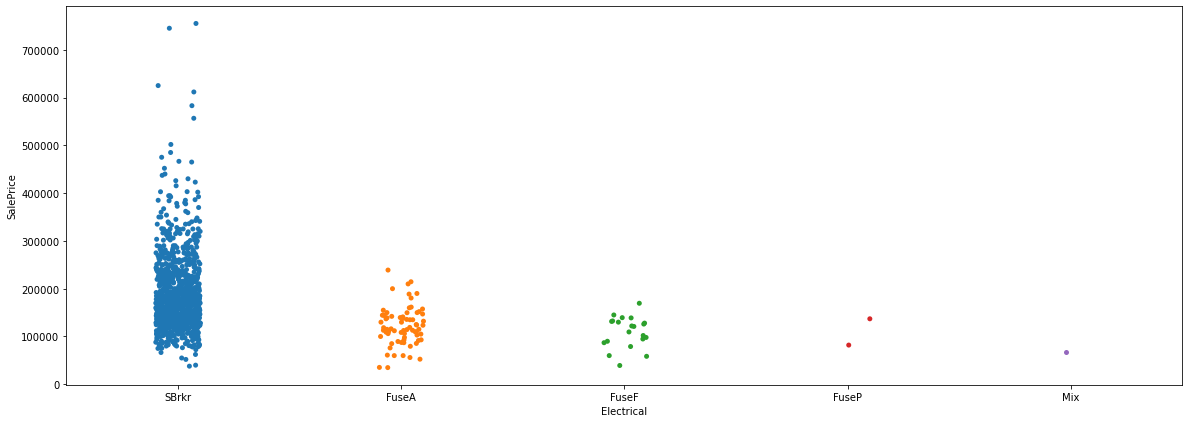

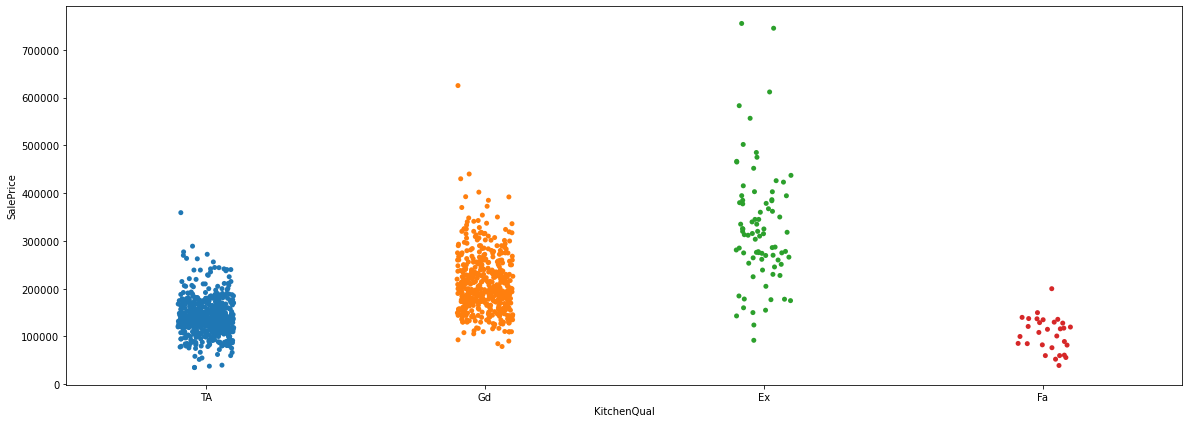

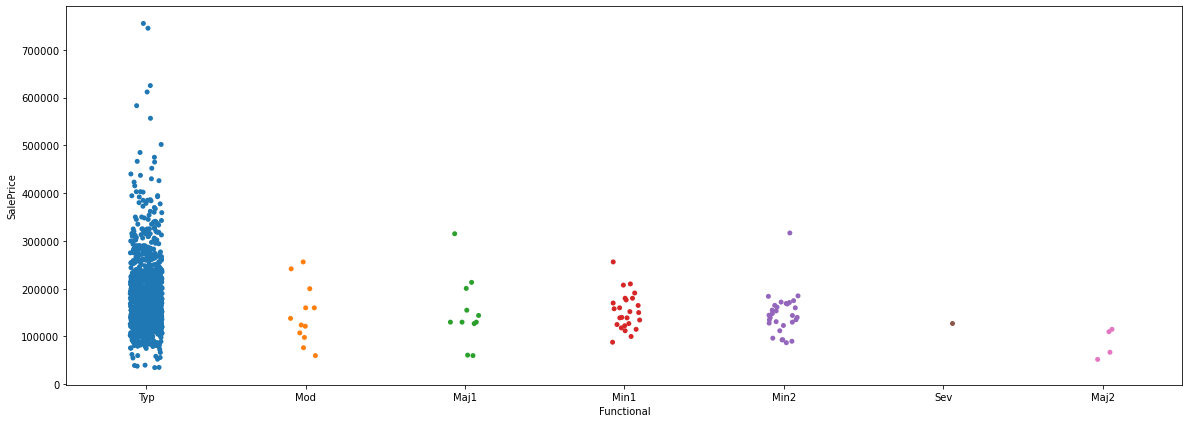

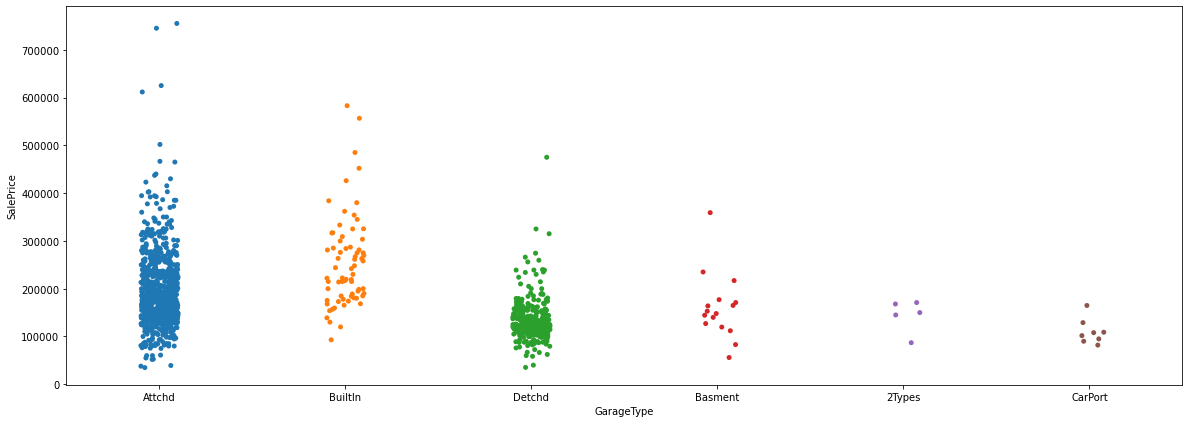

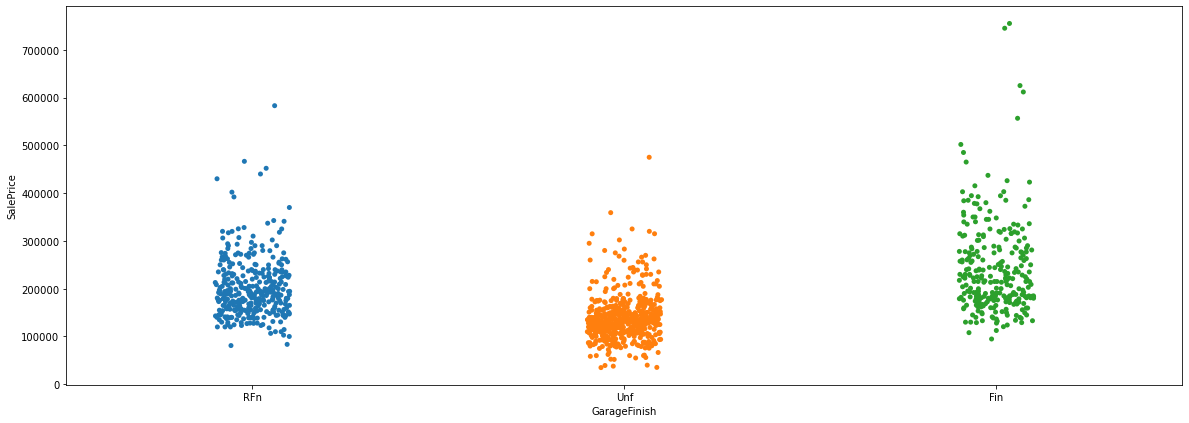

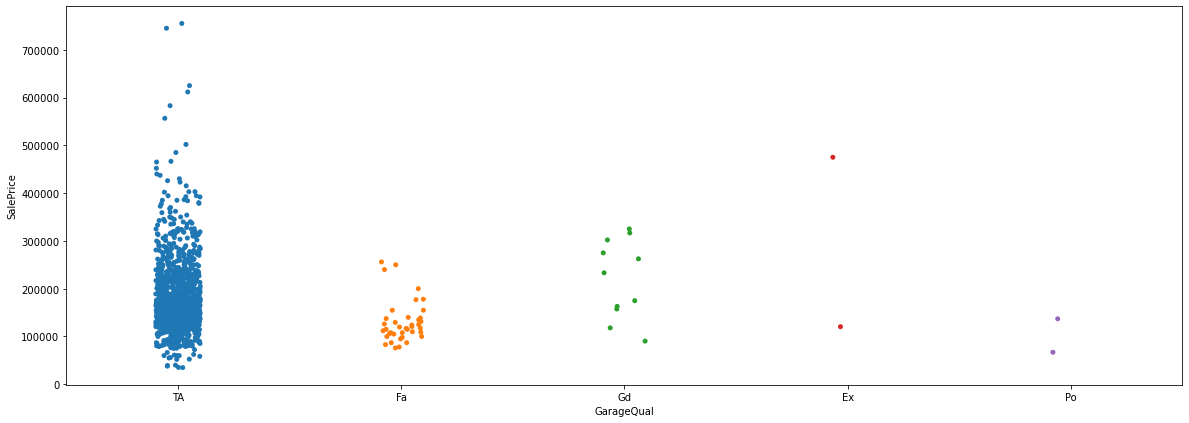

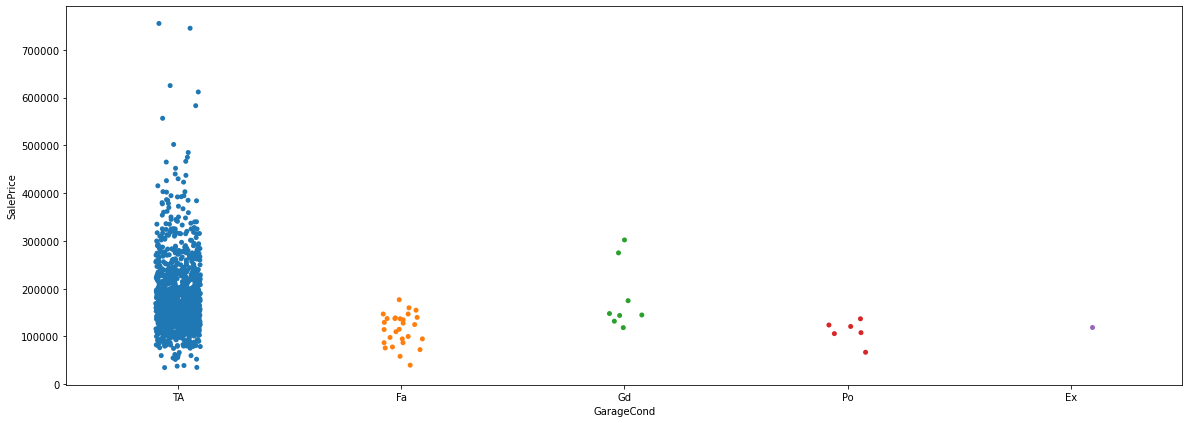

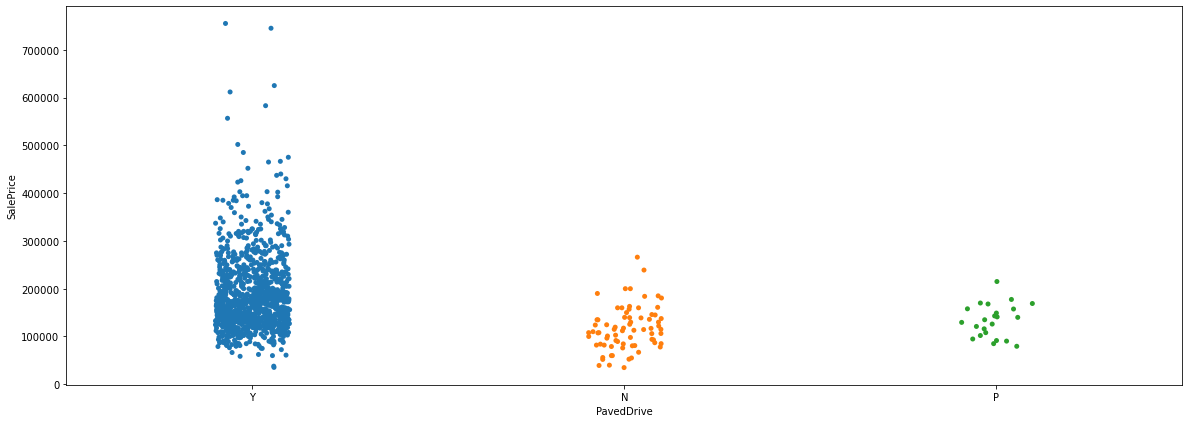

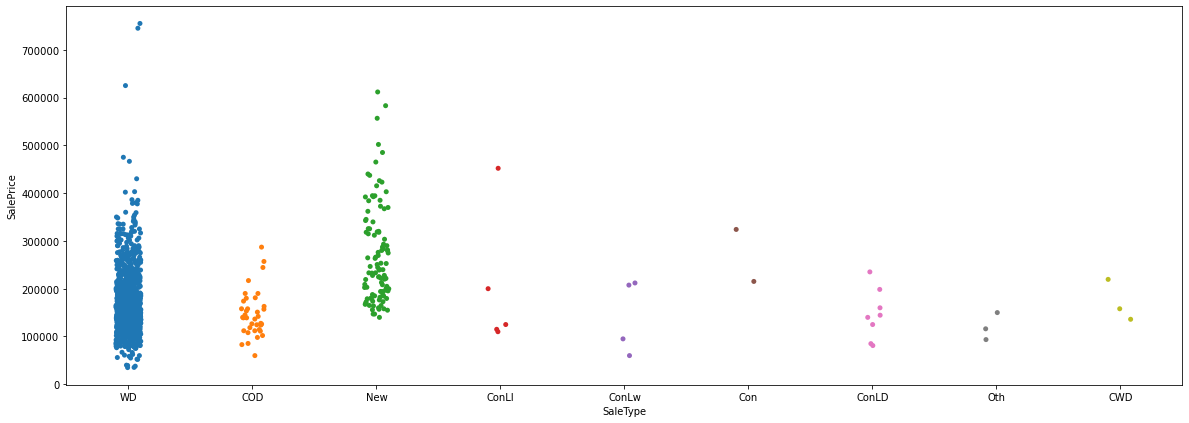

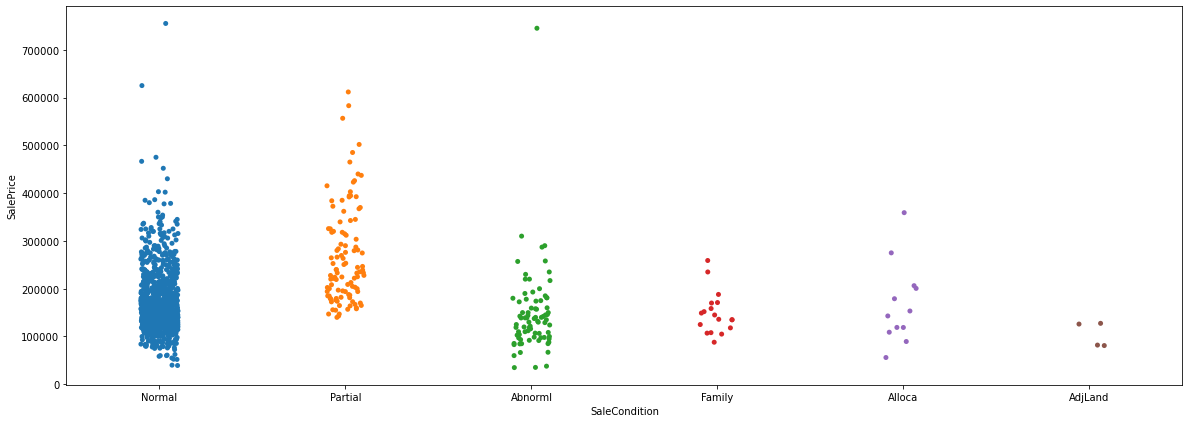

In [30]:
counter=1;


for column in categorical_columns:
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.stripplot(x=column, y="SalePrice", data=df)
        plt.show()

## ENCODING CATEGORIAL COLUMNS USING LABEL ENCODER


In [31]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical_columns:
    df[col] =  LE.fit_transform(df[col])

In [32]:
df

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0            120         3         70.0     4928       1         0   
1             20         3         95.0    15865       1         0   
2             60         3         92.0     9920       1         0   
3             20         3        105.0    11751       1         0   
4             20         3         70.0    16635       1         0   
...          ...       ...          ...      ...     ...       ...   
1163          20         3         70.0     9819       1         0   
1164          20         3         67.0     8777       1         3   
1165         160         3         24.0     2280       1         3   
1166          70         0         50.0     8500       1         3   
1167          60         3         70.0     7861       1         0   

      LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
0               3          0          4          0  ...              0   
1               3          0          4          1  ...              0   
2               3          0          1          0  ...              0   
3               3          0          4          0  ...              0   
4               3          0          2          0  ...              0   
...           ...        ...        ...        ...  ...            ...   
1163            3          0          4          0  ...              0   
1164            3          0          4          0  ...              0   
1165            3          0          2          0  ...              0   
1166            3          0          4          0  ...            172   
1167            3          0          4          0  ...              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0             0            0         0        0       2    2007         8   
1             0          224         0        0      10    2007         8   
2             0            0         0        0       6    2007         8   
3             0            0         0        0       1    2010         0   
4             0            0         0        0       6    2009         8   
...         ...          ...       ...      ...     ...     ...       ...   
1163          0            0         0        0       2    2010         8   
1164          0            0         0        0       5    2009         8   
1165          0            0         0        0       7    2009         8   
1166          0            0         0        0       7    2008         8   
1167          0            0         0        0       6    2006         8   

      SaleCondition  SalePrice  
0                 4     128000  
1                 4     268000  
2                 4     269790  
3                 4     190000  
4                 4     215000  
...             ...        ...  
1163              4     122000  
1164              4     108000  
1165              4     148500  
1166              4      40000  
1167              4     183200  

[1168 rows x 75 columns]

## OUTLIERS

In [33]:
for i in continous_columns:
    IQR = df[i].quantile(0.75)-df[i].quantile(0.25)
    Barmax =  df[i].quantile(0.75) + 1.5*IQR
    Barmin =  df[i].quantile(0.25) - 1.5*IQR
    df.loc[df[i]>Barmax,i] = Barmax
    df.loc[df[i]<Barmin,i] = Barmin

## REMOVING OUTLIERS

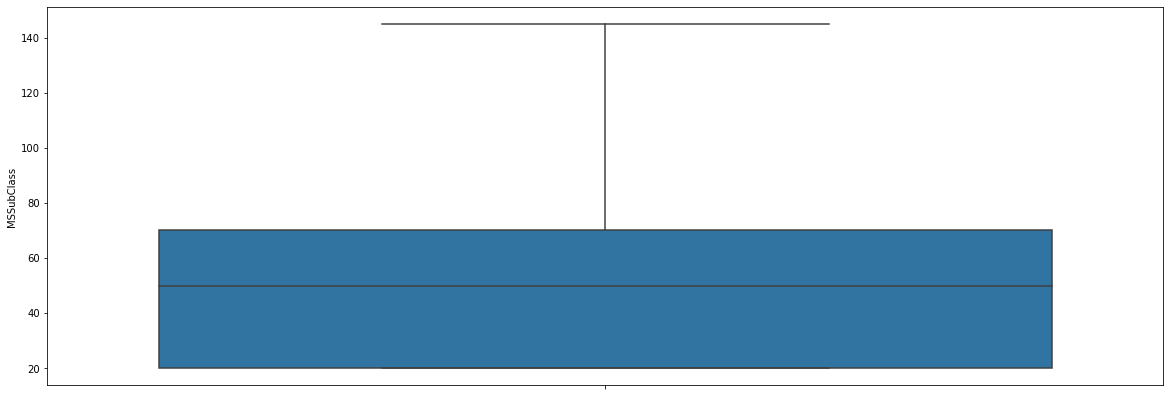

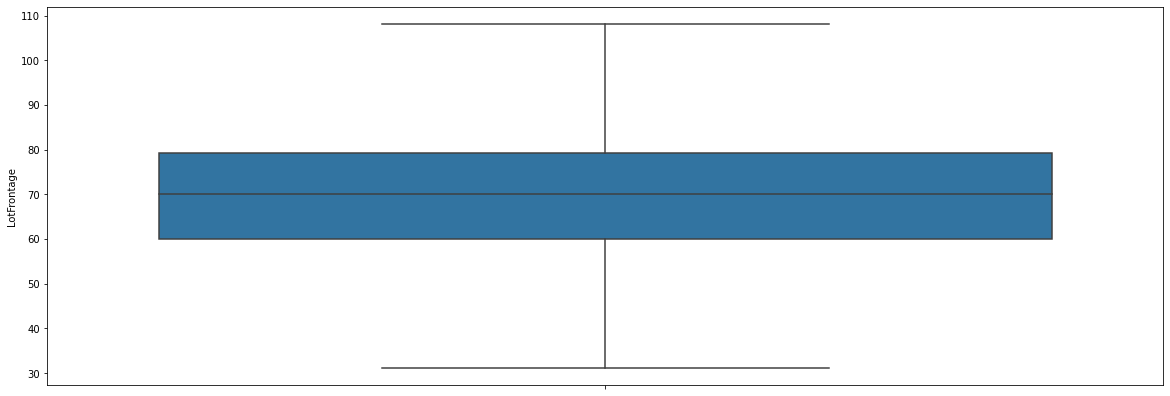

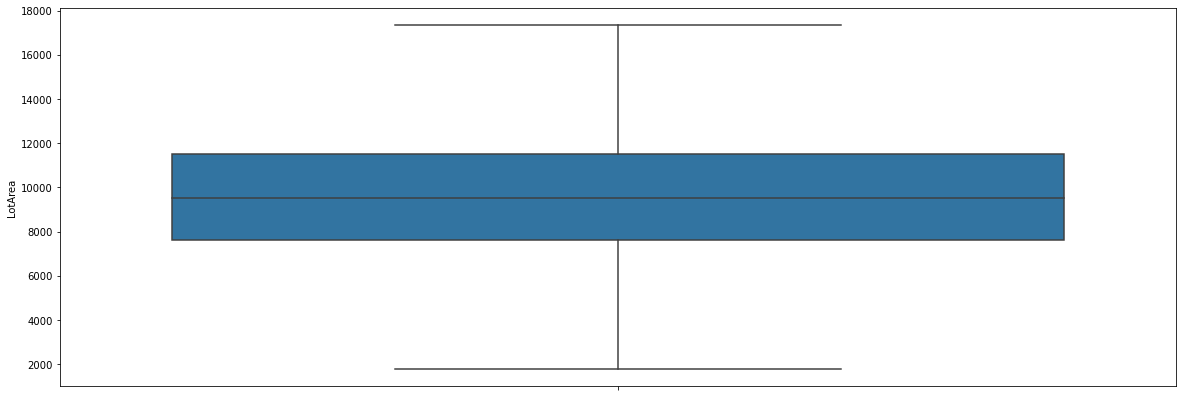

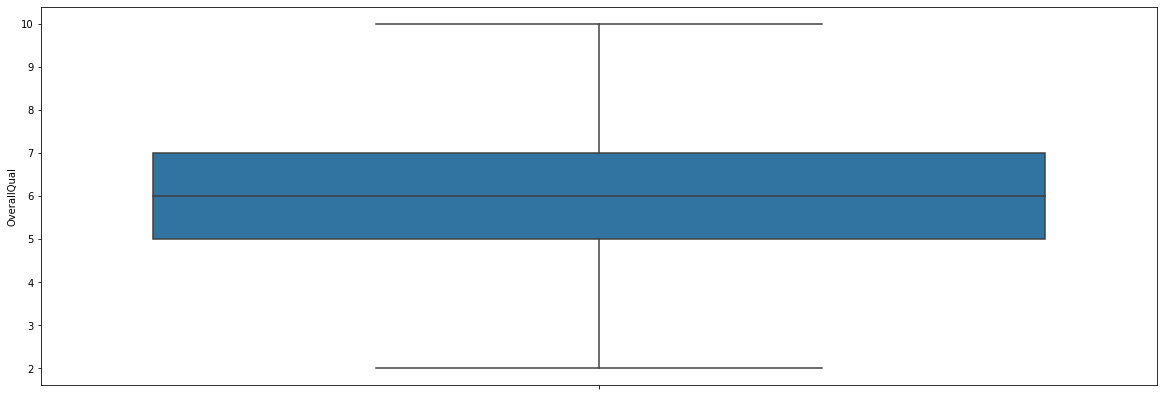

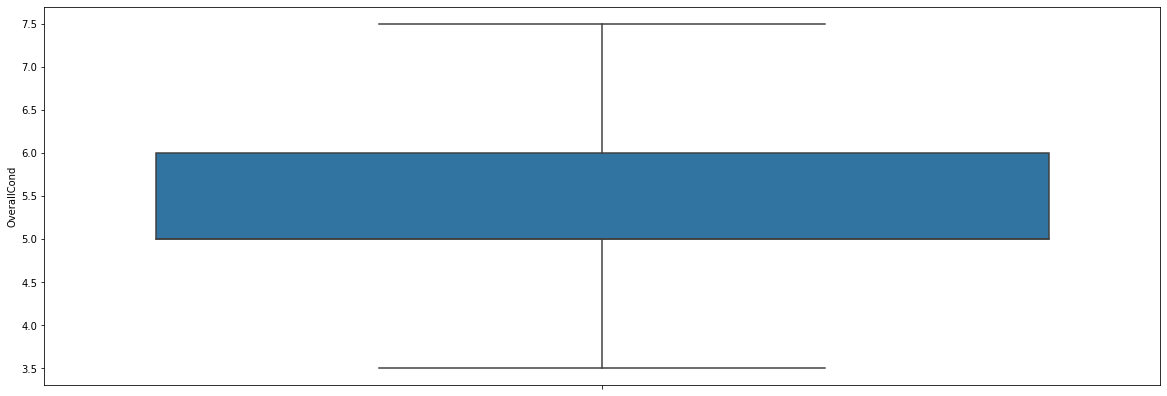

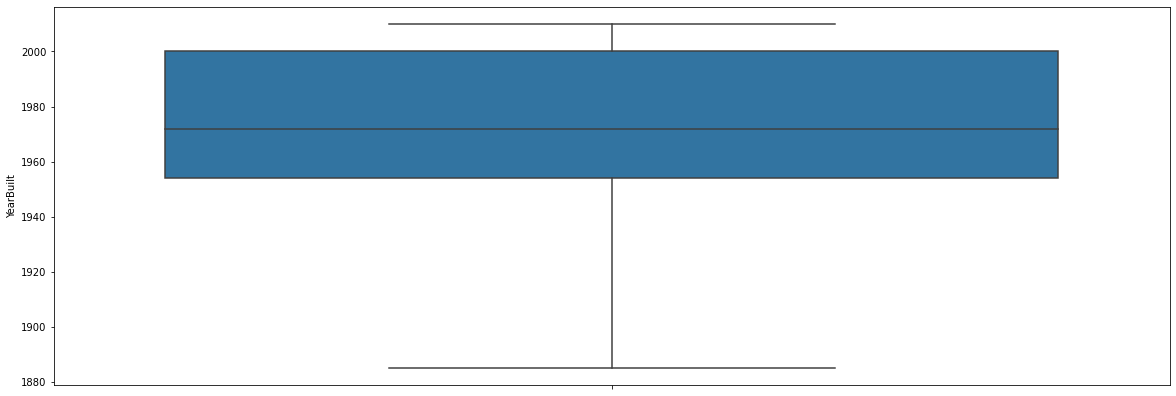

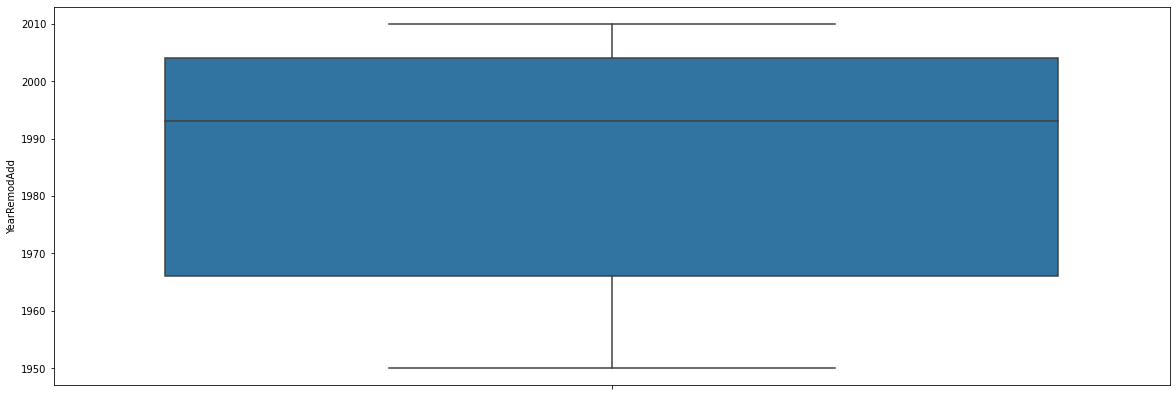

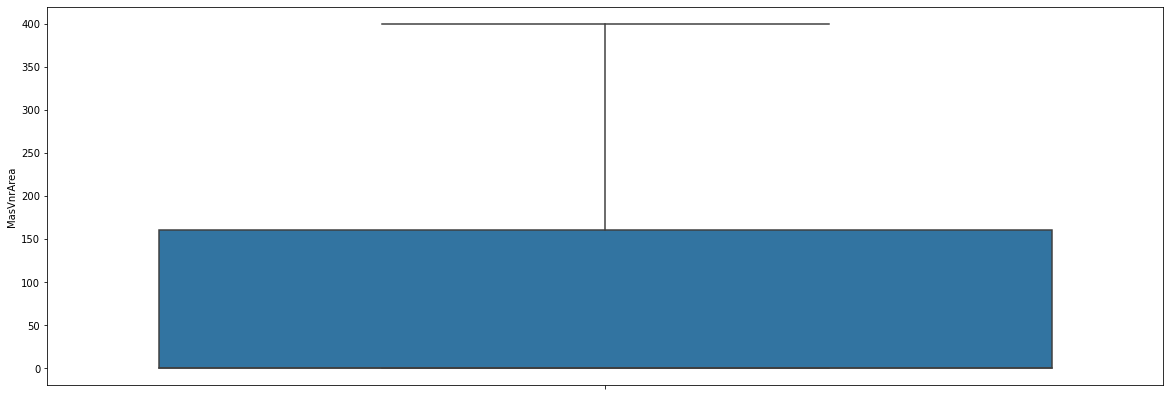

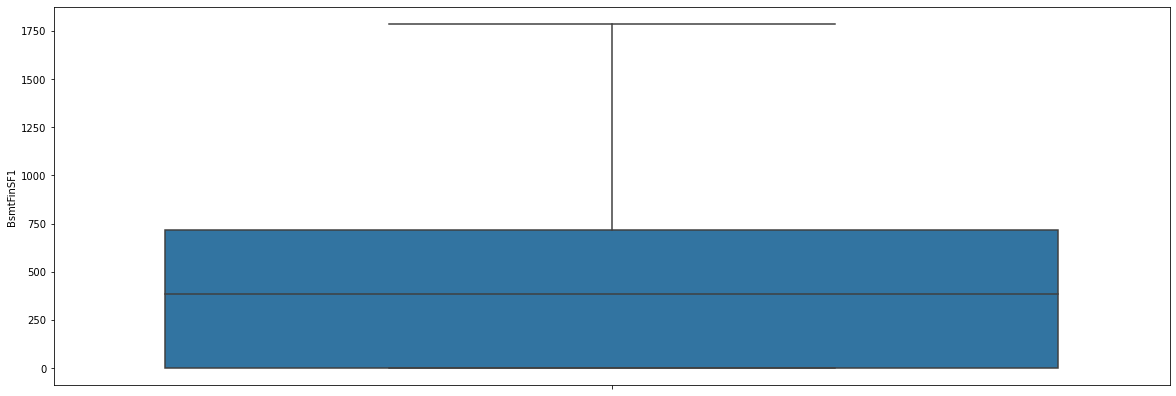

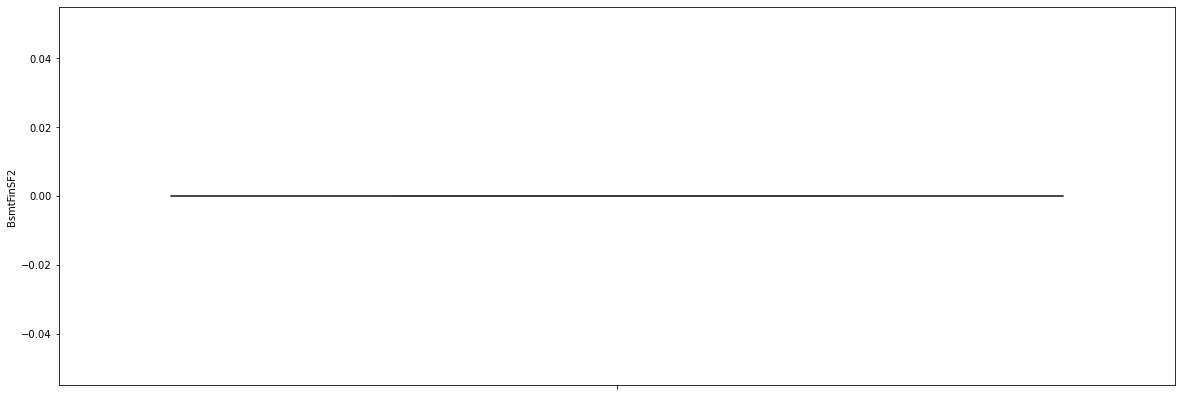

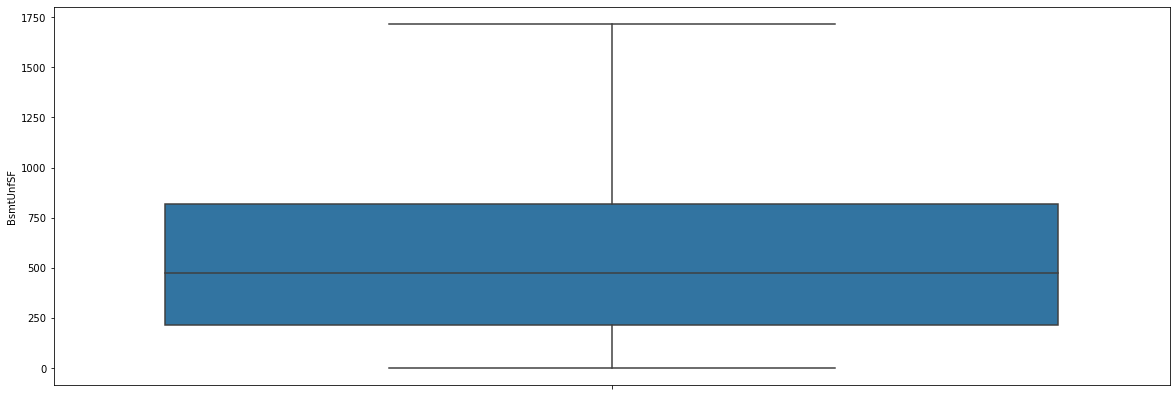

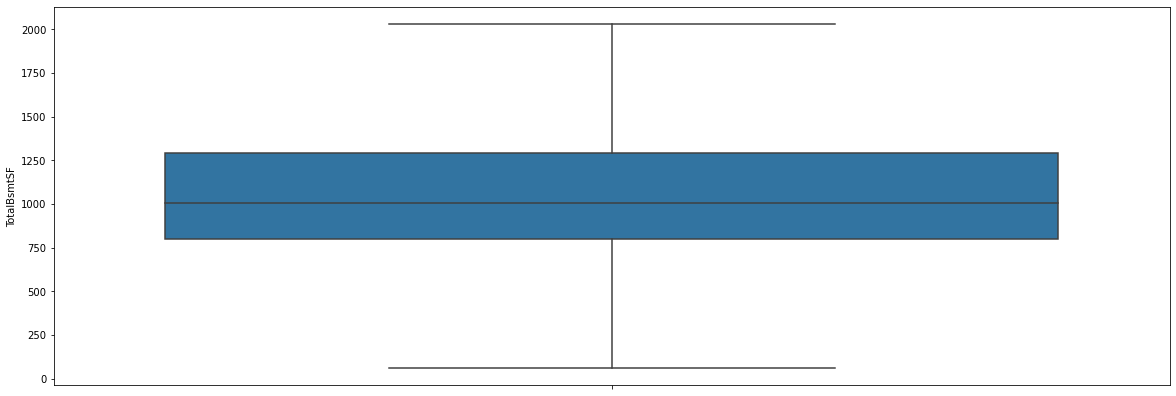

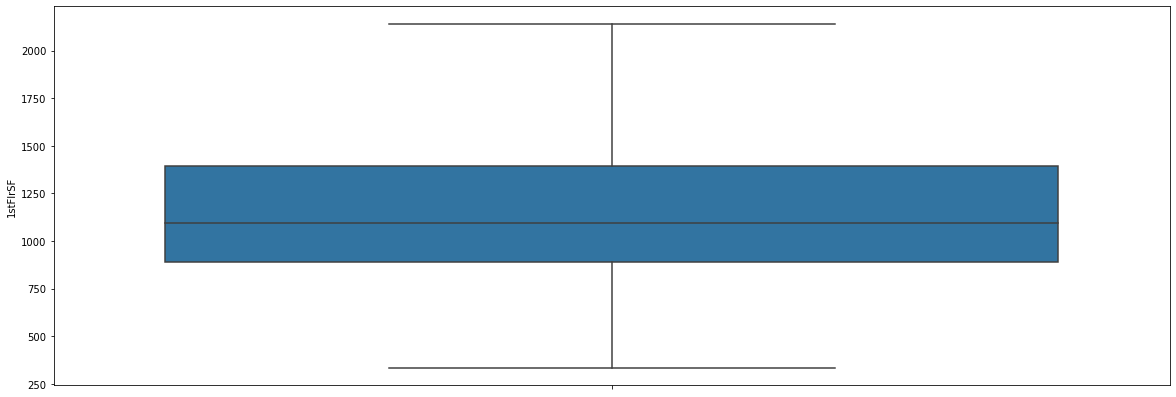

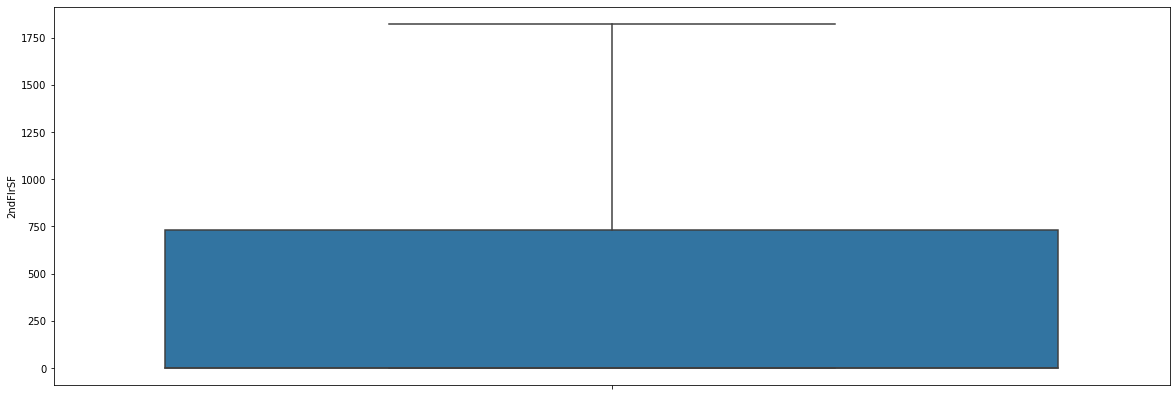

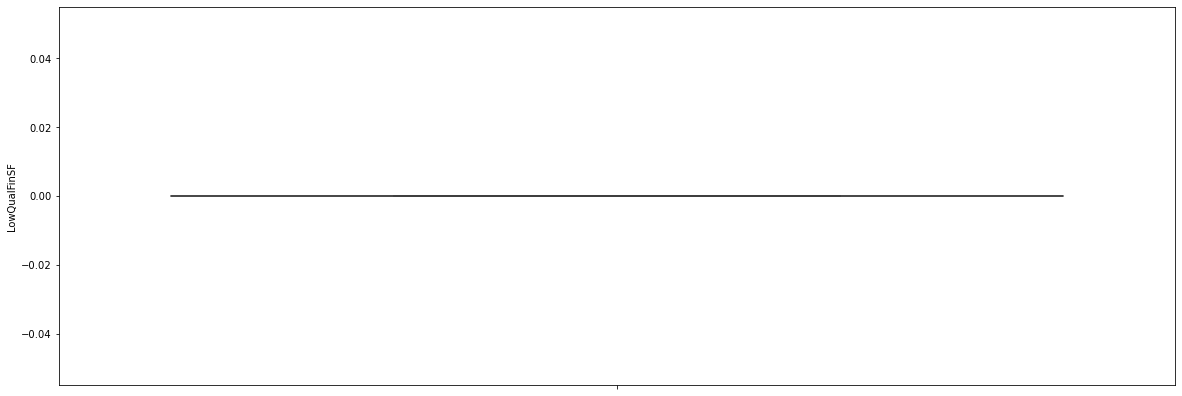

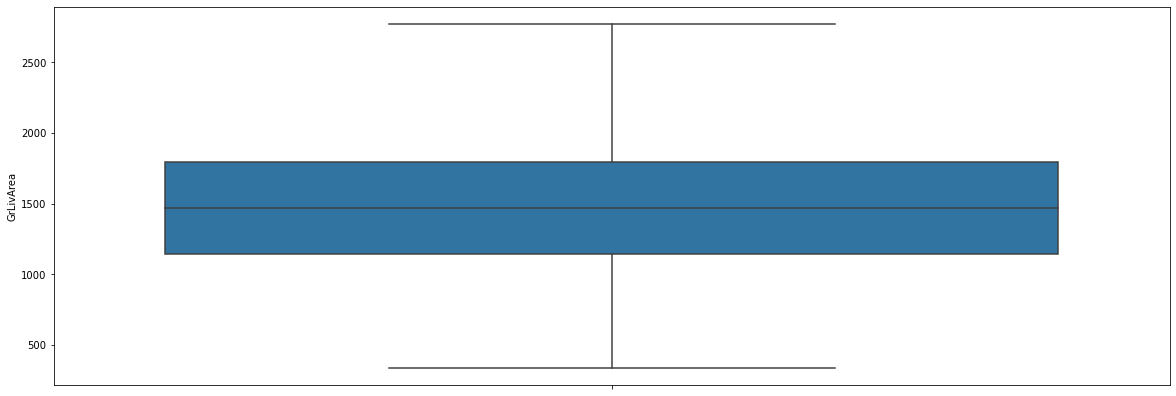

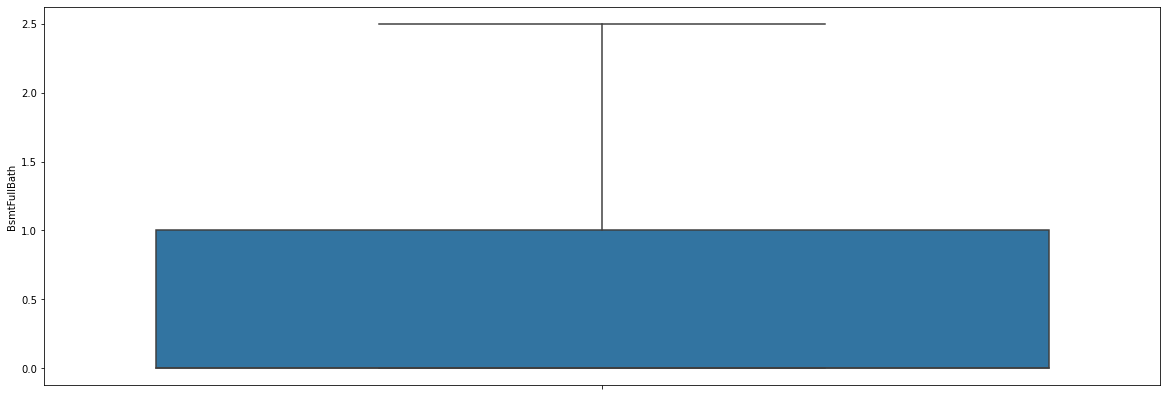

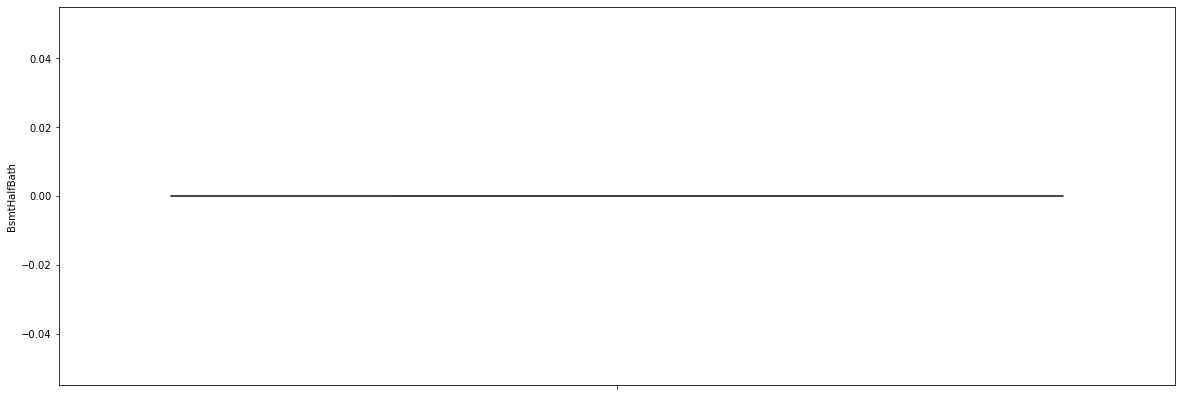

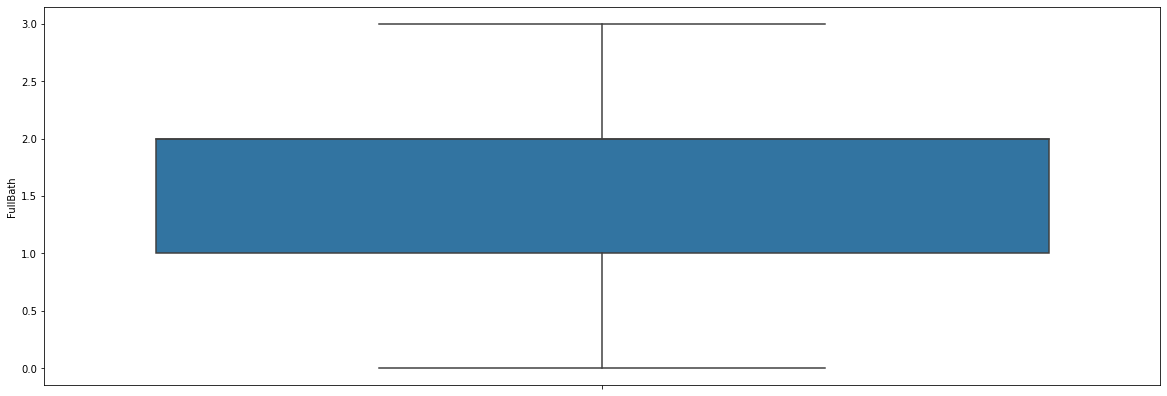

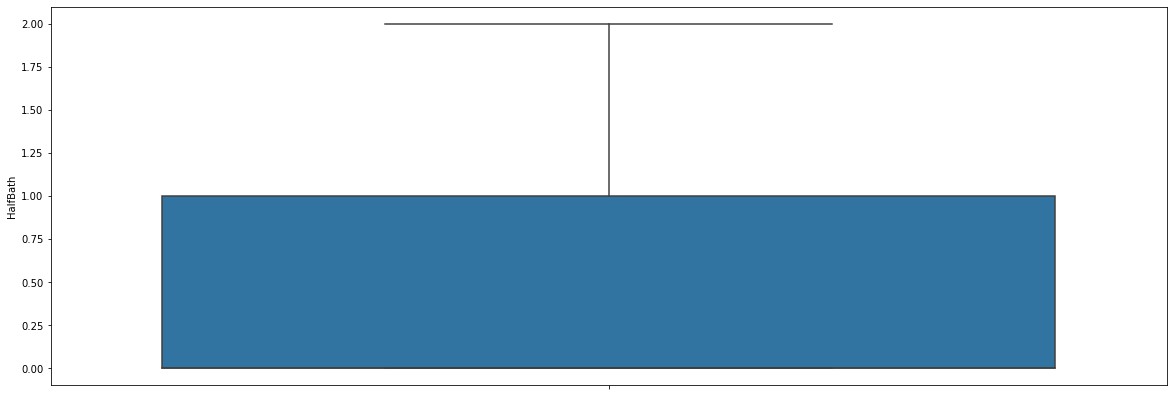

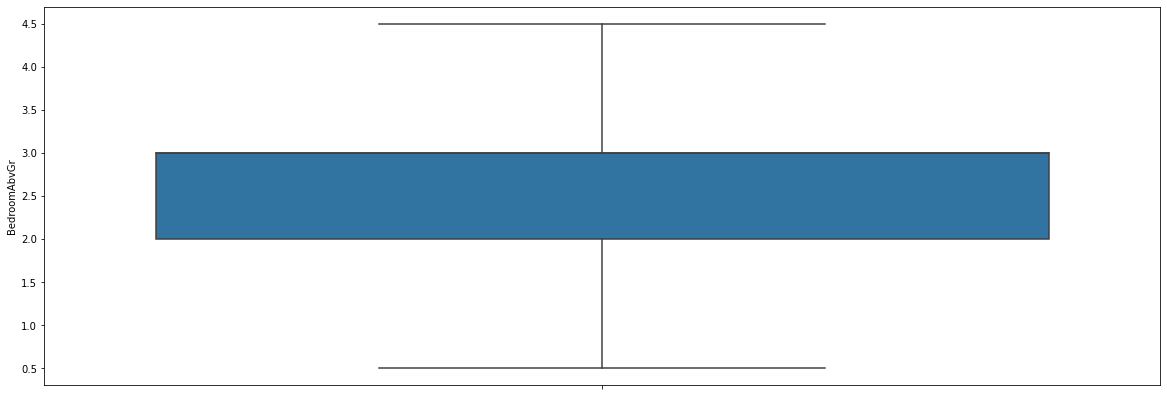

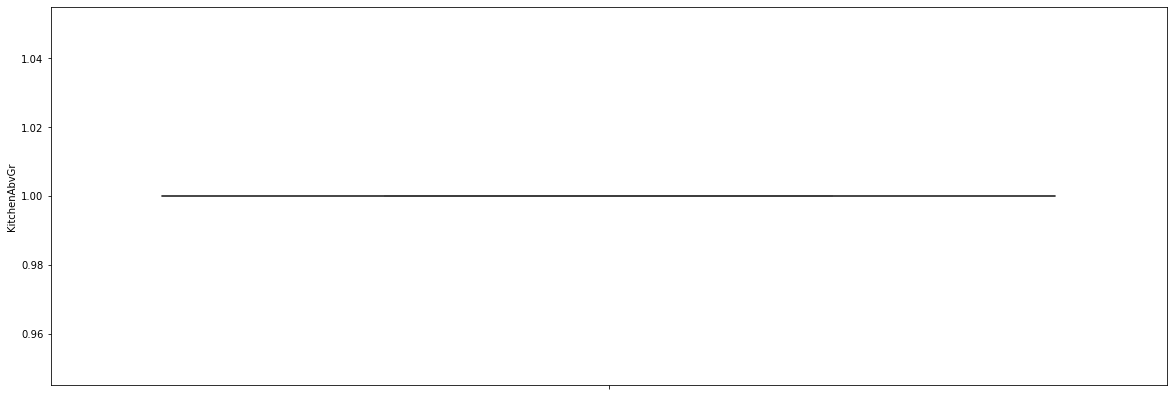

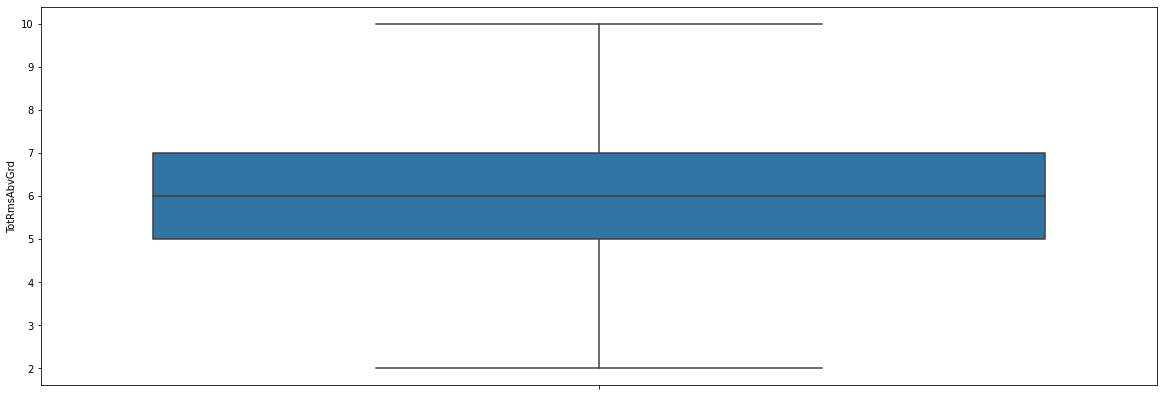

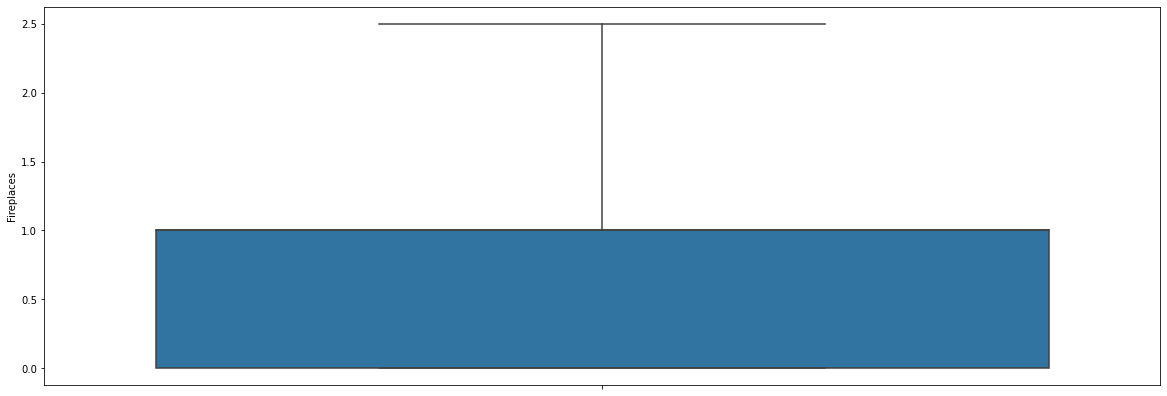

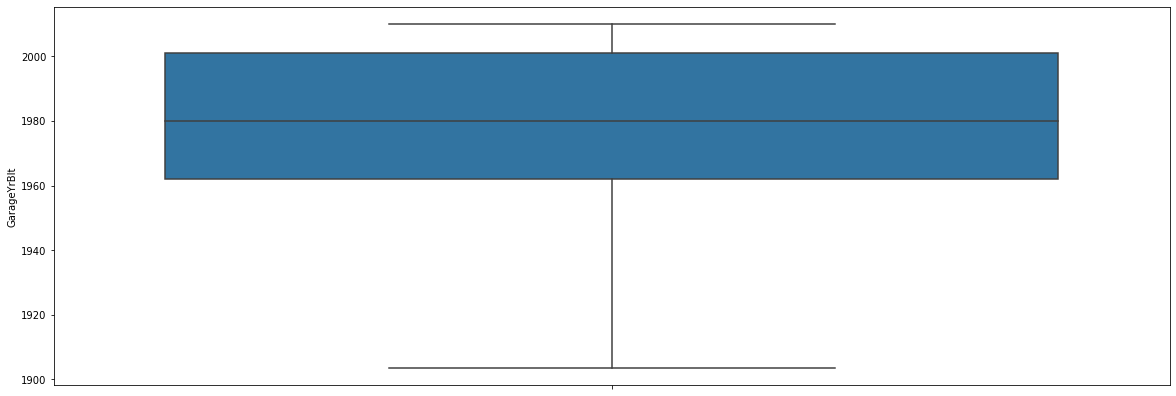

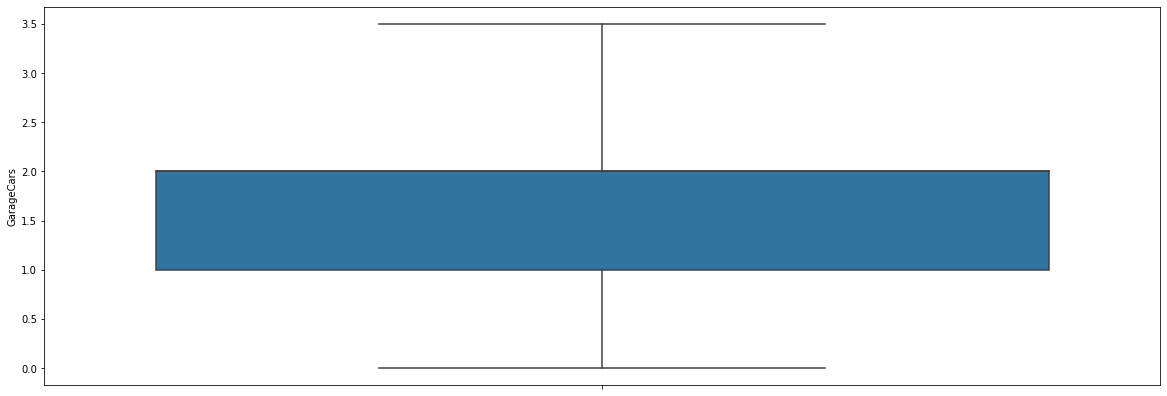

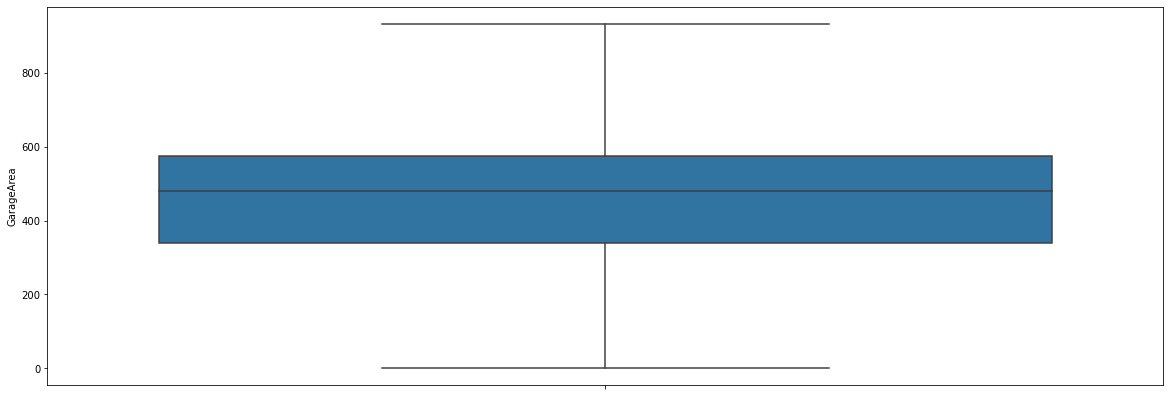

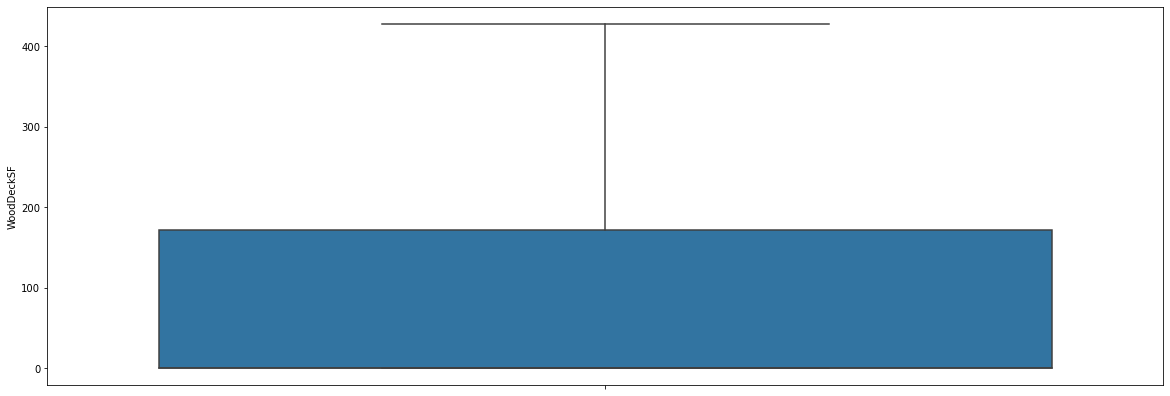

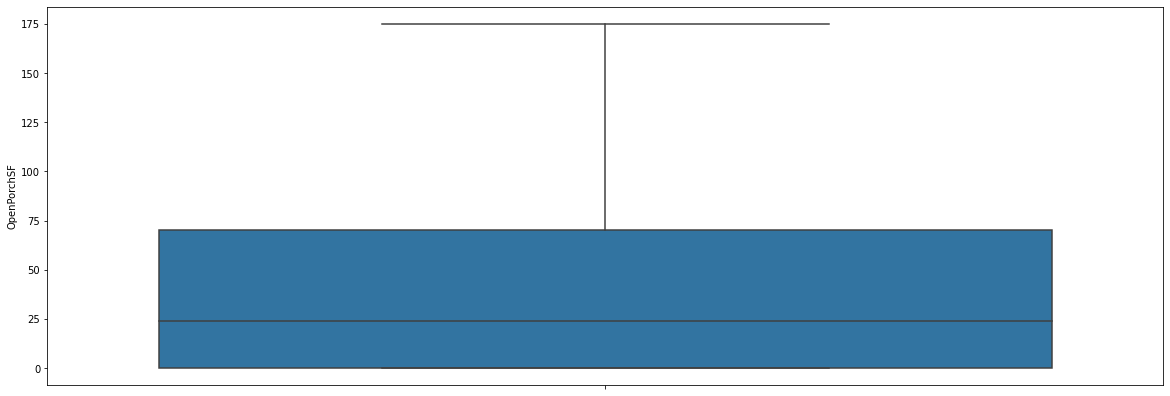

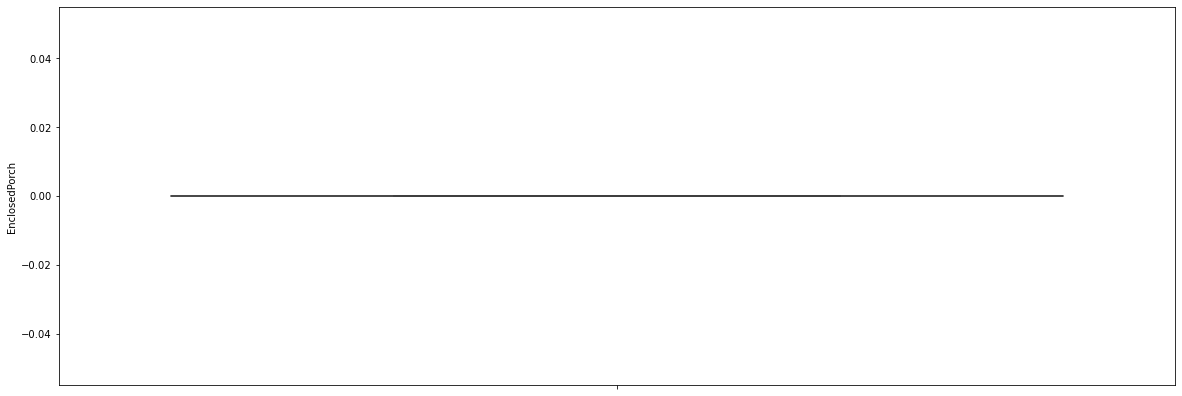

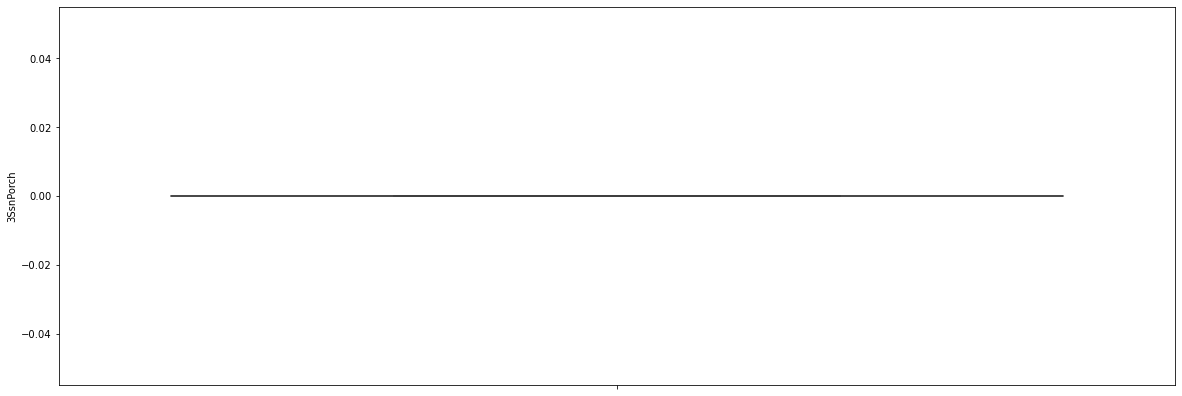

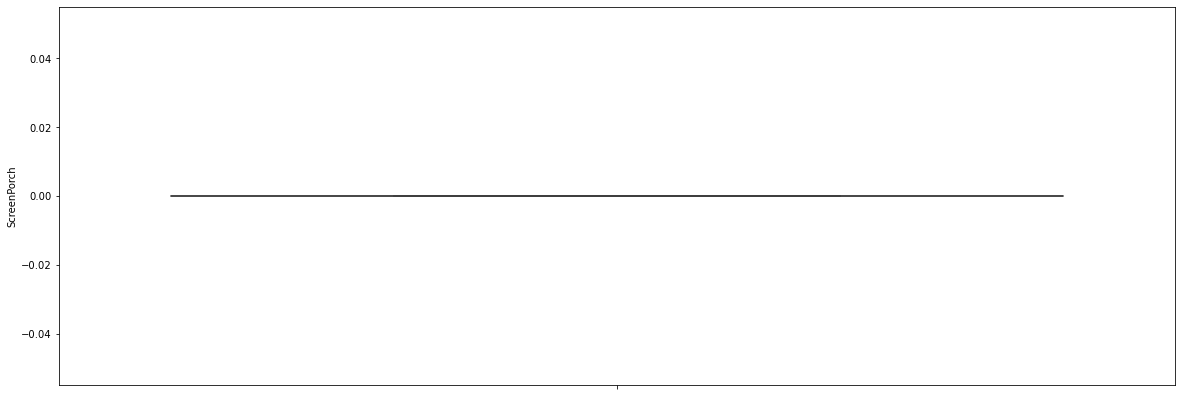

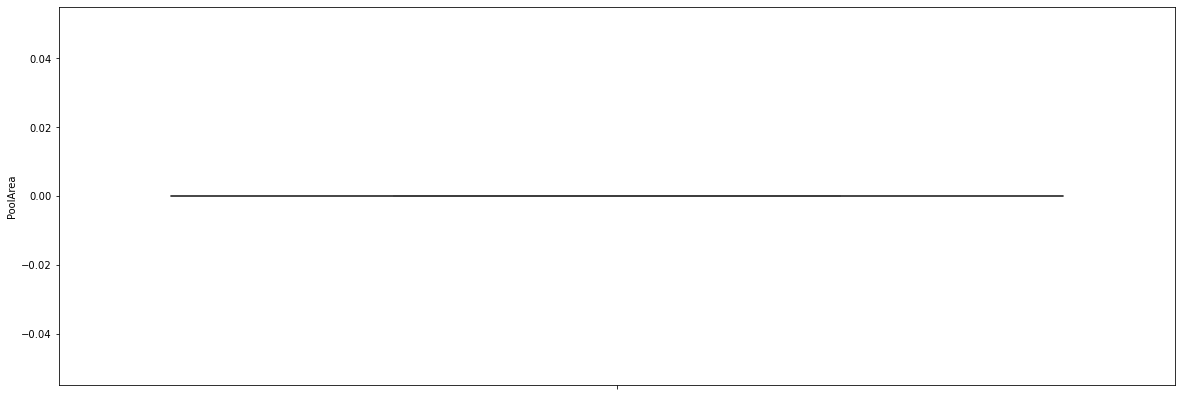

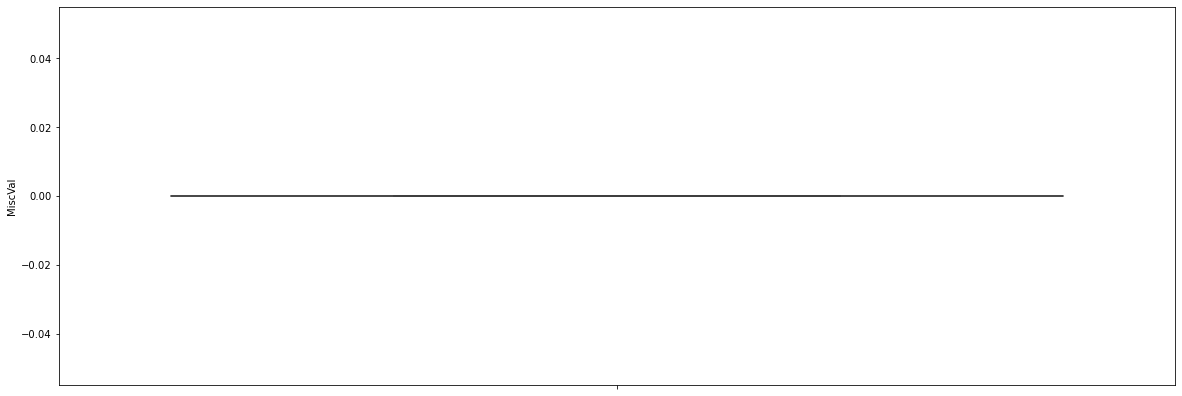

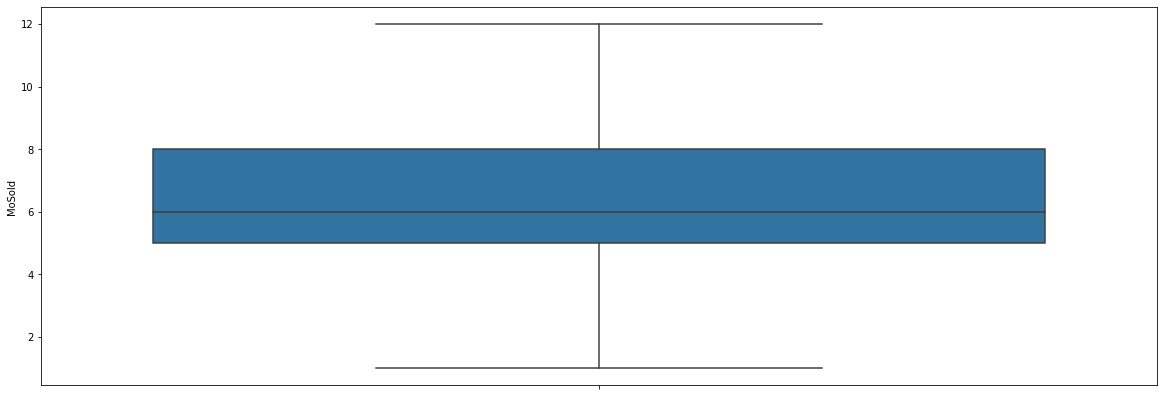

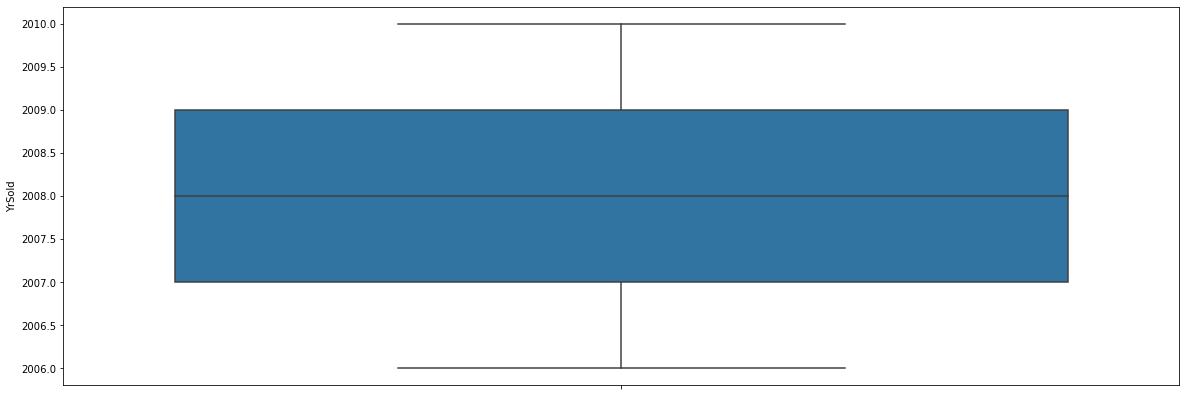

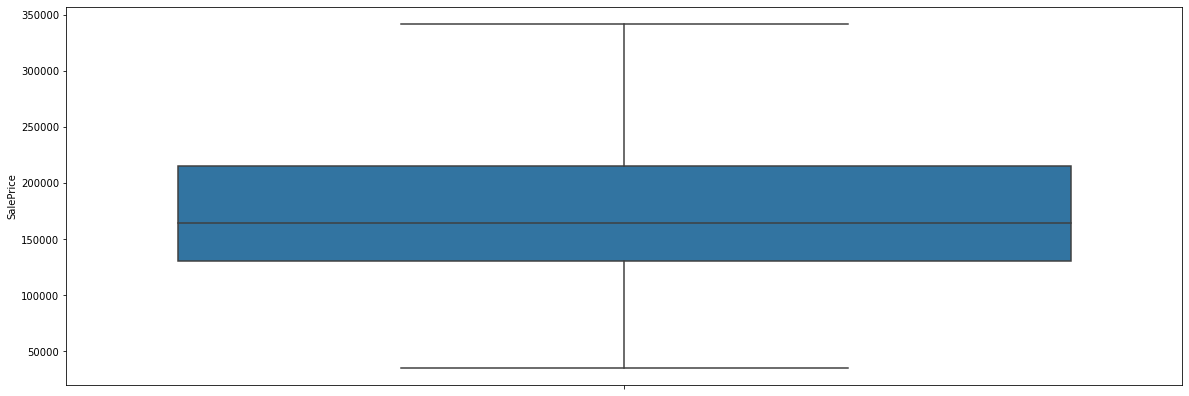

In [34]:
counter=1;
for i in range(0,len(continous_columns)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.boxplot(y=continous_columns[i],hue = continous_columns[i],data=df)
        #sns.boxplot(df[columns[i]])
        plt.show()

We can see that outliers are succesfully removed.

In [35]:
fin_df  = df.drop(categorical_columns,axis=1)
fin_df = fin_df.drop('SalePrice',axis=1)#dropping the object type variables/ target variable
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

## SCALING DATA

In [36]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

## REMOVING SKEWNESS

In [37]:
fin_df_new.skew()

MSSubClass       0.158112
LotFrontage      0.012692
LotArea          0.002066
OverallQual      0.000728
OverallCond      0.000936
YearBuilt       -0.167651
YearRemodAdd    -0.297070
MasVnrArea       0.633846
BsmtFinSF1       0.127013
BsmtFinSF2       0.000000
BsmtUnfSF        0.070161
TotalBsmtSF      0.011932
1stFlrSF         0.024386
2ndFlrSF         0.391445
LowQualFinSF     0.000000
GrLivArea        0.018678
BsmtFullBath     0.369112
BsmtHalfBath     0.000000
FullBath        -0.022417
HalfBath         0.498982
BedroomAbvGr    -0.002153
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000622
Fireplaces       0.121385
GarageYrBlt     -0.176423
GarageCars      -0.013013
GarageArea       0.006177
WoodDeckSF       0.345480
OpenPorchSF      0.329374
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold          -0.008564
YrSold          -0.041226
dtype: float64

In [38]:
fin_df_new= fin_df_new.join(df['SalePrice'])
for i in categorical_columns:
    fin_df_new=fin_df_new.join(df[i])

In [39]:
x = fin_df_new.drop('SalePrice',axis=1)
y = fin_df_new['SalePrice']

## Train test split


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    pred=regr.predict(x_test)
    acc = r2_score(y_test, pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best R2 Score is",maxAccu,"on Random State",maxRS)

Best R2 Score is 0.9122633965392055 on Random State 33


In [42]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=33)

## MODEL BUILDING


In [43]:
from sklearn import metrics
regr = LinearRegression()
regr.fit(x_train, y_train)
pred=regr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.9122633965392055
MAE: 14892.203763893922
MSE: 371688719.92576146
RMSE: 19279.230273166027


In [44]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
pred=rr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.9118234591149651
MAE: 14934.890606094263
MSE: 373552477.71456695
RMSE: 19327.505729259712


In [45]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred=model_lasso.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.9118234658159894
MAE: 14935.104867786695
MSE: 373552449.3262426
RMSE: 19327.504994857525


In [46]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 
pred=model_enet.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.911996677951742
MAE: 14928.021981156297
MSE: 372818650.7236756
RMSE: 19308.512390230262


In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('R2 score', r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.7878562140790019
MAE: 22270.165242165243
MSE: 898729254.5968661
RMSE: 29978.81342876776


In [48]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.8888293230151451
MAE: 15699.117863247864
MSE: 470965195.73208123
RMSE: 21701.732551390483


## CROSS VALIDATION


In [49]:
print("Cross validation score:",cross_val_score(regr,x,y,cv=5).mean())


Cross validation score: 0.8595058120124038


In [50]:
print("Cross validation score:",cross_val_score(rr,x,y,cv=5).mean())


Cross validation score: 0.8596712295672659


In [51]:
print("Cross validation score:",cross_val_score(model_lasso,x,y,cv=5).mean())


Cross validation score: 0.8595843302432259


In [52]:
print("Cross validation score:",cross_val_score(model_enet,x,y,cv=5).mean())


Cross validation score: 0.8639115938544558


In [53]:
print("Cross validation score:",cross_val_score(dtr,x,y,cv=5).mean())


Cross validation score: 0.730480108295874


In [54]:
print("Cross validation score:",cross_val_score(rdr,x,y,cv=5).mean())


Cross validation score: 0.8831763938156237


## Parameter Hypertuning


In [55]:
from sklearn.model_selection import GridSearchCV


In [56]:
parameter = {
 'max_depth': [100, 400, 800,1200],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [100,200, 400, 800]
}
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [57]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [100, 400, 800, 1200],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 400, 800]})

In [58]:
GCV.best_params_


{'max_depth': 400,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [59]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(max_depth= 400,
min_samples_leaf= 1,
min_samples_split= 2,
n_estimators= 100)
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.8896247496885005
MAE: 15755.80826210826
MSE: 467595437.72513515
RMSE: 21623.955182277252


# PREDICTION CONCLUSION


In [61]:
df1 = pd.read_csv('test.csv')



In [62]:
df1.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [65]:
df1['BsmtQual'].fillna(df1['BsmtQual'].mode()[0].strip(),inplace=True)
df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0].strip(),inplace=True)
df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0].strip(),inplace=True)
df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode()[0].strip(),inplace=True)
df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode()[0].strip(),inplace=True)
df1['GarageType'].fillna(df1['GarageType'].mode()[0].strip(),inplace=True)
df1['GarageFinish'].fillna(df1['GarageFinish'].mode()[0].strip(),inplace=True)
df1['GarageQual'].fillna(df1['GarageQual'].mode()[0].strip(),inplace=True)
df1['GarageCond'].fillna(df1['GarageCond'].mode()[0].strip(),inplace=True)
df1['LotFrontage'].fillna(df1['LotFrontage'].median(),inplace=True)
df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].median(),inplace=True)
df1['MasVnrArea'].fillna(df1['MasVnrArea'].median(),inplace=True)


In [66]:
df1.drop(['MiscFeature','PoolQC','Fence','FireplaceQu','Alley','Id'],inplace=True,axis=1)


In [67]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical_columns:
    df1[col] =  LE.fit_transform(df1[col])

In [68]:
for i in continous_columns[:len(continous_columns)-1]:
    IQR = df1[i].quantile(0.75)-df1[i].quantile(0.25)
    Barmax =  df1[i].quantile(0.75) + 1.5*IQR
    Barmin =  df1[i].quantile(0.25) - 1.5*IQR
    df1.loc[df1[i]>Barmax,i] = Barmax
    df1.loc[df1[i]<Barmin,i] = Barmin

In [69]:
fin_df  = df1.drop(categorical_columns,axis=1)
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

In [70]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

In [71]:
for i in categorical_columns:
    fin_df_new=fin_df_new.join(df[i])

In [72]:
pred=rdr.predict(fin_df_new)

In [73]:
predictions = pd.DataFrame({'SalePrice': pred})

In [74]:
predictions

SalePrice
0    316201.180
1    226103.155
2    269028.315
3    166572.050
4    193783.670
5     90120.590
6    130640.930
7    289437.015
8    240159.820
9    158282.650
10    85591.080
11   163416.140
12   123281.430
13   162006.350
14   297324.805
15   132969.420
16   126248.000
17   133926.000
18   171543.550
19   179958.580
20   167245.100
21   141712.310
22   154290.190
23    92258.870
24    99845.330
25   134569.600
26   160758.200
27   159258.000
28   158387.900
29   118130.570
30   168243.230
31   182086.915
32   243736.915
33   158129.290
34   101115.040
35   171627.420
36   184990.000
37   123221.540
38   171457.000
39   149072.460
40   108759.510
41   318548.235
42   202765.850
43   165618.010
44   130819.580
45   143901.420
46   131170.360
47   105708.880
48   204290.845
49   284096.790
50   165956.590
51   169966.500
52   102819.780
53   101407.340
54   270360.685
55   120058.100
56   161636.200
57   185817.770
58   118377.620
59   252845.335
60    99353.320
61   178666.200
62   144473.540
63   143917.430
64   187077.540
65   110002.590
66   150771.970
67   207799.810
68   134207.090
69   156403.220
70   300149.730
71   157147.400
72   155604.810
73   173323.980
74   147912.700
75   232547.630
76   319280.430
77   185976.285
78   300295.810
79   152899.640
80   204113.975
81   152806.580
82   163172.390
83   164670.370
84   182838.350
85   250274.860
86   102965.020
87   297934.665
88   155513.750
89   165213.800
90   241344.885
91   127116.080
92   134651.680
93   122905.040
94   185649.890
95   179094.510
96   237670.380
97   169705.800
98   311908.325
99   118148.310
100  290211.355
101  103564.790
102  120688.280
103  147362.940
104  213805.050
105  149144.040
106  271816.705
107  135533.950
108  187029.910
109  214223.250
110  175248.500
111  177104.320
112  255248.405
113  209139.380
114  139273.480
115  114016.650
116  137521.710
117  199404.500
118  137419.660
119  113089.930
120  109697.340
121  182712.230
122  266693.820
123  139662.900
124  148673.000
125  202674.200
126  121094.170
127  167761.000
128   98930.830
129  130578.600
130  144410.320
131  218883.100
132  138409.360
133  156241.280
134  182148.920
135  294638.725
136  194698.220
137  125585.440
138  296321.290
139  112540.960
140  156902.980
141  330076.975
142  104834.870
143  296928.030
144  169517.590
145  231104.075
146  190064.275
147  142224.280
148  108368.910
149  189687.050
150  152322.460
151  143139.500
152  179663.310
153  115536.350
154   97910.000
155  168993.050
156  173796.240
157  176268.300
158  126064.700
159  167848.460
160  196440.230
161  141472.870
162  194203.640
163  119553.510
164  124478.090
165  217918.650
166  191289.460
167  192439.310
168  133269.500
169  232243.215
170  151821.690
171  119837.280
172  130658.900
173  242584.020
174  137380.370
175  327733.155
176  136146.710
177   97820.710
178  167217.940
179  167780.850
180  204911.150
181  150961.950
182  260670.235
183  168280.850
184  281537.380
185  321061.610
186  226369.320
187  100205.510
188  169250.220
189  155789.450
190  132225.840
191  224229.185
192  168076.000
193   94420.580
194  158769.190
195   96015.960
196  167293.790
197  193403.570
198  127999.700
199  190872.980
200  140580.100
201  106734.900
202  252590.330
203  276616.485
204  134955.230
205  121287.070
206  248936.700
207  163278.590
208  155064.510
209  175515.700
210   93889.000
211  181335.400
212  153997.170
213  191352.560
214  113399.190
215  247458.245
216  144668.600
217  148583.880
218  131124.190
219  166242.290
220  209636.330
221  210768.780
222  255318.535
223  137759.080
224  182262.100
225  289163.445
226  211208.070
227  110139.590
228  291566.955
229  160537.730
230  119226.360
231  140318.440
232   91952.860
233  142944.320
234  109019.710
235  165979.500
236  176906.820
237  161095.710
238  260091.825
239  152805.440
240  220149.920
241  145502.700
242  320959.470
243  107503.010
244  135260.800
245  215772.630
246  190287.260
247  267460.200
248  153476.930
249  1

In [75]:
predictions.to_excel("Price prediction.xlsx")

In [76]:
import joblib
joblib.dump(rdr,"Housing Project.pkl")

['Housing Project.pkl']

.....................................................THANK U......................................................